# Final Phase Plane Figures

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Phase-Plane-Figures" data-toc-modified-id="Final-Phase-Plane-Figures-1">Final Phase Plane Figures</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1">Setup</a></span></li><li><span><a href="#Phase-planes-figure" data-toc-modified-id="Phase-planes-figure-1.2">Phase planes figure</a></span></li><li><span><a href="#Empirical-vs.-Simulated-power-spectra-figure" data-toc-modified-id="Empirical-vs.-Simulated-power-spectra-figure-1.3">Empirical vs. Simulated power spectra figure</a></span></li><li><span><a href="#Graveyard" data-toc-modified-id="Graveyard-1.4">Graveyard</a></span></li></ul></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Phase-Plane-Figures" data-toc-modified-id="Final-Phase-Plane-Figures-1">Final Phase Plane Figures</a></span></li><li><span><a href="#Phase-Planes-&amp;-Bifurcation-Diagrams" data-toc-modified-id="Phase-Planes-&amp;-Bifurcation-Diagrams-2">Phase Planes &amp; Bifurcation Diagrams</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-2.1">Setup</a></span></li><li><span><a href="#FINAL-SIMS" data-toc-modified-id="FINAL-SIMS-2.2">FINAL SIMS</a></span></li><li><span><a href="#Graveyard" data-toc-modified-id="Graveyard-2.3">Graveyard</a></span></li></ul></li></ul></div>

## Setup

In [4]:
#@%matplotlib notebook

import pandas as pd


%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from IPython.display import clear_output, Image, HTML

from moviepy.editor import ImageSequenceClip
from matplotlib import gridspec


from copy import deepcopy

%run ~/set_localenv_vars.py

import sys

sys.path.append('../../')
from bsac.GL_model import run_net_sim,decimate_surface,plot_surface_mpl,make_brain_movie
from scipy.spatial import cKDTree
import glob
from IPython.display import HTML

sys.path.append('/home/jgriffiths/Code/libraries_of_others/github/tvb-library')
sys.path.append('/home/jgriffiths/Code/libraries_of_others/github/tvb-data')
from tvb.simulator.lab import *

import numpy as np

import matplotlib as mpl
from matplotlib import cm
from matplotlib import pyplot as plt

from ipywidgets import *



# root path to tvb-library, tvb-data, etc. libraries. 
tvb_folder = le['code_dir'] + '/libraries_of_others/github'

tvb_dat_dir = tvb_folder + '/tvb-data'

ctx_file = tvb_dat_dir + '/tvb_data/surfaceData/cortex_16384.zip'
rm_file = tvb_dat_dir  + '/tvb_data/regionMapping/regionMapping_16k_76.txt' # bz2'
conn_file = tvb_dat_dir + '/tvb_data/connectivity/connectivity_76.zip'

# These are some visualization things necessary for the brain surface plots
ctx = cortex.Cortex.from_file(source_file = ctx_file,
                              region_mapping_file =rm_file)

vtx,tri,rm = ctx.vertices,ctx.triangles,ctx.region_mapping
conn = connectivity.Connectivity.from_file(conn_file); conn.configure()
isrh_reg = conn.is_right_hemisphere(range(conn.number_of_regions))
isrh_vtx = np.array([isrh_reg[r] for r in rm])
dat = conn.tract_lengths[:,0] # 'dat' is one column of the region-based tract lengths 
                              # connectivity matrix. The corresponding region is 
                              # right auditory cortex ('rA1')

f = tvb_folder + '/tvb-data/tvb_data/surfaceData/cortex_80k.zip'
ctx_96 = cortex.Cortex.from_file(f)                                 
vtx_96 = ctx_96.vertices
tri_96 = ctx_96.triangles

f = tvb_folder + '/tvb-data/tvb_data/regionMapping/for_toronto_parcelation_96/connectivity96_to_srf80k_map.txt'
rm_96 = np.loadtxt(f).astype(int)


conn_96 = connectivity.Connectivity.from_file('connectivity_96.zip')

vtx_96_10k,tri_96_10k = decimate_surface(vtx_96,tri_96,10000)
vtx_subset_idxs_10k = cKDTree(vtx_96).query(vtx_96_10k)[1]
rm_96_10k = rm_96[vtx_subset_idxs_10k]
#evecs_rm_96_10k = evecs[rm_96_10k,:].astype(float)

vtx_96_5k,tri_96_5k = decimate_surface(vtx_96,tri_96,5000)
vtx_subset_idxs_5k = cKDTree(vtx_96).query(vtx_96_5k)[1]
rm_96_5k = rm_96[vtx_subset_idxs_5k]
#evecs_rm_96_5k = evecs[rm_96_5k,:].astype(float)

vtx_96_2k,tri_96_2k = decimate_surface(vtx_96,tri_96,2000)
vtx_subset_idxs_2k = cKDTree(vtx_96).query(vtx_96_2k)[1]
rm_96_2k = rm_96[vtx_subset_idxs_2k]
#evecs_rm_96_2k = evecs[rm_96_2k,:].astype(float)



conn96_cortical = connectivity.Connectivity.from_file('connectivity_96.zip')
conn96_cortical.configure()
idx_ctx = np.nonzero(conn96_cortical.cortical == False)[0]
for i_it in idx_ctx:
    conn96_cortical.weights[i_it,:] = 0
    conn96_cortical.weights[:,i_it] = 0
conn96_cortical.speed = 4.
conn96_cortical.configure()


# 1-node weights & delays
weights_1N = np.array([[1.]])
delays_1N = np.array([[1.]])

WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.


In [5]:
ssX_params = dict(I_o=0.,
             wee = 1.4,wei = 1.4,
                  wie = -2.,wii = -0.5,wertn = 0.6,weth = .6,
            wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,D_e = .0001,D_i= .0001,
            D_th = 0.0001,D_rtn = 0.0001,T = 1024,P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,g = -0.9,a_e = 0.3,
            a_i = 0.5,a_th = 0.2,a_rtn = 0.2,i_e = -0.35,i_i = -0.3,i_th = 0.5,
            i_rtn = -0.8,tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.5,
             weights=weights_1N,delays=delays_1N,K=1,
             return_ts=True,compute_connectivity=True,
             stim_type='sinewave',stim_pops=['e'])

In [6]:
def run_and_make_figs(params):

    ssX_ts = {}
    ssX_pps = {}
    ssX_wps = {}
    res_ssX = {}

    I_os_1 = [0.0,0.5,1.0,1.5,2.0]



    for I_o in I_os_1:

        theseparams = deepcopy(params)
        
        theseparams['I_o'] = I_o
        
        res = run_net_sim(**theseparams)

        df = res[0].copy()
        df.columns= df.columns.swaplevel(0)
        df = df[0]
        ssX_ts[I_o] = df

        df = res[1].copy()
        df.columns= df.columns.swaplevel(0)
        df = df[0]
        ssX_wps[I_o] = df
    
        df = res[2].copy()
        df.columns= df.columns.swaplevel(0)
        df = df[0]
        ssX_pps[I_o] = df
    
        res_ssX[I_o] = res
    

    df_ssX_ts = pd.concat(ssX_ts)
    df_ssX_ts.index.names = ['I_o', 't(ms)']
    df_ssX_ts.columns.names = ['variable']

    df_ssX_pps = pd.concat(ssX_pps)
    df_ssX_pps.index.names = ['I_o', 'freq(Hz)']
    df_ssX_pps.columns.names = ['variable']

    df_ssX_wps = pd.concat(ssX_wps)
    df_ssX_wps.index.names = ['I_o', 'freq(Hz)']
    df_ssX_wps.columns.names = ['variable']






    # FIG 2, PANEL A 


    # Get data
    df_ts = df_ssX_ts.loc[0]#1.5]
    df_ps = df_ssX_pps.loc[0]# 1.5]


    """
    1. Create figure
    """


    # Create subplots grid

    fig = plt.figure(figsize=(16,10))

    ## ax1 = central 3d figure
    ax1 = plt.subplot2grid((4, 4), (1, 1),colspan=3,rowspan=3,projection='3d')

    ## ax2-4 = orthogonal side views
    ax2 = plt.subplot2grid((4, 4), (1, 0))#,projection='3d')#, colspan=3)
    ax3 = plt.subplot2grid((4, 4), (2, 0))#,projection='3d')#, colspan=2)
    ax4 = plt.subplot2grid((4, 4), (3, 0))#,projection='3d')#, rowspan=2)

    ## ax 5-6 = time series and frequency plots 
    ax5 = plt.subplot2grid((4, 4), (0, 0),colspan=2)#,rowspan=3)
    ax6 = plt.subplot2grid((4, 4), (0, 2),colspan=2)#,projection='3d')#,rowspan=3)



    """
    2. Add central 3d plot 
    """

    line2, = ax1.plot(df_ts.e,#.loc[200:800],
                 df_ts.i,#.loc[200:800],
                 df_ts.th,#.loc[200:800],
                 c='teal')#, # alpha=0.5)#, # 0.05, marker='.',linestyle='')

    ax1.view_init(elev=23., azim=-80.)

    ax1.set_xlabel('\ne', fontweight='bold',fontsize=40)
    ax1.set_ylabel('\n i', fontweight='bold',fontsize=40)
    ax1.set_zlabel('\n s', fontweight='bold',fontsize=40)


    ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.zaxis.set_major_locator(plt.MaxNLocator(4))



    """
    3. Add orthogonal side views
    """

    # e vs. i
    df_ts.plot(x='e',y='i',c='teal',ax=ax2,legend=False)
    ax2.set_xlabel('e',fontweight='bold', fontsize=15)
    ax2.set_ylabel('i',fontweight='bold', fontsize=15)

    # e vs. th
    df_ts.plot(x='e',y='th',c='teal',ax=ax3,legend=False)
    ax3.set_xlabel('e',fontweight='bold', fontsize=15)
    ax3.set_ylabel('th',fontweight='bold', fontsize=15)

    # i vs. th
    df_ts.plot(x='i',y='th',c='teal',ax=ax4,legend=False)
    ax4.set_xlabel('i',fontweight='bold', fontsize=15)
    ax4.set_ylabel('th',fontweight='bold', fontsize=15)

    for a in [ax2,ax3,ax4]:
        a.xaxis.set_major_locator(plt.MaxNLocator(4))
        a.yaxis.set_major_locator(plt.MaxNLocator(4))



    """
    4. Add time series and frequency plots
    """


    df_ts['e'].loc[:500].plot(ax=ax5,c='teal',legend=False)
    ax5.set_xlabel('t(ms)', fontweight='bold')

    df_ps['e'].loc[:60].plot(ax=ax6,c='teal',legend=False)#,logy=True)
    ax6.set_xlabel('freq(Hz)', fontweight='bold')





    # Fine-tune subplot locations
    bb = ax1.get_position()
    ax1.set_position((bb.bounds[0],bb.bounds[1]-0.25,bb.bounds[2]+0.2,bb.bounds[3]+0.25))#*1.5))

 
    bb = ax2.get_position()
    ax2.set_position((bb.bounds[0],bb.bounds[1]-0.1,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))

    bb = ax3.get_position()
    ax3.set_position((bb.bounds[0],bb.bounds[1]-0.15,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))

    bb = ax4.get_position()
    ax4.set_position((bb.bounds[0],bb.bounds[1]-0.2,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))



    bb = ax5.get_position()
    ax5.set_position((bb.bounds[0]+0.1,bb.bounds[1],bb.bounds[2]-0.1,bb.bounds[3]))#*1.5))

    bb = ax6.get_position()
    ax6.set_position((bb.bounds[0]+0.1,bb.bounds[1],bb.bounds[2]-0.1,bb.bounds[3]))#*1.5))


    #plt.tight_layout()

    ax5.set_title('e population time series', fontsize=15,fontweight='bold')
    ax6.set_title('e population power spectrum', fontsize=15, fontweight='bold')

    tit = '                                             '
    tit+= '                                             '
    tit+='e-i-th state space trajectories \n'
    ax2.set_title(tit,fontweight='bold', fontsize=20)


    #plt.savefig('Fig2_A1.png', bbox_inches='tight', transparent=True, dpi=600)
    #plt.close()

    #Image('Fig2_A1.png')

    # FIG 2, PANEL A 


    # Get data
    df_ts = df_ssX_ts.loc[1.5]
    df_ps = df_ssX_pps.loc[1.5]


    """
    1. Create figure
    """


    # Create subplots grid

    fig = plt.figure(figsize=(16,10))

    ## ax1 = central 3d figure
    ax1 = plt.subplot2grid((4, 4), (1, 1),colspan=3,rowspan=3,projection='3d')

    ## ax2-4 = orthogonal side views
    ax2 = plt.subplot2grid((4, 4), (1, 0))#,projection='3d')#, colspan=3)
    ax3 = plt.subplot2grid((4, 4), (2, 0))#,projection='3d')#, colspan=2)
    ax4 = plt.subplot2grid((4, 4), (3, 0))#,projection='3d')#, rowspan=2)

    ## ax 5-6 = time series and frequency plots 
    ax5 = plt.subplot2grid((4, 4), (0, 0),colspan=2)#,rowspan=3)
    ax6 = plt.subplot2grid((4, 4), (0, 2),colspan=2)#,projection='3d')#,rowspan=3)



    """
    2. Add central 3d plot 
    """

    line2, = ax1.plot(df_ts.e,#.loc[200:800],
                 df_ts.i,#.loc[200:800],
                 df_ts.th,#.loc[200:800],
                 c='orange')#, # alpha=0.5)#, # 0.05, marker='.',linestyle='')

    ax1.view_init(elev=23., azim=-80.)

    ax1.set_xlabel('\ne', fontweight='bold',fontsize=40)
    ax1.set_ylabel('\n i', fontweight='bold',fontsize=40)
    ax1.set_zlabel('\n s', fontweight='bold',fontsize=40)


    ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax1.zaxis.set_major_locator(plt.MaxNLocator(4))



    """
    3. Add orthogonal side views
    """

    # e vs. i
    df_ts.plot(x='e',y='i',c='orange',ax=ax2,legend=False)
    ax2.set_xlabel('e',fontweight='bold', fontsize=15)
    ax2.set_ylabel('i',fontweight='bold', fontsize=15)

    # e vs. th
    df_ts.plot(x='e',y='th',c='orange',ax=ax3,legend=False)
    ax3.set_xlabel('e',fontweight='bold', fontsize=15)
    ax3.set_ylabel('th',fontweight='bold', fontsize=15)

    # i vs. th
    df_ts.plot(x='i',y='th',c='orange',ax=ax4,legend=False)
    ax4.set_xlabel('i',fontweight='bold', fontsize=15)
    ax4.set_ylabel('th',fontweight='bold', fontsize=15)

    for a in [ax2,ax3,ax4]:
        a.xaxis.set_major_locator(plt.MaxNLocator(4))
        a.yaxis.set_major_locator(plt.MaxNLocator(4))



    """
    4. Add time series and frequency plots
    """


    df_ts['e'].loc[:500].plot(ax=ax5,c='orange',legend=False)
    ax5.set_xlabel('t(ms)', fontweight='bold')
    
    df_ps['e'].loc[:60].plot(ax=ax6,c='orange',legend=False)#,logy=True)
    ax6.set_xlabel('freq(Hz)', fontweight='bold')





    # Fine-tune subplot locations
    bb = ax1.get_position()
    ax1.set_position((bb.bounds[0],bb.bounds[1]-0.25,bb.bounds[2]+0.2,bb.bounds[3]+0.25))#*1.5))

 
    bb = ax2.get_position()
    ax2.set_position((bb.bounds[0],bb.bounds[1]-0.1,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))

    bb = ax3.get_position()
    ax3.set_position((bb.bounds[0],bb.bounds[1]-0.15,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))

    bb = ax4.get_position()
    ax4.set_position((bb.bounds[0],bb.bounds[1]-0.2,bb.bounds[2]+0.1,bb.bounds[3]))#*1.5))



    bb = ax5.get_position()
    ax5.set_position((bb.bounds[0]+0.1,bb.bounds[1],bb.bounds[2]-0.1,bb.bounds[3]))#*1.5))

    bb = ax6.get_position()
    ax6.set_position((bb.bounds[0]+0.1,bb.bounds[1],bb.bounds[2]-0.1,bb.bounds[3]))#*1.5))


    #plt.tight_layout()

    ax5.set_title('e population time series', fontsize=15,fontweight='bold')
    ax6.set_title('e population power spectrum', fontsize=15, fontweight='bold')

    tit = '                                             '
    tit+= '                                             '
    tit+='e-i-th state space trajectories \n'
    ax2.set_title(tit,fontweight='bold', fontsize=20)


    #plt.savefig('Fig2_A2.png', bbox_inches='tight', transparent=True, dpi=600)
    #plt.close()

    #Image('Fig2_A2.png')

    # Create subplots grid

    fig = plt.figure(figsize=(18,8))

    axs = []

    for io_it,io in enumerate(I_os_1):

        df_ts = df_ssX_ts.loc[io]
        df_ps = df_ssX_pps.loc[io]
    
        ax_a = plt.subplot2grid((4, 5), (0, io_it),colspan=1,rowspan=2,projection='3d')
        ax_b = plt.subplot2grid((4, 5), (2, io_it),colspan=1,rowspan=1)#,projection='3d')
        ax_c = plt.subplot2grid((4, 5), (3, io_it),colspan=1,rowspan=1)#,projection='3d')

        line1, = ax_a.plot(df_ts.e,df_ts.i,df_ts.th,c='k',alpha=0.5)#, # 0.05, marker='.',linestyle='')
        ax_a.view_init(elev=23., azim=-80.)    
        ax_a.set_xlabel('\n e', fontweight='bold',fontsize=15)
        ax_a.set_ylabel('\n i', fontweight='bold',fontsize=15)
        ax_a.set_zlabel('\n s', fontweight='bold',fontsize=15)
        ax_a.xaxis.set_major_locator(plt.MaxNLocator(4))
        ax_a.yaxis.set_major_locator(plt.MaxNLocator(4))
        ax_a.zaxis.set_major_locator(plt.MaxNLocator(4))


        df_ts['e'].loc[:500].plot(ax=ax_b,c='k')# ['b', 'r', 'g', 'o'])
        ax_b.set_xlabel('t(ms)', fontweight='bold')

    
        df_ps['e'].loc[:60].plot(ax=ax_c,c='k')# ['b', 'r', 'g', 'o'])
        ax_c.set_xlabel('Freq(Hz)', fontweight='bold')
    
        axs.append([ax_a,ax_b,ax_c])
    
    
        ax_a.set_title('I_o = %s' %io,fontsize=22)
    
    
    # Fine-tune subplot locations

    plt.tight_layout()


    for (ax_a,ax_b,ax_c) in axs:
    
        # Fine-tune subplot locations
        bb = ax_a.get_position()
        ax_a.set_position((bb.bounds[0]-0.02,bb.bounds[1],bb.bounds[2]+0.05,bb.bounds[3]))#*1.5))

 

    # plt.savefig('Fig2_B.png', bbox_inches='tight', transparent=True, dpi=600)
    # plt.close()

    #Image('Fig2_B.png')
    
    
    return 

## Phase planes figure

In [ ]:
run_net_sim

In [299]:
T=1024*10

orig_ssX_params = dict(I_o=None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

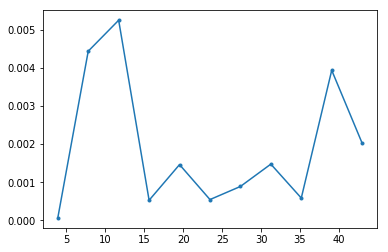

In [326]:
theseparams = deepcopy(orig_ssX_params)
theseparams['I_o'] = 0.
theseparams['Dt'] = 0.001
theseparams['T'] = 1024*5
sim_res = run_net_sim(**theseparams)
srps_norm = sim_res[1]['e'][0].loc[3:45].copy()
srps_norm.plot(marker='.')

fs= 1./0.001
freqs,amps = welch(sim_res[0]['e'][0],fs=fs,nperseg=700)
df_af = pd.DataFrame(amps,index=freqs)[0]
df_af.loc[:50].plot(marker='.')

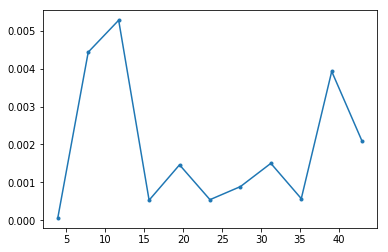

In [325]:
theseparams = deepcopy(orig_ssX_params)
theseparams['I_o'] = 0.
theseparams['Dt'] = 0.001
theseparams['T'] = 1024*100
sim_res = run_net_sim(**theseparams)
srps_norm = sim_res[1]['e'][0].loc[3:45].copy()
srps_norm.plot(marker='.')

In [353]:
from mne.time_frequency import multitaper

In [354]:
welch?

In [ ]:
multitaper

In [336]:
run_net_sim??

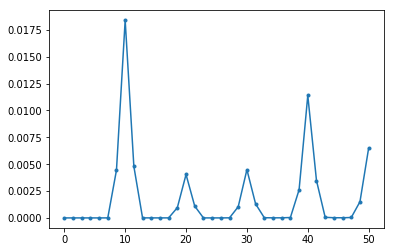

In [363]:
fs= 1./0.001
freqs,amps = welch(sim_res[0]['e'][0],fs=fs,nperseg=700)
df_af = pd.DataFrame(amps,index=freqs)[0]
df_af.loc[:50].plot(marker='.')

In [ ]:
from scipy.signal 

In [ ]:
fs= 1./0.001
freqs,amps = welch(sim_res[0]['e'][0],fs=fs,nperseg=700)
df_af = pd.DataFrame(amps,index=freqs)[0]
df_af.loc[:50].plot(marker='.')

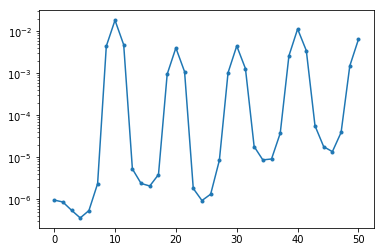

In [368]:
fs= 1./0.001
freqs,amps = welch(sim_res[0]['e'][0],fs=fs,nperseg=700)
df_af = pd.DataFrame(amps,index=freqs)[0]
df_af.loc[:50].plot(marker='.',logy=True)

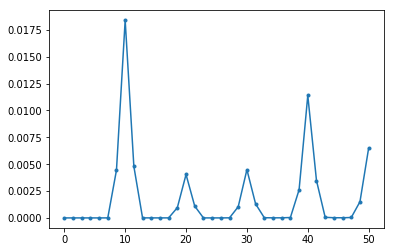

In [364]:
df_af.loc[:50].plot(marker='.')

In [281]:
from numpy import floor

In [283]:
floor(delays_1N).astype(int)

array([[1]])

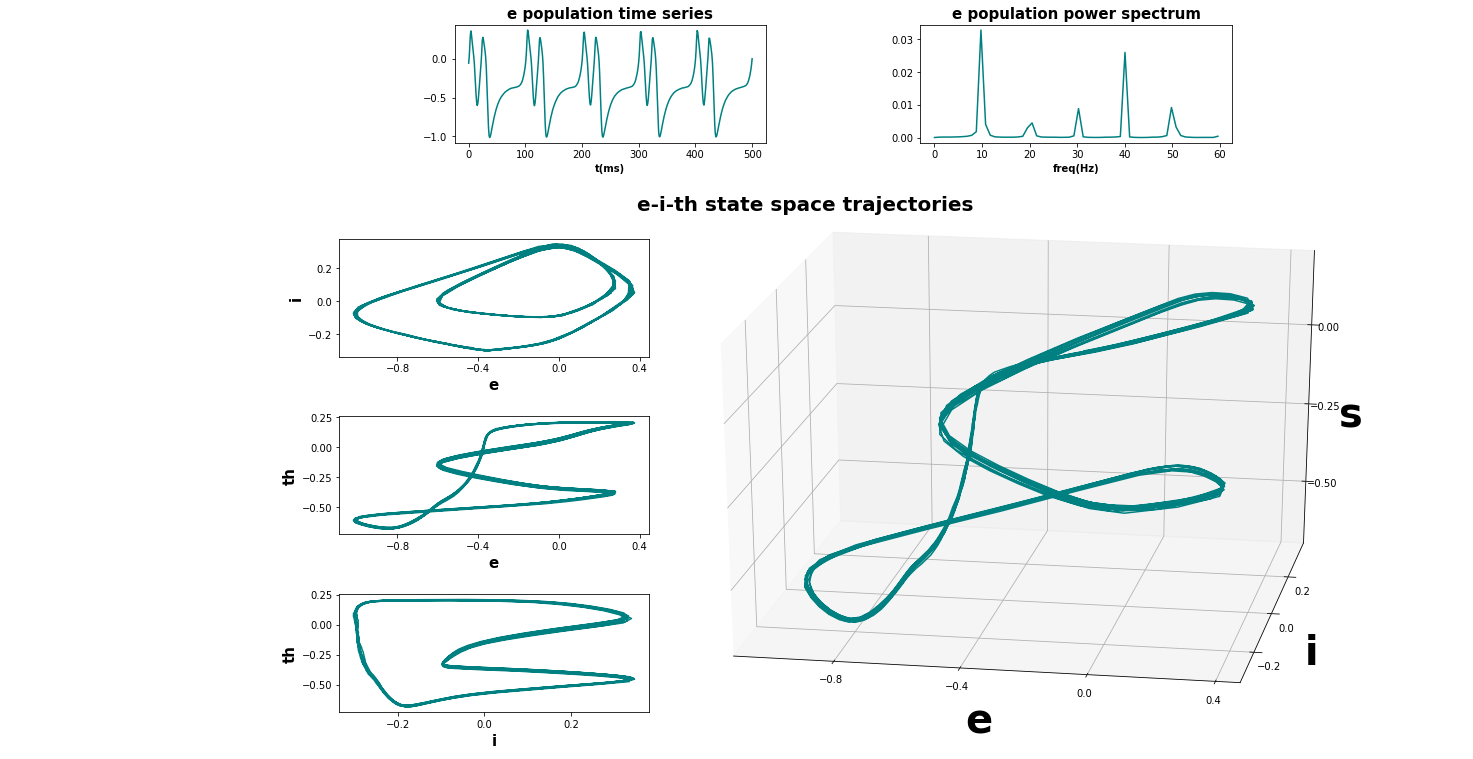

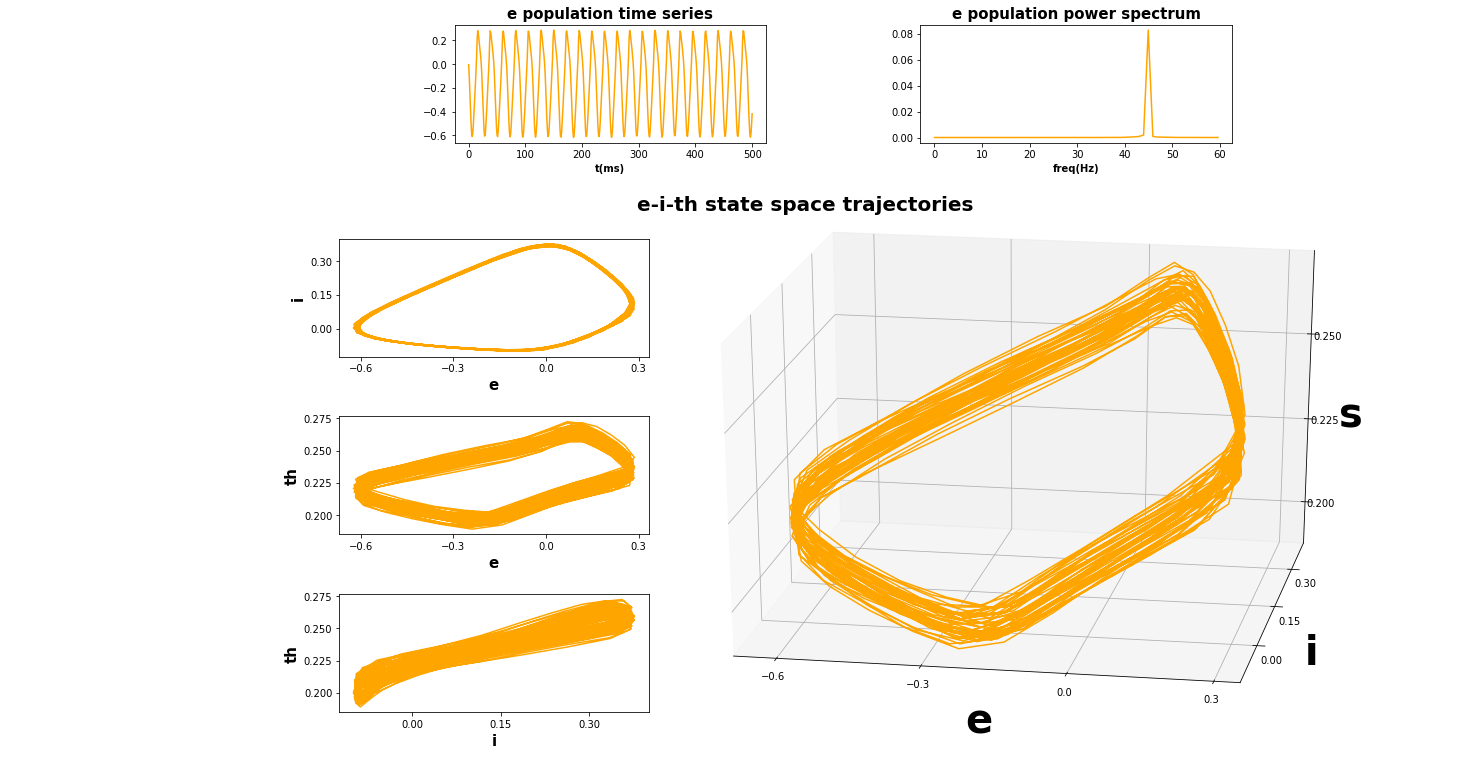

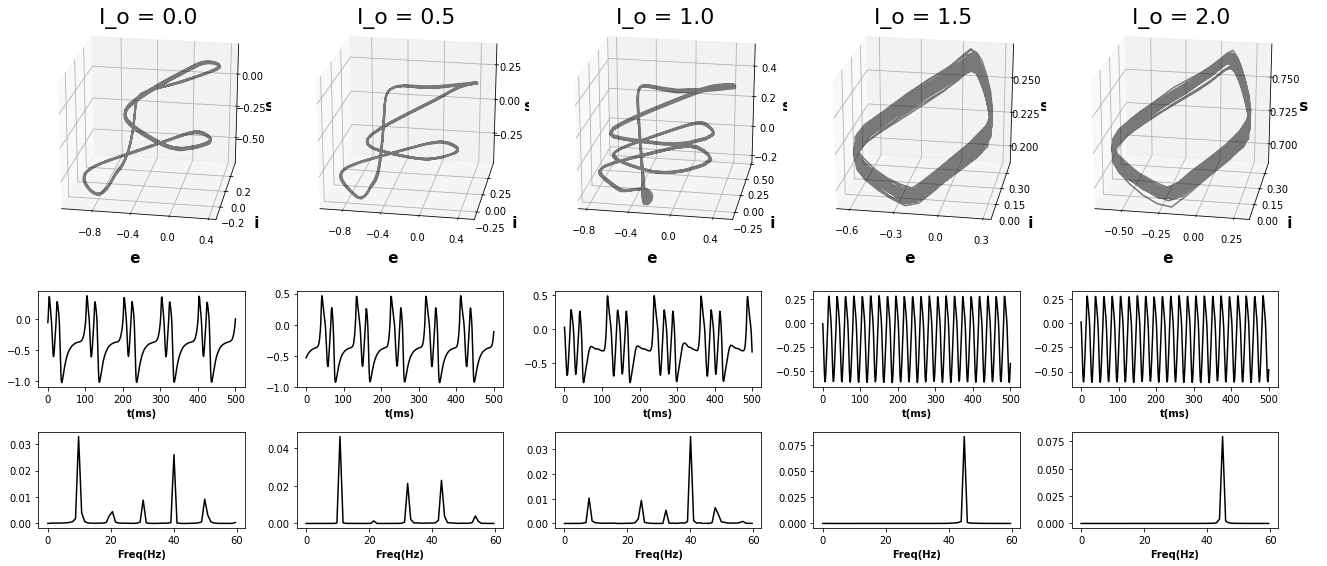

In [206]:
ssX_params = dict(I_o=None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

run_and_make_figs(ssX_params)

In [211]:
ssX_params['I_o'] = 0.

In [212]:
phaseplane_stuff = run_net_sim(**ssX_params)

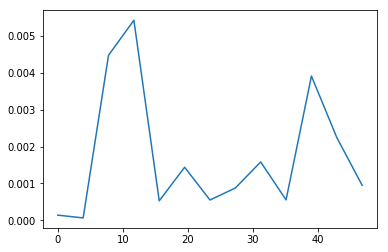

In [219]:
phaseplane_stuff[1]['e'][0].loc[:50].plot()

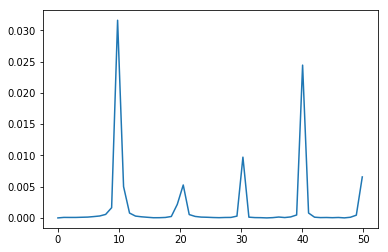

In [220]:
phaseplane_stuff[2]['e'][0].loc[:50].plot()

## Empirical vs. Simulated power spectra figure

In [ ]:
# %load /hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/test2/rest.py
"""
========================================
Compute inverse solution for rest data
========================================

John Griffiths

Based on 

[ link] 

by Denis A. Engemann, Luke Bloy, Eric Larson 
"""


"""
Setup
"""

# Importage
# ---------

# Generic stuff
import os,sys,glob,numpy as np,pandas as pd
import os.path as op

# Neuroimaging stuff
import nibabel as nib
from nilearn.plotting import plot_surf_stat_map
import mne
from mne.filter import next_fast_len
from mne.connectivity import spectral_connectivity
import hcp
from hcp import preprocessing as preproc

from mne.time_frequency import psd_welch
from scipy.signal import welch
from mne.time_frequency import psd_multitaper,psd_welch


# Viz stuff
#from matplotlib import pyplot as plt
#import seaborn as sns


# Define some variables
# ---------------------

storage_dir = '/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Data/connectomeDB/downloaded_HCP900';
hcp_path = '/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Data/connectomeDB/downloaded_HCP900';

# NOTE: ADDED A SYMLINK TO FSAVERAGE WITHIN THIS FOLDER 
subjects_dir = '/rri_disks/hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/hcp-subjects'
recordings_path = '/rri_disks/hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/hcp-meg'

#subject = '990366' #'105923'  # our test subject
data_type = 'rest'
run_index = 0




freq_bands = dict(delta=(2, 4), theta=(5, 7), alpha=(8, 12), beta=(15, 29), gamma=(30, 45))
freqs = freq_bands

orig_to_abey_idx = np.array([46, 32, 50, 58, 16,  6, 22, 42, 26, 20, 12, 34, 16,  8, 64, 18, 60,
       66, 30,  0, 62, 44, 48,  4, 56,  2, 54, 36, 40, 38, 24, 28, 52, 10,
       47, 33, 51, 59, 15,  7, 23, 43, 27, 21, 13, 35, 17,  9, 65, 19, 61,
       67, 31,  1, 63, 45, 49,  5, 57,  3, 55, 37, 41, 39, 25, 29, 53, 11])


from matplotlib import pyplot as plt

import seaborn as sns

from IPython.display import clear_output

from mne.time_frequency import psd_multitaper,psd_welch

from scipy.signal import welch

from hung_symm_ortho import symmetric_ortho,closest_ortho_matrix

def run_it(subject):


  lhi_file = '%s/%s/surf/lh.inflated' %(subjects_dir,subject)
  rhi_file = '%s/%s/surf/rh.inflated' %(subjects_dir,subject)

  hcp.make_mne_anatomy(subject, subjects_dir=subjects_dir,
                       hcp_path=hcp_path,recordings_path=hcp_path)


  """
  Load surface data
  """

  # Surface vertices
  lhi_vtx,lhi_tri = nib.freesurfer.read_geometry(lhi_file)
  rhi_vtx,rhi_tri = nib.freesurfer.read_geometry(rhi_file)

  # Freesurfer aparc labels
  labels = mne.read_labels_from_annot(subject, parc='aparc', subjects_dir=subjects_dir)
  label_colors = [label.color for label in labels]
  labnames = [l.name for l in labels]
  labels_fsav = mne.read_labels_from_annot('fsaverage',parc='aparc',subjects_dir=subjects_dir)

  # ordering for left/right + y axis
  lhrh_surf = {'lh': [lhi_vtx,lhi_tri],
               'rh': [rhi_vtx,rhi_tri]}
  
  # Get ROI xyz centroids
  lab_centroids = []
  for lab in labels:
    hemi = lab.hemi
    if hemi == 'lh': 
        hemi_code = 0
    elif hemi =='rh':
        hemi_code = 1
    com = lhrh_surf[hemi][0][lab.vertices,:].mean(axis=0)
    lab_centroids.append([hemi_code, com[0], com[1], com[2]])    
  lab_centroids = np.array(lab_centroids)
  df_lab_centroids = pd.DataFrame(lab_centroids,columns=['hemi', 'x', 'y', 'z'])
  df_lab_centroids = df_lab_centroids.sort_values(['hemi', 'y'])
  sorted_idx = df_lab_centroids.index.values # reset_index()['index'].values
  sorted_labnames = [labels[i].name for i in sorted_idx]


  """
  Read raw rest data
  """

  # Load data
  raw = hcp.read_raw(subject=subject,
                     data_type=data_type, hcp_path=hcp_path,
                     run_index=run_index)
  raw.load_data()
  raw.crop(0, 250)
  raw.resample(100.)
  raw.info['bads'] = ['A147']  # we know this one is bad here.
  preproc.set_eog_ecg_channels(raw)
  preproc.apply_ref_correction(raw)
  info = raw.info.copy()
  raw.info['projs'] = []
  ecg_ave = mne.preprocessing.create_ecg_epochs(raw).average()
  eog_ave = mne.preprocessing.create_eog_epochs(raw).average()
  ssp_eog, _ = mne.preprocessing.compute_proj_eog(
    raw, n_grad=1, n_mag=1, average=True, reject=dict(mag=5e-12))
  raw.add_proj(ssp_eog, remove_existing=True)
  n_fft = next_fast_len(int(round(4 * raw.info['sfreq'])))


  """
  Source model
  """

  src_outputs = hcp.anatomy.compute_forward_stack(subject=subject, subjects_dir=subjects_dir,
                    hcp_path=hcp_path, recordings_path=hcp_path,src_params=dict(add_dist=False),
                    info_from=dict(data_type=data_type, run_index=run_index))

  fwd = src_outputs['fwd']
  raw_noise = hcp.read_raw(subject=subject, hcp_path=hcp_path,
                         data_type='noise_empty_room')
  raw_noise.load_data()
  preproc.apply_ref_correction(raw_noise)
  raw_noise.add_proj(ssp_eog)
  noise_cov = mne.compute_raw_covariance(raw_noise, method='oas')



  """
  Compute source activity and connectivity
  """

  # Inverse operator

  raw.info = info

  rs_inverse_operator = mne.minimum_norm.make_inverse_operator(
    raw.info, forward=fwd, noise_cov=noise_cov, verbose=True)

  mne.minimum_norm.write_inverse_operator('s%s_rest-inv.fif.gz' %subject, 
                                         rs_inverse_operator,verbose=True)
  
  
  
  #stc_psd, ch_psd = mne.minimum_norm.compute_source_psd(
  # raw, rs_inverse_operator, lambda2=1. / 9.,
  #  n_fft=n_fft, dB=False, return_sensor=True, verbose=True,
  #  fmax=50)


  # Compute raw source time series 

  wins = [[0,5000]]
  for i in range(4):
    new_wins = [wins[0][0]+(5000*(i+1)),
                wins[0][1]+(5000*(i+1))]
    wins.append(new_wins)

  raw_srcs = []
  for win in wins:
    res = mne.minimum_norm.apply_inverse_raw(raw,rs_inverse_operator, lambda2=1. / 9., 
                                             method='dSPM', label=None, start=win[0],stop=win[1],
                                             nave=1,time_func=None,pick_ori=None, 
                                             buffer_size=None,prepared=False,
                                             method_params=None, verbose=None)
    raw_srcs.append(res)


  # Compute label-averaged time series

  src = rs_inverse_operator['src']
  rs_label_ts = mne.extract_label_time_course(raw_srcs, labels, src, mode='mean_flip',
                                           return_generator=False)

  #all_df_rs_label_ts = [pd.DataFrame(l.T,columns=labnames).iloc[:,sorted_idx] for l in rs_label_ts]


  """
  # Compute source connectivity

  freq_bands = dict(delta=(2, 4), theta=(5, 7), alpha=(8, 12), beta=(15, 29), gamma=(30, 45))
  sfreq = raw.info['sfreq']

  rs_sp_coh_labs = {}
  for fb, (fb_low,fb_high) in freq_bands.items():

      rs_label_ts = mne.extract_label_time_course(raw_srcs, labels, src, mode='mean_flip',
                                           return_generator=True)

      coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rs_label_ts,
       method='coh', mode='multitaper', #indices = (idxs_from,idxs_to), # #indices=indices,
      sfreq=sfreq, fmin=fb_low, fmax=fb_high, faverage=True, n_jobs=1)    
      rs_sp_coh_labs[fb] = np.squeeze(coh)
    
  rs_sp_imcoh_labs = {}

  for fb, (fb_low,fb_high) in freq_bands.items():

      rs_label_ts = mne.extract_label_time_course(raw_srcs, labels, src, mode='mean_flip',
                                           return_generator=False)

      coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rs_label_ts,
       method='imcoh', mode='multitaper', #indices = (idxs_from,idxs_to), # #indices=indices,
      sfreq=sfreq, fmin=fb_low, fmax=fb_high, faverage=True, n_jobs=1)    
      rs_sp_imcoh_labs[fb] = np.squeeze(coh)
   
  # Write to file

  df_rs_sp_coh_labs = pd.concat({k: pd.DataFrame(v) for k,v in rs_sp_coh_labs.items()})
  #df_rs_sp_coh_labs.to_pickle('%s_test_df_rs_sp_coh_labs.pkl' %subject)

  df_rs_sp_imcoh_labs = pd.concat({k: pd.DataFrame(v) for k,v in rs_sp_imcoh_labs.items()})
  #df_rs_sp_imcoh_labs.to_pickle('%s_test_df_rs_sp_imcoh_labs.pkl' %subject)
  
  """

  #rs_label_ts = mne.extract_label_time_course(raw_srcs, labels, src, mode='mean_flip',
  #                                         return_generator=True)

  return rs_label_ts,info

def aec(data,sfreq,freq_bands):
    
    # data is  ROI x TIME
    # freq bands is a dict of (lower,upper) freq tuples

    # modified from 
    # https://martinos.org/mne/dev/auto_tutorials/plot_modifying_data_inplace.html
    
    nr = data.shape[0]

    ch_names = [str(s) for s in range(0,nr)]
    ch_types = ['eeg' for _ in ch_names]
    info = mne.create_info(ch_names, sfreq, ch_types=ch_types)
    raw = mne.io.RawArray(data.copy(),info)
    
    AEs = {}

    for freq_band,(lfreq,hfreq) in freq_bands.items():
        raw_band = raw.copy()
        raw_band.filter(lfreq, hfreq, l_trans_bandwidth=2., h_trans_bandwidth=2.,
                        fir_design='firwin')
        
        
        
        raw_hilb = raw_band.copy()
        hilb_picks = mne.pick_types(raw_band.info, meg=False, eeg=True)
        raw_hilb.apply_hilbert(hilb_picks)

        print(raw_hilb[0][0].dtype)

        # Take the amplitude and phase
        raw_amp = raw_hilb.copy()
        raw_amp.apply_function(np.abs, hilb_picks)
        raw_phase = raw_hilb.copy()
        raw_phase.apply_function(np.angle, hilb_picks)

        AEC = raw_amp.to_data_frame().corr()


        
        
        # leakage correction version
        raw_band_lc = raw_band.copy()
        raw_band_lc._data = closest_ortho_matrix(raw_band_lc.get_data().copy())
        
        raw_hilb_lc = raw_band_lc.copy()
        hilb_picks = mne.pick_types(raw_band_lc.info, meg=False, eeg=True)
        raw_hilb_lc.apply_hilbert(hilb_picks)

        print(raw_hilb[0][0].dtype)

        # Take the amplitude and phase
        raw_amp_lc = raw_hilb_lc.copy()
        raw_amp_lc.apply_function(np.abs, hilb_picks)
        raw_phase_lc = raw_hilb_lc.copy()
        raw_phase_lc.apply_function(np.angle, hilb_picks)

        AEC_lc = raw_amp_lc.to_data_frame().corr()
        
        
        AEs[freq_band] = {'raw_filtered': raw_band, 
                          'ae': raw_amp, 
                          'phase': raw_phase,
                          'aec': AEC,
                          'raw_filtered_lc': raw_band_lc, 
                          'ae_lc': raw_amp_lc,
                          'phase_lc': raw_phase_lc,
                          'aec_lc': AEC_lc}

        
    return AEs,raw



"""
def aec(data,sfreq,freq_bands):
    
    # data is  ROI x TIME
    # freq bands is a dict of (lower,upper) freq tuples

    # modified from 
    # https://martinos.org/mne/dev/auto_tutorials/plot_modifying_data_inplace.html
    
    nr = data.shape[0]

    ch_names = [str(s) for s in range(0,nr)]
    ch_types = ['eeg' for _ in ch_names]
    info = mne.create_info(ch_names, sfreq, ch_types=ch_types)
    raw = mne.io.RawArray(data.copy(),info)
    
    AEs = {}

    for freq_band,(lfreq,hfreq) in freq_bands.items():
        raw_band = raw.copy()
        raw_band.filter(lfreq, hfreq, l_trans_bandwidth=2., h_trans_bandwidth=2.,
                        fir_design='firwin')
        raw_hilb = raw_band.copy()
        hilb_picks = mne.pick_types(raw_band.info, meg=False, eeg=True)
        raw_hilb.apply_hilbert(hilb_picks)

        print(raw_hilb[0][0].dtype)

        # Take the amplitude and phase
        raw_amp = raw_hilb.copy()
        raw_amp.apply_function(np.abs, hilb_picks)
        raw_phase = raw_hilb.copy()
        raw_phase.apply_function(np.angle, hilb_picks)

        AEC = raw_amp.to_data_frame().corr()
        
        AEs[freq_band] = {'raw_filtered': raw_band, 'ae': raw_amp, 'phase': raw_phase, 'aec': AEC}
        
    return AEs,raw
""";

"""
def run_ana(sub):
    
    rslts,info = run_it(sub)
    ares = [aec(r,info['sfreq'],freq_bands) for r in rslts]
    rslts_aec = [a[0] for a in ares]
    rslts_raw = [a[1] for a in ares]

    aec_mean = {f: np.zeros([68,68]) for f in freqs}
    aec_abs_mean = {f: np.zeros([68,68]) for f in freqs}
    N = len(rslts_aec)
    for freq in freqs:
        for r in rslts_aec:
            mat = r[freq]['aec'].values
            aec_mean[freq] += mat
            aec_abs_mean[freq] += np.abs(mat)
    for freq in freqs:
        aec_mean[freq] /= N
        aec_abs_mean[freq] /= N
        
    return rslts,rslts_aec,aec_mean,rslts_raw
""";


def run_ana(sub):
    
    rslts,info = run_it(sub)
    ares = [aec(r,info['sfreq'],freq_bands) for r in rslts]
    rslts_aec = [a[0] for a in ares]
    rslts_raw = [a[1] for a in ares]

    aec_mean = {f: np.zeros([68,68]) for f in freqs}
    aec_abs_mean = {f: np.zeros([68,68]) for f in freqs}
    
    aec_lc_mean = {f: np.zeros([68,68]) for f in freqs}
    aec_lc_abs_mean = {f: np.zeros([68,68]) for f in freqs}
    
    N = len(rslts_aec)
    for freq in freqs:
        for r in rslts_aec:
            mat = r[freq]['aec'].values
            aec_mean[freq] += mat
            aec_abs_mean[freq] += np.abs(mat)
            
    for freq in freqs:
        for r in rslts_aec:
            mat = r[freq]['aec_lc'].values
            aec_lc_mean[freq] += mat
            aec_lc_abs_mean[freq] += np.abs(mat)
            
    for freq in freqs:
        aec_mean[freq] /= N
        aec_abs_mean[freq] /= N
        aec_lc_mean[freq] /= N
        aec_lc_abs_mean[freq] /= N

        
    return rslts,rslts_aec,aec_mean,aec_lc_mean,rslts_raw

def get_psds(rs):
    
    psds_mne_mt = [psd_multitaper(r) for r in rs]
    df_psds_mne_mt = pd.concat({p_it: pd.DataFrame(p[0].T,index=p[1]) \
                      for p_it,p in enumerate(psds_mne_mt)})

    psds_mne_wel = [psd_welch(r) for r in rs]
    df_psds_mne_wel = pd.concat({p_it: pd.DataFrame(p[0].T,index=p[1]) #
                                 for p_it,p in enumerate(psds_mne_wel)})
    
    psds_wel = [welch(r.get_data(),fs=100.) for r in rs]
    df_psds_wel = pd.concat({p_it: pd.DataFrame(p[1].T,index=p[0]) for p_it,p in enumerate(psds_wel)})

    #df_psds_wel[0].loc[3:60].plot(legend=False,logy=True,c='k')
    
    
    #_df = pd.concat({k_it: pd.DataFrame(k) for k_it,k in enumerate(rslts_psds[0])}).unstack().mean().unstack()    
    
    
    df_psds_mne_mt_mn = df_psds_mne_mt.unstack().mean().unstack()
    df_psds_mne_wel_mn = df_psds_mne_wel.unstack().mean().unstack()
    df_psds_wel_mn = df_psds_wel.unstack().mean().unstack()
    
    df_psds_mne_mt_mn_sensavg = df_psds_mne_mt_mn.T.mean(axis=1)    
    df_psds_mne_wel_mn_sensavg = df_psds_mne_wel_mn.T.mean(axis=1)    
    df_psds_wel_mn_sensavg = df_psds_wel_mn.T.mean(axis=1)    
    
    clear_output()
    
    return (df_psds_mne_mt,df_psds_mne_wel,df_psds_wel,
            df_psds_mne_mt_mn,df_psds_mne_wel_mn,df_psds_wel_mn,
            df_psds_mne_mt_mn_sensavg,
            df_psds_mne_wel_mn_sensavg,
            df_psds_wel_mn_sensavg )

"""
def plot_stuff(aec_mean):        
        
    fig, ax = plt.subplots(ncols=5, figsize=(12,2))
    for freq_it,freq in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
        mat1 = aec_mean[freq]
        mat1 = mat1[orig_to_abey_idx,:][:,orig_to_abey_idx]
        a = ax[freq_it]
        sns.heatmap(mat1,xticklabels='',yticklabels='',ax=a,
            vmin=0,vmax=0.2,cmap='viridis',mask=np.eye(68))#,mask=mat<0.1)
        a.set_title(freq)        
""";      

def plot_stuff(aec_mean,vmin=0.,vmax=0.2,cmap='viridis',
              order=orig_to_abey_idx,mask=np.eye(68)):
        
    fig, ax = plt.subplots(ncols=5, figsize=(12,2))
    for freq_it,freq in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
        mat1 = aec_mean[freq]
        mat1 = mat1[order,:][:,order]
        a = ax[freq_it]
        sns.heatmap(mat1,xticklabels='',yticklabels='',ax=a,
            vmin=vmin,vmax=vmax,cmap=cmap,mask=mask)
        a.set_title(freq)        
        

Load meg time series data

In [36]:
%%time
rslts,rslts_aec,aec_mean,aec_lc_mean,rslts_raw = run_ana('680957')


reading extended structural processing ...
reading RAS freesurfer transform
Combining RAS transform and coregistration
extracting head model
coregistring head model to MNE-HCP coordinates
extracting coregistration
Reading labels from parcellation...
   read 34 labels from /rri_disks/hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/hcp-subjects/680957/label/lh.aparc.annot
   read 34 labels from /rri_disks/hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/hcp-subjects/680957/label/rh.aparc.annot
Reading labels from parcellation...
   read 35 labels from /rri_disks/hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/hcp-subjects/fsaverage/label/lh.aparc.annot
   read 34 labels from /rri_disks/hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/hcp-subjects/fsaverage/label/rh.aparc.annot
Reading 4D PDF file /mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Data

MEG coil definitions created in head coordinates.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces are in head coordinates.
Checking that the sources are inside the bounding surface (will take a few...)
Thank you for waiting.

Setting up compensation data...
    No compensation set. Nothing more to do.

Composing the field computation matrix...
Computing MEG at 8196 source locations (free orientations)...

Finished.
Reading 4D PDF file /mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Data/connectomeDB/downloaded_HCP900/680957/unprocessed/MEG/1-Rnoise/4D/c,rfDC...
Creating Neuromag info structure ...
... Setting channel info structure.
... no headshape file supplied, doing nothing.
Currently direct inclusion of 4D weight tables is not supported. For critical use cases please take into account the MNE command "mne_create_comp_data" to include weights as printed out

  Iteration: 19
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.688915131403181e-05
   Rhos: 114.40495462129573
  Iteration: 20
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.317909975092088e-05
   Rhos: 114.4098946308959
  Iteration: 21
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.985712235894849e-05
   Rhos: 114.41445477094231
  Iteration: 22
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.687104437648476e-05
   Rhos: 114.41867342915465
  Iteration: 23
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.417834599757066e-05
   Rhos: 114.42258413699446
  Iteration: 24
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.1743975575460914e-05
   Rhos: 114.42621642236217
  Iteration: 25
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.9538626247875193e-05
   Rhos: 114.42959646552295
  Iteration: 26
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7537404186076258e-05
   Rhos: 114.43274

  Iteration: 85
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.311639682461075e-06
   Rhos: 114.4926249344276
  Iteration: 86
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.2546035543436397e-06
   Rhos: 114.49299756313803
  Iteration: 87
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.1994426573681293e-06
   Rhos: 114.49336387750441
  Iteration: 88
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.1460593862129226e-06
   Rhos: 114.4937240809931
  Iteration: 89
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.0943620005810495e-06
   Rhos: 114.49407836657035
  Iteration: 90
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.0442642484100306e-06
   Rhos: 114.49442691733032
  Iteration: 91
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.9956850142972828e-06
   Rhos: 114.494769907083
  Iteration: 92
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.9485479942562534e-06
   Rhos: 114.4951

  Iteration: 153
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3610123181158578e-06
   Rhos: 114.50908078619877
  Iteration: 154
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.345587440847942e-06
   Rhos: 114.5092348682834
  Iteration: 155
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3303630792690592e-06
   Rhos: 114.50938720724304
  Iteration: 156
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3153362948627681e-06
   Rhos: 114.50953782569519
  Iteration: 157
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3005042148118897e-06
   Rhos: 114.5096867459286
  Iteration: 158
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2858640261641768e-06
   Rhos: 114.5098339899101
  Iteration: 159
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2714129716113968e-06
   Rhos: 114.50997957929097
  Iteration: 160
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2571483471300066e-06
   Rhos:

  Iteration: 20
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.939619004607549e-05
   Rhos: 111.82087817738075
  Iteration: 21
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.75472004962328e-05
   Rhos: 111.822840337965
  Iteration: 22
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5946130912099343e-05
   Rhos: 111.82462349383322
  Iteration: 23
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4545216264281476e-05
   Rhos: 111.82625001899468
  Iteration: 24
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3308513262832664e-05
   Rhos: 111.8277382700294
  Iteration: 25
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.220878594537252e-05
   Rhos: 111.82910355928296
  Iteration: 26
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1225133701086725e-05
   Rhos: 111.83035886296756
  Iteration: 27
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0341236508053369e-05
   Rhos: 111.831515

  Iteration: 88
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.314070285302434e-07
   Rhos: 111.84889287499493
  Iteration: 89
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.154892077274044e-07
   Rhos: 111.84895053190697
  Iteration: 90
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.001882654373591e-07
   Rhos: 111.84900647745351
  Iteration: 91
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.854741982226376e-07
   Rhos: 111.84906077727344
  Iteration: 92
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.7131880328834284e-07
   Rhos: 111.84911349385133
  Iteration: 93
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.5769554912660117e-07
   Rhos: 111.84916468670447
  Iteration: 94
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.4457945772437857e-07
   Rhos: 111.8492144125565
  Iteration: 95
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.31946996428698e-07
   Rhos: 111.849262

  Iteration: 156
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0514929897930702e-07
   Rhos: 111.85074827463194
  Iteration: 157
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0319570647482072e-07
   Rhos: 111.85075981714952
  Iteration: 158
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0128997731861408e-07
   Rhos: 111.85077114651102
  Iteration: 159
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.943068849890359e-08
   Rhos: 111.85078226791076
  Iteration: 160
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.761646452290798e-08
   Rhos: 111.85079318638921
  Iteration: 161
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.584597805201969e-08
   Rhos: 111.8508039068384
  Iteration: 162
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.411794507374963e-08
   Rhos: 111.85081443400671
  Iteration: 163
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.243112553690857e-08
   Rhos: 1

  Iteration: 21
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.619706997598862e-05
   Rhos: 100.18668332512775
  Iteration: 22
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.322227911345228e-05
   Rhos: 100.19001181037456
  Iteration: 23
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.06065754299985e-05
   Rhos: 100.1930783304562
  Iteration: 24
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.830016510700984e-05
   Rhos: 100.19591385123839
  Iteration: 25
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.6259500640160503e-05
   Rhos: 100.19854498044837
  Iteration: 26
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.4446844220485534e-05
   Rhos: 100.20099454861074
  Iteration: 27
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.2829815349056718e-05
   Rhos: 100.20328214492677
  Iteration: 28
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.1380887964641024e-05
   Rhos: 100.20542

  Iteration: 87
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7456691930253117e-06
   Rhos: 100.24943321181354
  Iteration: 88
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.6882621031236537e-06
   Rhos: 100.24970270892794
  Iteration: 89
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.632542256430934e-06
   Rhos: 100.2499666208539
  Iteration: 90
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.578433500745222e-06
   Rhos: 100.25022510905953
  Iteration: 91
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.5258648919323013e-06
   Rhos: 100.25047832790334
  Iteration: 92
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.4747702628322424e-06
   Rhos: 100.25072642511293
  Iteration: 93
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.4250878225179098e-06
   Rhos: 100.25096954222357
  Iteration: 94
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.376759784627884e-06
   Rhos: 100.251

  Iteration: 152
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.678033694757564e-07
   Rhos: 100.25966137716449
  Iteration: 153
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.544067407566198e-07
   Rhos: 100.2597470397316
  Iteration: 154
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.412530993888124e-07
   Rhos: 100.25983138359001
  Iteration: 155
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.283372943263174e-07
   Rhos: 100.25991443258187
  Iteration: 156
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.156543258123986e-07
   Rhos: 100.25999621004813
  Iteration: 157
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.031993365894455e-07
   Rhos: 100.26007673884291
  Iteration: 158
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.909676090620182e-07
   Rhos: 100.26015604134746
  Iteration: 159
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.789545577825764e-07
   Rhos: 100.

  Iteration: 16
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7309118014691046e-05
   Rhos: 79.17274911438327
  Iteration: 17
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.4255860955205746e-05
   Rhos: 79.17466954086802
  Iteration: 18
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.164012524327462e-05
   Rhos: 79.17638290917174
  Iteration: 19
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9381118756911348e-05
   Rhos: 79.17791745092221
  Iteration: 20
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.741786646854868e-05
   Rhos: 79.17929657332631
  Iteration: 21
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5702933057561034e-05
   Rhos: 79.18053993028212
  Iteration: 22
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4198475079931724e-05
   Rhos: 79.18166418118646
  Iteration: 23
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2873712932451881e-05
   Rhos: 79.182683549

  Iteration: 83
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.135311907084257e-07
   Rhos: 79.19601887567329
  Iteration: 84
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.971996384999768e-07
   Rhos: 79.19605825191503
  Iteration: 85
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.815339209350429e-07
   Rhos: 79.19609638751267
  Iteration: 86
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.665012530533528e-07
   Rhos: 79.19613333259949
  Iteration: 87
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.5207080864384686e-07
   Rhos: 79.19616913486762
  Iteration: 88
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.3821356967935243e-07
   Rhos: 79.1962038397112
  Iteration: 89
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.249021920818462e-07
   Rhos: 79.19623749035897
  Iteration: 90
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.121108829732678e-07
   Rhos: 79.19627012799705

  Iteration: 148
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0150915941017874e-07
   Rhos: 79.19722454860529
  Iteration: 149
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.956937555473881e-08
   Rhos: 79.19723243422388
  Iteration: 150
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.767861748838502e-08
   Rhos: 79.19724017010043
  Iteration: 151
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.583533844083951e-08
   Rhos: 79.19724775999511
  Iteration: 152
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.403804960136004e-08
   Rhos: 79.19725520755017
  Iteration: 153
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.22853183242815e-08
   Rhos: 79.19726251629442
  Iteration: 154
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.057576471963737e-08
   Rhos: 79.19726968964736
  Iteration: 155
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.890805967927715e-08
   Rhos: 79.1972767

  Iteration: 15
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.240619577279655e-05
   Rhos: 153.09062663869614
  Iteration: 16
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.135100710134127e-05
   Rhos: 153.0954262592555
  Iteration: 17
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.0363673075134653e-05
   Rhos: 153.10007486930218
  Iteration: 18
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.9441823951819033e-05
   Rhos: 153.10458248110965
  Iteration: 19
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.8581614766592735e-05
   Rhos: 153.10895851984225
  Iteration: 20
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7778479984337243e-05
   Rhos: 153.11321171305553
  Iteration: 21
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7027511140383732e-05
   Rhos: 153.11735003801516
  Iteration: 22
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.6323688659056882e-05
   Rhos: 153.12

  Iteration: 81
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.530492111306366e-06
   Rhos: 153.26104248665487
  Iteration: 82
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.420251648732217e-06
   Rhos: 153.26248625104336
  Iteration: 83
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.312682575866654e-06
   Rhos: 153.26391354257456
  Iteration: 84
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.207692708647626e-06
   Rhos: 153.2653247560908
  Iteration: 85
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.105192695771515e-06
   Rhos: 153.2667202727595
  Iteration: 86
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.005095979203561e-06
   Rhos: 153.26810046050034
  Iteration: 87
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.907318750810429e-06
   Rhos: 153.26946567440567
  Iteration: 88
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.81177990585615e-06
   Rhos: 153.2708162571

  Iteration: 149
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.275277603017231e-06
   Rhos: 153.33393090719193
  Iteration: 150
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.237287071011886e-06
   Rhos: 153.33473396310873
  Iteration: 151
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.199657445642822e-06
   Rhos: 153.33553125327268
  Iteration: 152
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.162382655867947e-06
   Rhos: 153.33632283200296
  Iteration: 153
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.125456853731702e-06
   Rhos: 153.33710875272385
  Iteration: 154
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.088874403603125e-06
   Rhos: 153.33788906799717
  Iteration: 155
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.052629871599887e-06
   Rhos: 153.3386638295532
  Iteration: 156
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.016718017793211e-06
   Rhos: 153.

  Iteration: 14
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.007731412791191e-05
   Rhos: 113.68516003700324
  Iteration: 15
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.399889244070118e-05
   Rhos: 113.69243599415915
  Iteration: 16
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.850468686512269e-05
   Rhos: 113.69908772910476
  Iteration: 17
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.355225260389037e-05
   Rhos: 113.70517673441164
  Iteration: 18
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.909539656410366e-05
   Rhos: 113.71075927219326
  Iteration: 19
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.5087790683901196e-05
   Rhos: 113.71588635469024
  Iteration: 20
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.148484627529729e-05
   Rhos: 113.72060393860885
  Iteration: 21
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.8244643618142406e-05
   Rhos: 113.72495

  Iteration: 82
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.2802715029877215e-06
   Rhos: 113.79368468067605
  Iteration: 83
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.2148443464359976e-06
   Rhos: 113.79393671625434
  Iteration: 84
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.1519379946078428e-06
   Rhos: 113.79418159401379
  Iteration: 85
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.091433326553713e-06
   Rhos: 113.79441958720642
  Iteration: 86
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.03321783856618e-06
   Rhos: 113.79465095628547
  Iteration: 87
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9771852265850044e-06
   Rhos: 113.79487594961063
  Iteration: 88
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9232349978470205e-06
   Rhos: 113.79509480410908
  Iteration: 89
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.8712721111541595e-06
   Rhos: 113.79

  Iteration: 150
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.236930984014549e-07
   Rhos: 113.80217675596568
  Iteration: 151
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.154520567126378e-07
   Rhos: 113.80223541554686
  Iteration: 152
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.074012306054983e-07
   Rhos: 113.8022931589558
  Iteration: 153
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.995347447155519e-07
   Rhos: 113.80235000716947
  Iteration: 154
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.918469301230642e-07
   Rhos: 113.80240598051972
  Iteration: 155
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.843323168590485e-07
   Rhos: 113.80246109871602
  Iteration: 156
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.769856272854674e-07
   Rhos: 113.80251538086726
  Iteration: 157
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.6980176847653734e-07
   Rhos: 113

  Iteration: 15
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.6571288635712613e-05
   Rhos: 108.16861710614451
  Iteration: 16
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.1958144973849265e-05
   Rhos: 108.17207402973004
  Iteration: 17
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.8102163740462086e-05
   Rhos: 108.17511394178062
  Iteration: 18
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.486566400425191e-05
   Rhos: 108.17780382126034
  Iteration: 19
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.213421714373737e-05
   Rhos: 108.18019827875997
  Iteration: 20
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9814535119383402e-05
   Rhos: 108.18234184033483
  Iteration: 21
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.7831469494912998e-05
   Rhos: 108.1842709076623
  Iteration: 22
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.612485551268104e-05
   Rhos: 108.186

  Iteration: 81
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.269673772644289e-07
   Rhos: 108.21091317752645
  Iteration: 82
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.00621616469746e-07
   Rhos: 108.21101063465788
  Iteration: 83
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.752672931928367e-07
   Rhos: 108.2111053482577
  Iteration: 84
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.508575560595942e-07
   Rhos: 108.21119742053351
  Iteration: 85
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.273482498458759e-07
   Rhos: 108.21128694891534
  Iteration: 86
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.04697730533283e-07
   Rhos: 108.2113740263274
  Iteration: 87
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.828666963902963e-07
   Rhos: 108.21145874144146
  Iteration: 88
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.618180304819993e-07
   Rhos: 108.21154117891

  Iteration: 147
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.1017372659308725e-07
   Rhos: 108.21412841025084
  Iteration: 148
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.0646333473133463e-07
   Rhos: 108.21415075250296
  Iteration: 149
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.0283876643812682e-07
   Rhos: 108.21417270253004
  Iteration: 150
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.992975523648599e-07
   Rhos: 108.21419426935194
  Iteration: 151
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9583730879004967e-07
   Rhos: 108.21421546173059
  Iteration: 152
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9245573210353127e-07
   Rhos: 108.21423628817865
  Iteration: 153
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.891505982808953e-07
   Rhos: 108.21425675696813
  Iteration: 154
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.8591975631714984e-07
   Rho

  Iteration: 12
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.106814324673429e-05
   Rhos: 89.510918842054
  Iteration: 13
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.223314439286839e-05
   Rhos: 89.51827990902972
  Iteration: 14
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.417833211927779e-05
   Rhos: 89.5249204720205
  Iteration: 15
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.698027858497438e-05
   Rhos: 89.53091707696115
  Iteration: 16
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.062850282876297e-05
   Rhos: 89.53634536697496
  Iteration: 17
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.506599443043994e-05
   Rhos: 89.5412759106229
  Iteration: 18
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.0214973342919505e-05
   Rhos: 89.54577233629979
  Iteration: 19
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.5991799392303804e-05
   Rhos: 89.54989080220534
  

  Iteration: 78
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.01637819860197e-06
   Rhos: 89.62457299687806
  Iteration: 79
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.908782674957214e-06
   Rhos: 89.62501294550904
  Iteration: 80
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.804287730462486e-06
   Rhos: 89.6254435308934
  Iteration: 81
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.7027768490565304e-06
   Rhos: 89.62586502034542
  Iteration: 82
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.604139384297999e-06
   Rhos: 89.62627767127036
  Iteration: 83
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.508270087873611e-06
   Rhos: 89.62668173164788
  Iteration: 84
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.415068702834645e-06
   Rhos: 89.62707744047887
  Iteration: 85
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.324439618068825e-06
   Rhos: 89.62746502820146
 

  Iteration: 144
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5644916884013892e-06
   Rhos: 89.64126323565549
  Iteration: 145
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5425599913368937e-06
   Rhos: 89.64140151278838
  Iteration: 146
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5210868105071033e-06
   Rhos: 89.6415378652456
  Iteration: 147
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5000610259438018e-06
   Rhos: 89.64167233312371
  Iteration: 148
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.479471782126801e-06
   Rhos: 89.64180495554653
  Iteration: 149
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4593084813179439e-06
   Rhos: 89.64193577068824
  Iteration: 150
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4395607770539849e-06
   Rhos: 89.64206481579583
  Iteration: 151
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.420218568115385e-06
   Rhos: 89.64

  Iteration: 9
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.767271170489583e-05
   Rhos: 78.58751573592023
  Iteration: 10
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.603522036306789e-05
   Rhos: 78.59191952806601
  Iteration: 11
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.65927533506084e-05
   Rhos: 78.59558142729692
  Iteration: 12
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.889180624580063e-05
   Rhos: 78.59863821086348
  Iteration: 13
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.263685042409158e-05
   Rhos: 78.60120346472321
  Iteration: 14
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7569393628631758e-05
   Rhos: 78.6033704821129
  Iteration: 15
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.3457681094775996e-05
   Rhos: 78.60521435653715
  Iteration: 16
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.0105578554259078e-05
   Rhos: 78.60679477573679


  Iteration: 75
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.7794188021771584e-07
   Rhos: 78.6214422946377
  Iteration: 76
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.642753050072618e-07
   Rhos: 78.62147093449279
  Iteration: 77
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.5128251239871976e-07
   Rhos: 78.62149855284548
  Iteration: 78
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.3892152223423826e-07
   Rhos: 78.62152519936797
  Iteration: 79
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.2715346015847565e-07
   Rhos: 78.62155092067619
  Iteration: 80
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.159423029243469e-07
   Rhos: 78.62157576055397
  Iteration: 81
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.052546439448805e-07
   Rhos: 78.62159976015874
  Iteration: 82
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.950594807176696e-07
   Rhos: 78.621622958210

  Iteration: 143
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.449837951195612e-08
   Rhos: 78.6222902399453
  Iteration: 144
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.330904684973154e-08
   Rhos: 78.62229521744771
  Iteration: 145
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.21508779675206e-08
   Rhos: 78.62230010389254
  Iteration: 146
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.102284674489128e-08
   Rhos: 78.62230490164926
  Iteration: 147
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.992396700746608e-08
   Rhos: 78.6223096130098
  Iteration: 148
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.885329144239144e-08
   Rhos: 78.62231424019164
  Iteration: 149
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.780990726033938e-08
   Rhos: 78.62231878534047
  Iteration: 150
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.679293764145951e-08
   Rhos: 78.6223232505

  Iteration: 9
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.8029988091146503e-05
   Rhos: 138.15647664256062
  Iteration: 10
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7620020790377994e-05
   Rhos: 138.16029258001595
  Iteration: 11
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.6960369994216447e-05
   Rhos: 138.1640174828348
  Iteration: 12
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.6205544403777613e-05
   Rhos: 138.1676381935713
  Iteration: 13
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.5421382057210477e-05
   Rhos: 138.1711506505355
  Iteration: 14
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.4638143840495155e-05
   Rhos: 138.17455497315794
  Iteration: 15
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.38728352327741e-05
   Rhos: 138.17785363091633
  Iteration: 16
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.3136445794954076e-05
   Rhos: 138.18105

  Iteration: 74
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.547303843303765e-06
   Rhos: 138.28843783782924
  Iteration: 75
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.444563730132606e-06
   Rhos: 138.28960562828644
  Iteration: 76
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.343525721955154e-06
   Rhos: 138.29075945598157
  Iteration: 77
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.244145508746497e-06
   Rhos: 138.2918995498246
  Iteration: 78
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.146380841841353e-06
   Rhos: 138.29302613289445
  Iteration: 79
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.050191437354646e-06
   Rhos: 138.29413942271037
  Iteration: 80
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.955538879819567e-06
   Rhos: 138.29523963148978
  Iteration: 81
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.862386534879683e-06
   Rhos: 138.29632696

  Iteration: 141
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.1522757243240795e-06
   Rhos: 138.34384499871888
  Iteration: 142
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.111296191338007e-06
   Rhos: 138.34441377241112
  Iteration: 143
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.070741332916353e-06
   Rhos: 138.3449769378807
  Iteration: 144
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.030601658793395e-06
   Rhos: 138.34553455249798
  Iteration: 145
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.9908679492164795e-06
   Rhos: 138.34608667235946
  Iteration: 146
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.951531297047095e-06
   Rhos: 138.34663335233088
  Iteration: 147
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.9125831601330125e-06
   Rhos: 138.34717464609773
  Iteration: 148
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.874015417582694e-06
   Rhos: 1

  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00011869015978029707
   Rhos: 122.7648608892264
  Iteration: 7
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00012277678460372515
   Rhos: 122.77993448945278
  Iteration: 8
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00011566528865815476
   Rhos: 122.7941366873676
  Iteration: 9
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00010558625168455445
   Rhos: 122.80710274450794
  Iteration: 10
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.558205314362472e-05
   Rhos: 122.81884146053417
  Iteration: 11
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.664914426470411e-05
   Rhos: 122.82948406913277
  Iteration: 12
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.898515871893938e-05
   Rhos: 122.83918615858788
  Iteration: 13
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.248043685140304e-05
   Rhos: 122.848089919

  Iteration: 73
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.725805790210023e-06
   Rhos: 122.98487775007598
  Iteration: 74
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.6107018426434512e-06
   Rhos: 122.98532181260238
  Iteration: 75
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.500446957314108e-06
   Rhos: 122.98575231695139
  Iteration: 76
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.3947717406942935e-06
   Rhos: 122.98616982621654
  Iteration: 77
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.2934236796242664e-06
   Rhos: 122.9865748724475
  Iteration: 78
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.196166353484081e-06
   Rhos: 122.98696795862823
  Iteration: 79
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.1027786485361462e-06
   Rhos: 122.98734956055847
  Iteration: 80
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.0130539668044302e-06
   Rhos: 122.987

  Iteration: 141
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.466082553693114e-07
   Rhos: 122.99911537364207
  Iteration: 142
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.334497154273317e-07
   Rhos: 122.99920558734132
  Iteration: 143
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.20615685749876e-07
   Rhos: 122.99929422253014
  Iteration: 144
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.080959889515831e-07
   Rhos: 122.99938131786786
  Iteration: 145
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.958808157054785e-07
   Rhos: 122.99946691080744
  Iteration: 146
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.839607122607277e-07
   Rhos: 122.99955103763921
  Iteration: 147
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.723265649567149e-07
   Rhos: 122.99963373353265
  Iteration: 148
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.609695871636307e-07
   Rhos: 122.

  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00018188308518999984
   Rhos: 114.5833803065964
  Iteration: 7
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00014278655658985558
   Rhos: 114.59974244105922
  Iteration: 8
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00011281802316190823
   Rhos: 114.61267208680482
  Iteration: 9
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.951253092200686e-05
   Rhos: 114.62293181634622
  Iteration: 10
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.149016989568737e-05
   Rhos: 114.63112652213617
  Iteration: 11
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.765600107628e-05
   Rhos: 114.63773588502502
  Iteration: 12
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.7029655850698e-05
   Rhos: 114.6431273850714
  Iteration: 13
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.881051466662761e-05
   Rhos: 114.64757683019083


  Iteration: 73
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.298021809295517e-07
   Rhos: 114.68449394495507
  Iteration: 74
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.059905685194214e-07
   Rhos: 114.68457491115473
  Iteration: 75
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.832626735780023e-07
   Rhos: 114.68465327087077
  Iteration: 76
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.615582767068889e-07
   Rhos: 114.68472914147745
  Iteration: 77
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.408210492908456e-07
   Rhos: 114.68480263388946
  Iteration: 78
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.209982647383907e-07
   Rhos: 114.684873852975
  Iteration: 79
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.020405362443727e-07
   Rhos: 114.68494289793874
  Iteration: 80
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.839015721522974e-07
   Rhos: 114.685009862

  Iteration: 141
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5650054554523751e-07
   Rhos: 114.68709611460814
  Iteration: 142
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5409803760755774e-07
   Rhos: 114.68711378766595
  Iteration: 143
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5175187440632246e-07
   Rhos: 114.68713119165176
  Iteration: 144
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4946025907541164e-07
   Rhos: 114.68714833282138
  Iteration: 145
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4722146562769478e-07
   Rhos: 114.68716521723269
  Iteration: 146
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.450338359810457e-07
   Rhos: 114.6871818507534
  Iteration: 147
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4289577648872824e-07
   Rhos: 114.68719823906848
  Iteration: 148
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4080575446979134e-07
   Rho

  Iteration: 5
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.5059559701102194e-05
   Rhos: 94.91549063897581
  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.287762314199494e-05
   Rhos: 94.92240810639723
  Iteration: 7
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.292889371426442e-05
   Rhos: 94.93028024310398
  Iteration: 8
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.564015168937807e-05
   Rhos: 94.93841043483934
  Iteration: 9
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.463292864469682e-05
   Rhos: 94.94644569057893
  Iteration: 10
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.153884822325775e-05
   Rhos: 94.954187830046
  Iteration: 11
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.727895303034801e-05
   Rhos: 94.96152607381325
  Iteration: 12
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.244636798236117e-05
   Rhos: 94.96840594068604
  Iter

  Iteration: 73
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.142653144987271e-06
   Rhos: 95.07100566550356
  Iteration: 74
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.034213808879772e-06
   Rhos: 95.07138920304108
  Iteration: 75
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.929553916147832e-06
   Rhos: 95.07176279192485
  Iteration: 76
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.82850841521138e-06
   Rhos: 95.07212677566551
  Iteration: 77
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.730921955881287e-06
   Rhos: 95.07248148301238
  Iteration: 78
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.6366481121091517e-06
   Rhos: 95.07282722880136
  Iteration: 79
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.5455486740007686e-06
   Rhos: 95.07316431473545
  Iteration: 80
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.4574929998195853e-06
   Rhos: 95.0734930301038

  Iteration: 141
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.022918051583138e-06
   Rhos: 95.0844810382317
  Iteration: 142
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.006437282832209e-06
   Rhos: 95.08457673484659
  Iteration: 143
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.903145716095409e-07
   Rhos: 95.0846708985351
  Iteration: 144
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.745407263402227e-07
   Rhos: 95.08476356246449
  Iteration: 145
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.591068241201498e-07
   Rhos: 95.08485475895382
  Iteration: 146
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.440041969613458e-07
   Rhos: 95.08494451949815
  Iteration: 147
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.292244253608218e-07
   Rhos: 95.08503287479213
  Iteration: 148
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.147593267882179e-07
   Rhos: 95.085119854

  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.730593719667292e-05
   Rhos: 84.61459764853436
  Iteration: 7
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.966302875719182e-05
   Rhos: 84.6213385721613
  Iteration: 8
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.430245790810554e-05
   Rhos: 84.62678010717501
  Iteration: 9
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.181236439891749e-05
   Rhos: 84.63116493433796
  Iteration: 10
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.206734194512589e-05
   Rhos: 84.63472521737829
  Iteration: 11
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.454417062242438e-05
   Rhos: 84.63764890426495
  Iteration: 12
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.8701987795044516e-05
   Rhos: 84.64007820789372
  Iteration: 13
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.4110572735039077e-05
   Rhos: 84.64211895325742
  I

  Iteration: 73
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.624956086327504e-07
   Rhos: 84.66123449762023
  Iteration: 74
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.429637412675708e-07
   Rhos: 84.66128046561333
  Iteration: 75
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.243215265514393e-07
   Rhos: 84.66132485535678
  Iteration: 76
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.065192154576831e-07
   Rhos: 84.66136773795549
  Iteration: 77
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.895103053943205e-07
   Rhos: 84.6614091805776
  Iteration: 78
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.7325130349922734e-07
   Rhos: 84.66144924670934
  Iteration: 79
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.577015097453914e-07
   Rhos: 84.66148799639134
  Iteration: 80
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.4282281532379384e-07
   Rhos: 84.66152548643811

  Iteration: 139
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.822300252228515e-08
   Rhos: 84.66258847259053
  Iteration: 140
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.625117556566706e-08
   Rhos: 84.66259662146459
  Iteration: 141
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.433060000766291e-08
   Rhos: 84.6626046077385
  Iteration: 142
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.245963052473633e-08
   Rhos: 84.662612435612
  Iteration: 143
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.063668574697051e-08
   Rhos: 84.66262010915095
  Iteration: 144
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.886024506876193e-08
   Rhos: 84.66262763229246
  Iteration: 145
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.712884512381554e-08
   Rhos: 84.66263500884975
  Iteration: 146
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.544107877793778e-08
   Rhos: 84.6626422425

  Iteration: 5
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.65753997932737e-06
   Rhos: 146.1505254548702
  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1552252768338963e-05
   Rhos: 146.15221383243477
  Iteration: 7
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.127330769230804e-05
   Rhos: 146.15532300652075
  Iteration: 8
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.5779439268076586e-05
   Rhos: 146.15909085736044
  Iteration: 9
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7728317249583404e-05
   Rhos: 146.16314365918933
  Iteration: 10
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.838861211638687e-05
   Rhos: 146.16729308687863
  Iteration: 11
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.8389455115475084e-05
   Rhos: 146.1714427555885
  Iteration: 12
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.8047129869891175e-05
   Rhos: 146.1755425025

  Iteration: 70
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2032141341440807e-05
   Rhos: 146.32314007111964
  Iteration: 71
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1880954500685328e-05
   Rhos: 146.32487854001656
  Iteration: 72
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1730261899041633e-05
   Rhos: 146.32659497923132
  Iteration: 73
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1580133217954879e-05
   Rhos: 146.32828947050572
  Iteration: 74
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1430636835449169e-05
   Rhos: 146.32996210560106
  Iteration: 75
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1281839506086922e-05
   Rhos: 146.33161298606095
  Iteration: 76
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1133806086979157e-05
   Rhos: 146.33324222293413
  Iteration: 77
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0986599313531436e-05
   Rhos: 146

  Iteration: 138
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.576713650236317e-06
   Rhos: 146.39989556233436
  Iteration: 139
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.51329894994047e-06
   Rhos: 146.40055631032035
  Iteration: 140
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.450938329800053e-06
   Rhos: 146.4012079316181
  Iteration: 141
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.389614570746756e-06
   Rhos: 146.4018505779041
  Iteration: 142
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.329310587135738e-06
   Rhos: 146.40248439835779
  Iteration: 143
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.2700094373931554e-06
   Rhos: 146.4031095396825
  Iteration: 144
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.211694333305211e-06
   Rhos: 146.4037261461278
  Iteration: 145
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.154348648919455e-06
   Rhos: 146.404

Filter length of 165 samples (1.650 sec) selected
complex64
Converting time column to int64...
Starting symmetric orthogonalization leakage correction
2.220446049250313e-16
  Iteration: 2
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00118712593007665
   Rhos: 129.50723875136464
  Iteration: 3
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00035435130349262354
   Rhos: 129.4613558218393
  Iteration: 4
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.538097241443376e-05
   Rhos: 129.45418632459067
  Iteration: 5
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.2988578159771824e-05
   Rhos: 129.45975149561698
  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.825553425962642e-05
   Rhos: 129.46988283405204
  Iteration: 7
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.038087989699558e-05
   Rhos: 129.48158496480718
  Iteration: 8
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.2

  Iteration: 68
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.2293953854667586e-06
   Rhos: 129.67144784369205
  Iteration: 69
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.106784102547825e-06
   Rhos: 129.6719803774261
  Iteration: 70
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.989102959013542e-06
   Rhos: 129.67249765333847
  Iteration: 71
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.876082663738834e-06
   Rhos: 129.6730002756327
  Iteration: 72
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.7674721849775495e-06
   Rhos: 129.67348881597465
  Iteration: 73
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.663037352038227e-06
   Rhos: 129.67396381567772
  Iteration: 74
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.562559580033217e-06
   Rhos: 129.6744257877227
  Iteration: 75
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.4658346953316266e-06
   Rhos: 129.6748752

  Iteration: 136
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.910347445276677e-07
   Rhos: 129.68910608598105
  Iteration: 137
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.744315407748532e-07
   Rhos: 129.6892194902755
  Iteration: 138
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.582092459397534e-07
   Rhos: 129.68933079081052
  Iteration: 139
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.42357484349552e-07
   Rhos: 129.68944003563496
  Iteration: 140
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.268662078483152e-07
   Rhos: 129.68954727149477
  Iteration: 141
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.117256852723111e-07
   Rhos: 129.68965254387413
  Iteration: 142
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.969264899532586e-07
   Rhos: 129.6897558970349
  Iteration: 143
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.824594880984683e-07
   Rhos: 129.68

Setting up band-pass filter from 15 - 29 Hz
Filter length of 165 samples (1.650 sec) selected
complex64
Converting time column to int64...
Starting symmetric orthogonalization leakage correction
2.220446049250313e-16
  Iteration: 2
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.001633381595207714
   Rhos: 120.89471447135537
  Iteration: 3
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.788333268312005e-05
   Rhos: 120.90292148603722
  Iteration: 4
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00019367969245427343
   Rhos: 120.92634019455159
  Iteration: 5
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00014258909005575087
   Rhos: 120.94358420076728
  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00011399402574908034
   Rhos: 120.95737183267268
  Iteration: 7
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.678791921095966e-05
   Rhos: 120.96907961159137
  Iteration: 8
   Tolerance: 2.

  Iteration: 66
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2326597475347851e-06
   Rhos: 121.06244822365994
  Iteration: 67
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1857117308470324e-06
   Rhos: 121.06259176891007
  Iteration: 68
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.140953125714002e-06
   Rhos: 121.06272989573135
  Iteration: 69
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0982588544478439e-06
   Rhos: 121.06286285401941
  Iteration: 70
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.057512768381344e-06
   Rhos: 121.06299087961035
  Iteration: 71
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0186068661513874e-06
   Rhos: 121.0631141952669
  Iteration: 72
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.814405940544862e-07
   Rhos: 121.06323301157992
  Iteration: 73
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.459202119205313e-07
   Rhos: 121.0633

  Iteration: 134
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.572274315166242e-07
   Rhos: 121.06633988620239
  Iteration: 135
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.536694354801594e-07
   Rhos: 121.06635849039992
  Iteration: 136
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5022018102834974e-07
   Rhos: 121.06637667701158
  Iteration: 137
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4687575317923474e-07
   Rhos: 121.06639445872814
  Iteration: 138
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4363239248672503e-07
   Rhos: 121.06641184778528
  Iteration: 139
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4048648917113716e-07
   Rhos: 121.06642885598163
  Iteration: 140
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3743457595857057e-07
   Rhos: 121.06644549469608
  Iteration: 141
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.344733222115006e-07
   Rhos

Setting up band-pass filter from 5 - 7 Hz
Filter length of 165 samples (1.650 sec) selected
complex64
Converting time column to int64...
Starting symmetric orthogonalization leakage correction
2.220446049250313e-16
  Iteration: 2
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.0011469502237703374
   Rhos: 95.56788298360897
  Iteration: 3
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.0002719999664932715
   Rhos: 95.54189205740512
  Iteration: 4
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.09780998304e-06
   Rhos: 95.54121392161652
  Iteration: 5
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.328325185301289e-05
   Rhos: 95.54821574901702
  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.922891781509897e-05
   Rhos: 95.55769736549023
  Iteration: 7
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00010476824762155816
   Rhos: 95.5677093024565
  Iteration: 8
   Tolerance: 2.22044604925031

  Iteration: 66
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.046931531439995e-06
   Rhos: 95.71324654510684
  Iteration: 67
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.914997964475141e-06
   Rhos: 95.71362126300575
  Iteration: 68
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.788829281016394e-06
   Rhos: 95.71398390626358
  Iteration: 69
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.668133585713181e-06
   Rhos: 95.7143349985865
  Iteration: 70
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.552639755168666e-06
   Rhos: 95.71467503774217
  Iteration: 71
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.4420953342073645e-06
   Rhos: 95.71500449734555
  Iteration: 72
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.336264668209826e-06
   Rhos: 95.71532382846596
  Iteration: 73
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.2349272250232503e-06
   Rhos: 95.71563346107368

  Iteration: 132
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.098582031867758e-07
   Rhos: 95.72516437508654
  Iteration: 133
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.956225662603504e-07
   Rhos: 95.7252501087423
  Iteration: 134
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.817253563561819e-07
   Rhos: 95.72533451215978
  Iteration: 135
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.681570921392602e-07
   Rhos: 95.7254176168239
  Iteration: 136
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.549085865978296e-07
   Rhos: 95.72549945334036
  Iteration: 137
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.419709356079564e-07
   Rhos: 95.72558005146263
  Iteration: 138
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.293355088736078e-07
   Rhos: 95.72565944011819
  Iteration: 139
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.169939390855124e-07
   Rhos: 95.725737647

  Iteration: 200
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.0241540808764307e-07
   Rhos: 95.72903323384203
complex64
Converting time column to int64...
Setting up band-pass filter from 30 - 45 Hz
Filter length of 165 samples (1.650 sec) selected
complex64
Converting time column to int64...
Starting symmetric orthogonalization leakage correction
2.220446049250313e-16
  Iteration: 2
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.0014958655013389212
   Rhos: 90.59205941853533
  Iteration: 3
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9188968585656897e-05
   Rhos: 90.59379780339653
  Iteration: 4
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.0001828489193469443
   Rhos: 90.61036429600705
  Iteration: 5
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.0001334536902466256
   Rhos: 90.62245739043098
  Iteration: 6
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00010412173105509512
   Rhos: 90.6318

  Iteration: 65
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.661094765442406e-07
   Rhos: 90.68693257567813
  Iteration: 66
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.452836558095927e-07
   Rhos: 90.68698202579374
  Iteration: 67
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.255472574865139e-07
   Rhos: 90.68702968610096
  Iteration: 68
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.068247769657598e-07
   Rhos: 90.6870756485462
  Iteration: 69
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.890469542938543e-07
   Rhos: 90.68711999879518
  Iteration: 70
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.721502063934823e-07
   Rhos: 90.68716281674772
  Iteration: 71
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.560761149194489e-07
   Rhos: 90.68720417700604
  Iteration: 72
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.4077096144411477e-07
   Rhos: 90.68724414930102


  Iteration: 133
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.312576649580701e-08
   Rhos: 90.6883880005795
  Iteration: 134
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.128137156950365e-08
   Rhos: 90.68839627874031
  Iteration: 135
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.948525855006155e-08
   Rhos: 90.68840439401527
  Iteration: 136
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.773590977292741e-08
   Rhos: 90.68841235064528
  Iteration: 137
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.603186210657681e-08
   Rhos: 90.6884201527386
  Iteration: 138
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.437170679572578e-08
   Rhos: 90.68842780427572
  Iteration: 139
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.275408523035351e-08
   Rhos: 90.68843530911391
  Iteration: 140
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.117768737862676e-08
   Rhos: 90.688442670

  Iteration: 199
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.153116519218142e-08
   Rhos: 90.68871353318836
  Iteration: 200
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.111357101312678e-08
   Rhos: 90.68871635483814
complex64
Converting time column to int64...
Setting up band-pass filter from 2 - 4 Hz
Filter length of 165 samples (1.650 sec) selected
complex64
Converting time column to int64...
Starting symmetric orthogonalization leakage correction
2.220446049250313e-16
  Iteration: 2
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.000849538205655542
   Rhos: 135.14130721724393
  Iteration: 3
   Tolerance: 2.220446049250313e-16
   Relative difference: 0.00026391119993293184
   Rhos: 135.10564661831145
  Iteration: 4
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.153359787036881e-05
   Rhos: 135.09598237097543
  Iteration: 5
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4548923647246215e-05
   Rhos: 135.09

  Iteration: 65
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0655935276132871e-05
   Rhos: 135.21796730594852
  Iteration: 66
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0504180876968378e-05
   Rhos: 135.21938766739478
  Iteration: 67
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0354269384988853e-05
   Rhos: 135.2207877726093
  Iteration: 68
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0206217611427459e-05
   Rhos: 135.2221678724377
  Iteration: 69
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.0060039016359952e-05
   Rhos: 135.22352821956494
  Iteration: 70
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.91574395923235e-06
   Rhos: 135.22486906809578
  Iteration: 71
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.773339932756182e-06
   Rhos: 135.2261906731668
  Iteration: 72
   Tolerance: 2.220446049250313e-16
   Relative difference: 9.632831787950538e-06
   Rhos: 135.227493

  Iteration: 130
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.276243204913704e-06
   Rhos: 135.278504400806
  Iteration: 131
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.220733659564863e-06
   Rhos: 135.27907537654792
  Iteration: 132
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.166102821170399e-06
   Rhos: 135.27963896425948
  Iteration: 133
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.1123357688278025e-06
   Rhos: 135.28019528070146
  Iteration: 134
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.059417845661381e-06
   Rhos: 135.28074444065498
  Iteration: 135
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.007334654384599e-06
   Rhos: 135.28128655695647
  Iteration: 136
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.9560720528632654e-06
   Rhos: 135.2818217405321
  Iteration: 137
   Tolerance: 2.220446049250313e-16
   Relative difference: 3.905616148839183e-06
   Rhos: 135.

  Iteration: 195
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9897511476526837e-06
   Rhos: 135.30425476345656
  Iteration: 196
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9692211661634973e-06
   Rhos: 135.30452120772125
  Iteration: 197
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9489871717843233e-06
   Rhos: 135.30478491475435
  Iteration: 198
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.929044318744533e-06
   Rhos: 135.30504592393274
  Iteration: 199
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9093878401502414e-06
   Rhos: 135.30530427398878
  Iteration: 200
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.8900130498716288e-06
   Rhos: 135.30556000302124
complex64
Converting time column to int64...
Creating RawArray with float64 data, n_channels=68, n_times=5000
    Range : 0 ... 4999 =      0.000 ...    49.990 secs
Ready.
Setting up band-pass filter from 8 - 12 Hz
Filter length of 1

  Iteration: 58
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.299135217511456e-06
   Rhos: 130.14955984517917
  Iteration: 59
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.095243572547726e-06
   Rhos: 130.15035314086495
  Iteration: 60
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.900562009427281e-06
   Rhos: 130.1511211033599
  Iteration: 61
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.714527611509951e-06
   Rhos: 130.15186485766023
  Iteration: 62
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.536623817230828e-06
   Rhos: 130.1525854615699
  Iteration: 63
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.36637584233564e-06
   Rhos: 130.15328391113442
  Iteration: 64
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.20334657646358e-06
   Rhos: 130.15396114554062
  Iteration: 65
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.0471329070608995e-06
   Rhos: 130.1546180515

  Iteration: 126
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2516097764219193e-06
   Rhos: 130.17474197547176
  Iteration: 127
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2287420372165005e-06
   Rhos: 130.17490192674768
  Iteration: 128
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2063900445633844e-06
   Rhos: 130.17505896854814
  Iteration: 129
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1845406485457881e-06
   Rhos: 130.17521316628824
  Iteration: 130
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1631811179836398e-06
   Rhos: 130.1753645837263
  Iteration: 131
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1422991168438937e-06
   Rhos: 130.17551328301522
  Iteration: 132
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1218826804330986e-06
   Rhos: 130.1756593247509
  Iteration: 133
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.101920192027198e-06
   Rhos

  Iteration: 191
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.4365191303179596e-07
   Rhos: 130.1811131002706
  Iteration: 192
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.376254411936654e-07
   Rhos: 130.18117007085013
  Iteration: 193
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.3170505269003316e-07
   Rhos: 130.18122627073114
  Iteration: 194
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.2588837972490324e-07
   Rhos: 130.18128171341448
  Iteration: 195
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.201731169541404e-07
   Rhos: 130.18133641210088
  Iteration: 196
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.1455701777349705e-07
   Rhos: 130.18139037969866
  Iteration: 197
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.0903789584643733e-07
   Rhos: 130.18144362883154
  Iteration: 198
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.0361362030058367e-07
   Rhos

  Iteration: 56
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.1684796003104793e-06
   Rhos: 124.72866494846434
  Iteration: 57
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.0794626236906853e-06
   Rhos: 124.72892431733088
  Iteration: 58
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.9946975389573085e-06
   Rhos: 124.72917311405739
  Iteration: 59
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.913967491020243e-06
   Rhos: 124.72941184186837
  Iteration: 60
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.8370674871016447e-06
   Rhos: 124.72964097842602
  Iteration: 61
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.7638032476341467e-06
   Rhos: 124.72986097716587
  Iteration: 62
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.693990335898864e-06
   Rhos: 124.73007226852393
  Iteration: 63
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.627453483564578e-06
   Rhos: 124.73

  Iteration: 121
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.581612700010247e-07
   Rhos: 124.73520913199634
  Iteration: 122
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.519643194039964e-07
   Rhos: 124.73524056082238
  Iteration: 123
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.459790146801659e-07
   Rhos: 124.73527124307772
  Iteration: 124
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.4019736539245526e-07
   Rhos: 124.73530120416484
  Iteration: 125
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.3461166936360605e-07
   Rhos: 124.73533046852552
  Iteration: 126
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.2921449980082213e-07
   Rhos: 124.73535905967518
  Iteration: 127
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.239986933319437e-07
   Rhos: 124.73538700023575
  Iteration: 128
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.1895733872528734e-07
   Rhos:

  Iteration: 186
   Tolerance: 2.220446049250313e-16
   Relative difference: 8.034351006086622e-08
   Rhos: 124.73636621985634
  Iteration: 187
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.921291273687357e-08
   Rhos: 124.73637610058762
  Iteration: 188
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.810197699263423e-08
   Rhos: 124.73638584274558
  Iteration: 189
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.701022865370513e-08
   Rhos: 124.73639544872354
  Iteration: 190
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.593721291364379e-08
   Rhos: 124.73640492085812
  Iteration: 191
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.488249422006117e-08
   Rhos: 124.73641426143159
  Iteration: 192
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.384565365427992e-08
   Rhos: 124.73642347267398
  Iteration: 193
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.282628950095216e-08
   Rhos: 124

  Iteration: 50
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.83852054044422e-06
   Rhos: 102.93487691682617
  Iteration: 51
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.559479890368168e-06
   Rhos: 102.9356550538994
  Iteration: 52
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.294485982971671e-06
   Rhos: 102.93640591933092
  Iteration: 53
   Tolerance: 2.220446049250313e-16
   Relative difference: 7.042525689373434e-06
   Rhos: 102.93713085416667
  Iteration: 54
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.802686015910027e-06
   Rhos: 102.93783110552904
  Iteration: 55
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.574142653594974e-06
   Rhos: 102.93850783573964
  Iteration: 56
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.356149721042883e-06
   Rhos: 102.9391621303869
  Iteration: 57
   Tolerance: 2.220446049250313e-16
   Relative difference: 6.1480306526027496e-06
   Rhos: 102.939795005

  Iteration: 118
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3337722183000704e-06
   Rhos: 102.95806045342609
  Iteration: 119
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3083609832699304e-06
   Rhos: 102.95819515982342
  Iteration: 120
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2836084916304018e-06
   Rhos: 102.95832731792183
  Iteration: 121
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2594934764608402e-06
   Rhos: 102.9584569933451
  Iteration: 122
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2359955005248962e-06
   Rhos: 102.95858424961332
  Iteration: 123
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2130949182960355e-06
   Rhos: 102.95870914822443
  Iteration: 124
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1907728396405146e-06
   Rhos: 102.95883174873188
  Iteration: 125
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1690110970900846e-06
   Rh

  Iteration: 183
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.803942503245668e-07
   Rhos: 102.96341901102122
  Iteration: 184
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.7431923864343483e-07
   Rhos: 102.96346784856331
  Iteration: 185
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.683559569073181e-07
   Rhos: 102.96351607212812
  Iteration: 186
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.625018417992851e-07
   Rhos: 102.96356369295495
  Iteration: 187
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.5675439957604295e-07
   Rhos: 102.9636107220264
  Iteration: 188
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.5111120192686324e-07
   Rhos: 102.96365717007507
  Iteration: 189
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.455698845928999e-07
   Rhos: 102.96370304759013
  Iteration: 190
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.4012814626256376e-07
   Rhos: 

  Iteration: 49
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.769263436784019e-06
   Rhos: 88.92695798563243
  Iteration: 50
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.679166083725951e-06
   Rhos: 88.92710730888957
  Iteration: 51
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5948662155133398e-06
   Rhos: 88.92724913584176
  Iteration: 52
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5159336415675838e-06
   Rhos: 88.92738394375256
  Iteration: 53
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4419724003967415e-06
   Rhos: 88.9275121746783
  Iteration: 54
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3726178232859496e-06
   Rhos: 88.92763423825026
  Iteration: 55
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3075339476234529e-06
   Rhos: 88.92775051422693
  Iteration: 56
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2464111957840775e-06
   Rhos: 88.9278613548

  Iteration: 115
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.6715202016814436e-07
   Rhos: 88.93035685872248
  Iteration: 116
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.6305147753883366e-07
   Rhos: 88.93037135894974
  Iteration: 117
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.590857457753023e-07
   Rhos: 88.93038550650532
  Iteration: 118
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5524937149430666e-07
   Rhos: 88.93039931289285
  Iteration: 119
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.5153715731753288e-07
   Rhos: 88.93041278915378
  Iteration: 120
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.479441481283153e-07
   Rhos: 88.93042594588891
  Iteration: 121
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4446561748820833e-07
   Rhos: 88.93043879327874
  Iteration: 122
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.4109705692996348e-07
   Rhos: 88.9

  Iteration: 180
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.646047652636874e-08
   Rhos: 88.93087108134776
  Iteration: 181
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.572933924019601e-08
   Rhos: 88.93087514809783
  Iteration: 182
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.5013392801282924e-08
   Rhos: 88.93087915117833
  Iteration: 183
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.431223499723686e-08
   Rhos: 88.93088309190443
  Iteration: 184
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.362547671918299e-08
   Rhos: 88.93088697155669
  Iteration: 185
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.29527419617545e-08
   Rhos: 88.93089079138221
  Iteration: 186
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.22936657457275e-08
   Rhos: 88.93089455259566
  Iteration: 187
   Tolerance: 2.220446049250313e-16
   Relative difference: 4.1647895556181804e-08
   Rhos: 88.9308982

  Iteration: 44
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.3062296265815337e-05
   Rhos: 140.61717863026593
  Iteration: 45
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.287587836571334e-05
   Rhos: 140.6189892116105
  Iteration: 46
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2693311897551552e-05
   Rhos: 140.62077414362764
  Iteration: 47
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2514370737505996e-05
   Rhos: 140.62253393514
  Iteration: 48
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2338848351235858e-05
   Rhos: 140.62426906596576
  Iteration: 49
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.2166557200960703e-05
   Rhos: 140.62597998958722
  Iteration: 50
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1997327967352624e-05
   Rhos: 140.6276671357105
  Iteration: 51
   Tolerance: 2.220446049250313e-16
   Relative difference: 1.1831008620206619e-05
   Rhos: 140.62933

  Iteration: 109
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.5155731546698565e-06
   Rhos: 140.69577759571305
  Iteration: 110
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.45050876430106e-06
   Rhos: 140.69654446137184
  Iteration: 111
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.386515836126637e-06
   Rhos: 140.6973023275778
  Iteration: 112
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.3235753898122535e-06
   Rhos: 140.6980513422676
  Iteration: 113
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.261668732239766e-06
   Rhos: 140.69879165075267
  Iteration: 114
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.200777461307544e-06
   Rhos: 140.69952339575994
  Iteration: 115
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.1408834660956725e-06
   Rhos: 140.7002467174727
  Iteration: 116
   Tolerance: 2.220446049250313e-16
   Relative difference: 5.081968929860182e-06
   Rhos: 140.

  Iteration: 175
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.8434821288943905e-06
   Rhos: 140.73230578910164
  Iteration: 176
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.8201329080129785e-06
   Rhos: 140.73270267346805
  Iteration: 177
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7971110859928803e-06
   Rhos: 140.7330963190214
  Iteration: 178
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7744109212617173e-06
   Rhos: 140.73348677100245
  Iteration: 179
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.752026774993323e-06
   Rhos: 140.7338740738591
  Iteration: 180
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.7299531123148086e-06
   Rhos: 140.73425827126107
  Iteration: 181
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.708184499070761e-06
   Rhos: 140.7346394061139
  Iteration: 182
   Tolerance: 2.220446049250313e-16
   Relative difference: 2.68671559939542e-06
   Rhos: 14

CPU times: user 3.84 s, sys: 1.27 s, total: 5.11 s
Wall time: 3.67 s


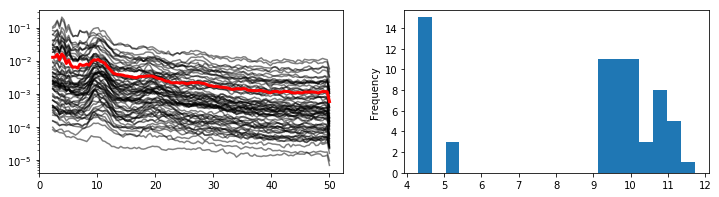

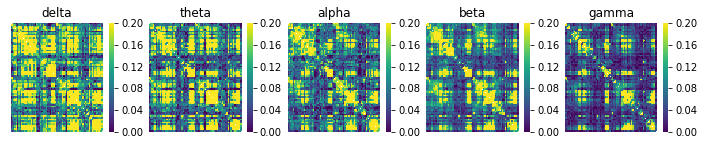

In [37]:
%%time
psd_stuff = get_psds(rslts_raw)
clear_output()

fig, ax = plt.subplots(ncols=2, figsize=(12,3))
psd_stuff[-4].T.loc[2:].plot(legend=False, alpha=0.5,logy=True,c='k', ax=ax[0],logx=False)
psd_stuff[-1].T.loc[2:].plot(legend=False, alpha=1.,logy=True,c='r', ax=ax[0],linewidth=3.,logx=False)

psd_stuff[5].T.loc[4:].idxmax().plot(kind='hist',bins=20,ax=ax[1])

plot_stuff(aec_mean)





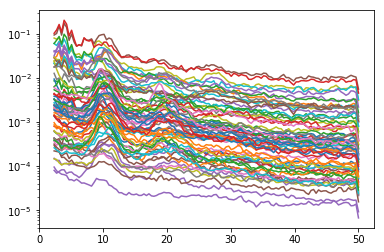

In [42]:
psd_stuff[-4].T.loc[2:].plot(legend=False,logy=True)

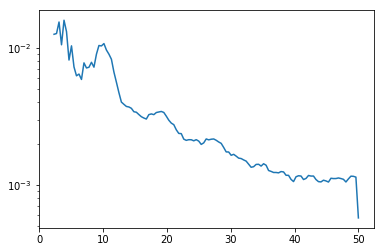

In [43]:
psd_stuff[-4].T.loc[2:].mean(axis=1).plot(legend=False,logy=True)

HCP computed power spectrum from same subject


In [ ]:
ls ../680957_MEG_3-Restin_powavg.mat

In [ ]:
psd_stuff[-4].T.loc[2:].plot(legend=False, alpha=0.5,logy=True,c='k', ax=ax[0],logx=False)


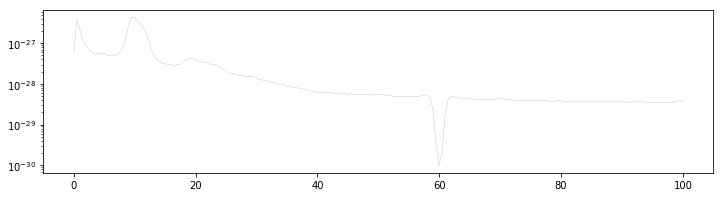

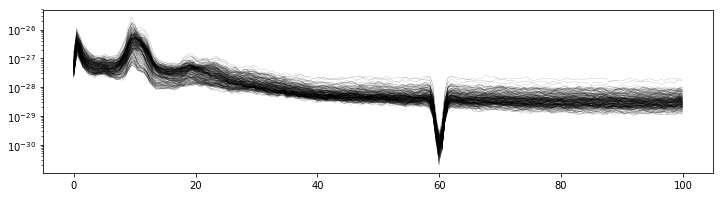

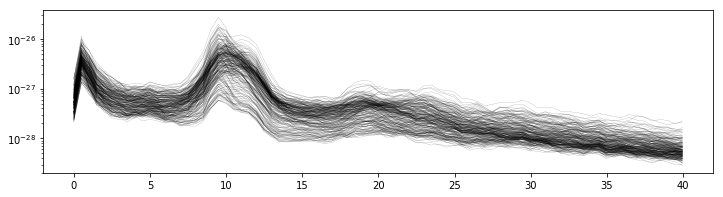

In [46]:
#mat = loadmat('../100307_MEG_3-Restin_powavg.mat',struct_as_record=False,squeeze_me=True)['freq']

mat = loadmat('../680957_MEG_3-Restin_powavg.mat',struct_as_record=False,squeeze_me=True)['freq']
hcp_ps = pd.DataFrame(mat.powspctrm,columns=mat.freq,index=mat.label).T

fig,ax = plt.subplots(figsize=(12,3))
hcp_ps.loc[:100].mean(axis=1).plot(legend=False,c='k', linewidth=0.1,
                                   logy=True,ax=ax)

fig, ax = plt.subplots(figsize=(12,3))
hcp_ps.loc[:100].plot(legend=False,c='k', linewidth=0.1, logy=True,
                      ax=ax)


fig, ax = plt.subplots(figsize=(12,3))
hcp_ps.loc[:40].plot(legend=False,c='k', linewidth=0.1, logy=True,
                      ax=ax)

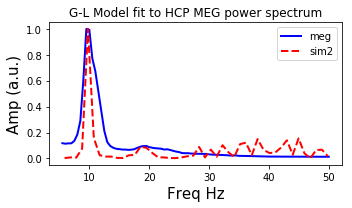

In [47]:
ssX_params = dict(I_o=0., # None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .001,D_i= .001,D_th = 0.001,D_rtn = 0.001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

sim_res = run_net_sim(**ssX_params)

#run_and_make_figs(ssX_params)

meg_dat = hcp_ps.loc[5:100].mean(axis=1)
#sim1_dat = simX1[2]['e'].loc[5:100].mean(axis=1)
#sim2_dat = simX2[2]['e'].loc[5:100].mean(axis=1)
sim1_dat = sim_res[2]['e'].loc[5:100].mean(axis=1)
sim2_dat = sim_res[2]['e'].loc[5:100].mean(axis=1)

meg_dat_log = np.log1p(meg_dat)
sim1_dat_log = np.log1p(sim1_dat)
sim2_dat_log = np.log1p(sim2_dat)

meg_dat_log_norm = meg_dat_log / meg_dat_log.max()
sim1_dat_log_norm = sim1_dat_log / sim1_dat_log.max()
sim2_dat_log_norm = sim2_dat_log / sim2_dat_log.max()

df = pd.concat({'meg': meg_dat_log_norm,
               'sim1': sim1_dat_log_norm,
               'sim2': sim2_dat_log_norm},axis=1)

thing = interp1d(df.meg.dropna().index,df.meg.dropna().values)
newsig = thing(df.index)
df['meg_interp'] = newsig

fig, ax = plt.subplots(figsize=(5,3))

df2 = df.copy()
df2['meg'] = df2['meg_interp']
#df2[[]'meg', 'sim'].dropna().plot(ax=ax,c='b',linewidth=2.0)#,logy=True)
df2['meg'].dropna().loc[:50].plot(ax=ax,c='b',linewidth=2.0)#,logy=True)
#df2['sim'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--',logy=True)
#df2['sim2'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--',logy=True)
df2['sim2'].dropna().loc[:50].plot(ax=ax,c='r',linewidth=2.0,linestyle='--')#,logy=True)

plt.legend()

ax.set_xlabel('Freq Hz', fontsize=15)
ax.set_ylabel('Amp (a.u.)',fontsize=15)
ax.set_title('G-L Model fit to HCP MEG power spectrum')

plt.tight_layout()

#plt.savefig('/home/jgriffiths/Downloads/gl_model_fit_to_HCP_MEG_power_spectrum_notrans.png', bbox_inches='tight',
#            dpi=600, transparent=False)

Compare HCP computed and my computed spectra

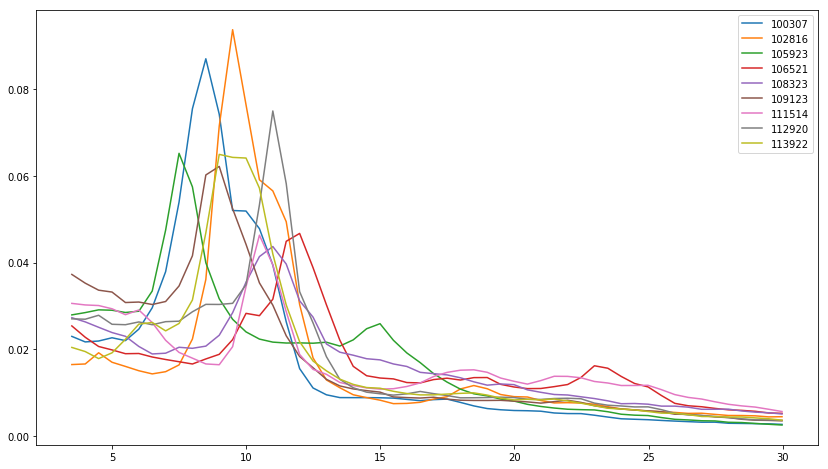

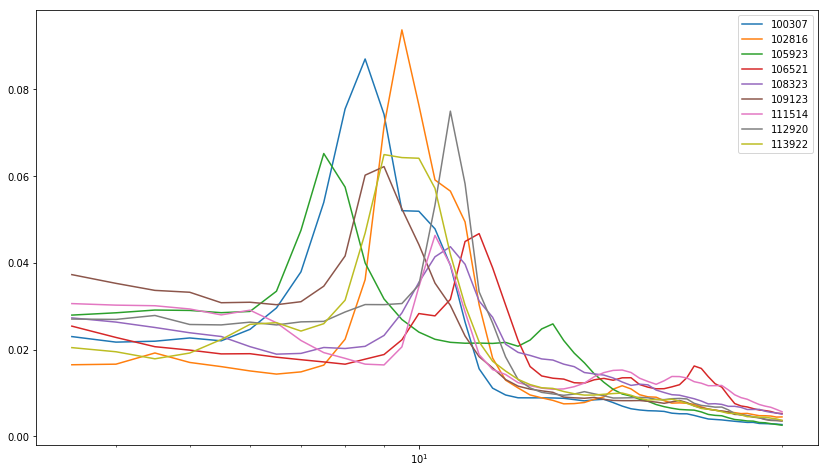

In [813]:
subs = np.loadtxt('../S95_MEG.txt').astype(int)

all_ps = {}

for sub in subs[:10]:
    
    
    #ls ../*powavg*.mat
    
    #
    #ls ../*powavg*.mat
    f = '../%s_MEG_3-Restin_powavg.mat' %sub
    if os.path.isfile(f):
        
        mat = loadmat('../%s_MEG_3-Restin_powavg.mat' %sub,
                      struct_as_record=False,squeeze_me=True)['freq']
        hcp_ps = pd.DataFrame(mat.powspctrm,columns=mat.freq,index=mat.label).T
        hcp_ps = hcp_ps.loc[3:45]
        hcp_ps_norm = hcp_ps / hcp_ps.sum(axis=0)
        all_ps[sub] = hcp_ps_norm
        
        

df_all_ps = pd.concat(all_ps,sort=False)

fig, ax = plt.subplots(figsize=(14,8))
df_all_ps.mean(axis=1).unstack().T.loc[:30].plot(ax=ax)

fig, ax = plt.subplots(figsize=(14,8))
df_all_ps.mean(axis=1).unstack().T.loc[:30].plot(ax=ax,logx=True)

CPU times: user 8.22 s, sys: 4 ms, total: 8.22 s
Wall time: 8.25 s


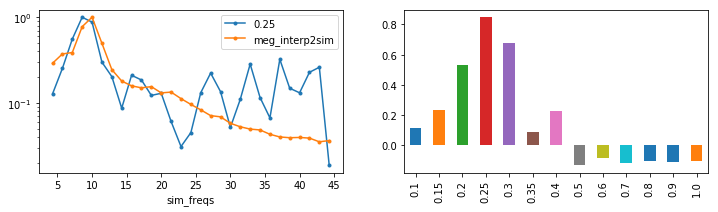

In [823]:


%%time
#_a_eis = [0.7,0.8,0.9,1.0,1.1]
a_thrtns = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
all_sims = {}
all_corrs = {}
all_sims_norm = {}
all_corrs_norm = {}
max_corrs = {}
max_corrs_norm = {}
noise_level = 0.01
T=1024*1

#### meg_dat = hcp_ps_norm.loc[3:45].mean(axis=1).values
#meg_freqs = hcp_ps_norm.loc[3:45].index.values

meg_dat = hcp_ps_norm.loc[2:46].mean(axis=1).values
meg_freqs = hcp_ps_norm.loc[2:46].index.values

for _a in a_thrtns:
    ssX_params = dict(I_o=0., # None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e=noise_level,D_i=noise_level,D_th=noise_level,D_rtn=noise_level,#D_e = .001,D_i= .001,D_th = 0.001,D_rtn = 0.001,
            T=T,#1024*1,#T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9,
            a_i = 0.9, 
            a_th=_a,#0.25, 
            a_rtn=_a,#0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False,
            welch_nperseg=700)#True) #False)

    #sim_res = run_net_sim(**ssX_params)
    #sim_dat = sim_res[2]['e'].loc[3:45].mean(axis=1).values
    #sim_freqs = sim_res[2]['e'].loc[3:45].index.values
    #thing = interp1d(meg_freqs,meg_dat)
    #meg_interp2sim = thing(sim_freqs)#df.index)
    #all_sims[_a] = pd.DataFrame([meg_dat,meg_interp2sim,sim_dat,sim_freqs],index=['meg_dat', 'interp_sim_dat', 'freqs']).T
    
    sim_res = run_net_sim(**ssX_params)
    sim_dat = sim_res[1]['e'].loc[4:45].mean(axis=1).values
    sim_freqs = sim_res[1]['e'].loc[4:45].index.values
    thing = interp1d(meg_freqs,meg_dat)
    meg_interp2sim = thing(sim_freqs)#df.index)
    all_sims[_a] = pd.DataFrame([meg_interp2sim,sim_dat,sim_freqs],index=['meg_interp2sim', 
                                                                      'sim_dat', 'sim_freqs']).T
    all_sims[_a].set_index('sim_freqs', inplace=True)
    
    
    #sim_dat_norm = sim_dat/sim_dat.sum()
    #meg_interp2sim_norm = meg_interp2sim/meg_interp2sim.sum()
    sim_dat_norm = sim_dat/sim_dat.max()
    meg_interp2sim_norm = meg_interp2sim/meg_interp2sim.max()
    
    cc = np.corrcoef(sim_dat,meg_interp2sim)[0,1]
    all_corrs[_a] = cc    
    df_all_corrs = pd.DataFrame(all_corrs.values(),index=all_corrs.keys())[0]
    max_corrs[_a] = df_all_corrs.loc[df_all_corrs.idxmax()]
    
    cc_norm = np.corrcoef(sim_dat_norm,meg_interp2sim_norm)[0,1]
    all_corrs_norm[_a] = cc_norm    
    df_all_corrs_norm = pd.DataFrame(all_corrs_norm.values(),index=all_corrs_norm.keys())[0]
    max_corrs_norm[_a] = df_all_corrs_norm.loc[df_all_corrs_norm.idxmax()]    
 
    
    

df_meg_interp2sim = pd.DataFrame(meg_interp2sim,index=sim_freqs)[0]
#df_meg_interp2sim_norm = df_meg_interp2sim = df_meg_interp2sim.sum()
df_meg_interp2sim_norm = df_meg_interp2sim = df_meg_interp2sim.max()

df_all_sim_dats = pd.concat(all_sims)['sim_dat'].unstack().T
df_all_sim_dats['meg_interp2sim'] = meg_interp2sim

#df_all_sim_dats_norm = df_all_sim_dats / df_all_sim_dats.sum()
df_all_sim_dats_norm = df_all_sim_dats / df_all_sim_dats.max()
df_all_sim_dats_norm['meg_interp2sim'] = meg_interp2sim_norm 

df_max_corrs = pd.DataFrame(max_corrs.values(),index=max_corrs.keys())[0]


maxcorridx = df_all_sim_dats_norm.corr().loc['meg_interp2sim'].drop('meg_interp2sim').idxmax()

fig, ax = plt.subplots(ncols=2, figsize=(12,3))

df_all_sim_dats_norm[[maxcorridx,'meg_interp2sim']].plot(logy=True,marker='.',ax=ax[0])
df_all_sim_dats_norm.corr().loc['meg_interp2sim'].drop('meg_interp2sim').plot(kind='bar',ax=ax[1])

In [ ]:
varyparams = {''}

In [869]:
a_thrtns

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:
a

In [870]:
from itertools import product

In [905]:
#aths = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6]#,0.7,0.8,0.9,1.0]
#artns = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6]#,0.7,0.8,0.9,1.0]
#combs = list(product(aths,artns))
#combsdicts = [{'a_th': i[0], 'a_rtn': i[1]} for i in combs]

a_thrtns = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
combs = list(product(a_thrtns))
combsdicts = [{'a_th': i[0], 'a_rtn': i[0]} for i in combs]


[(0.3,), (0.25,), (0.25,), (0.3,), (0.25,), (0.25,), (0.35,), (0.35,), (0.35,)]

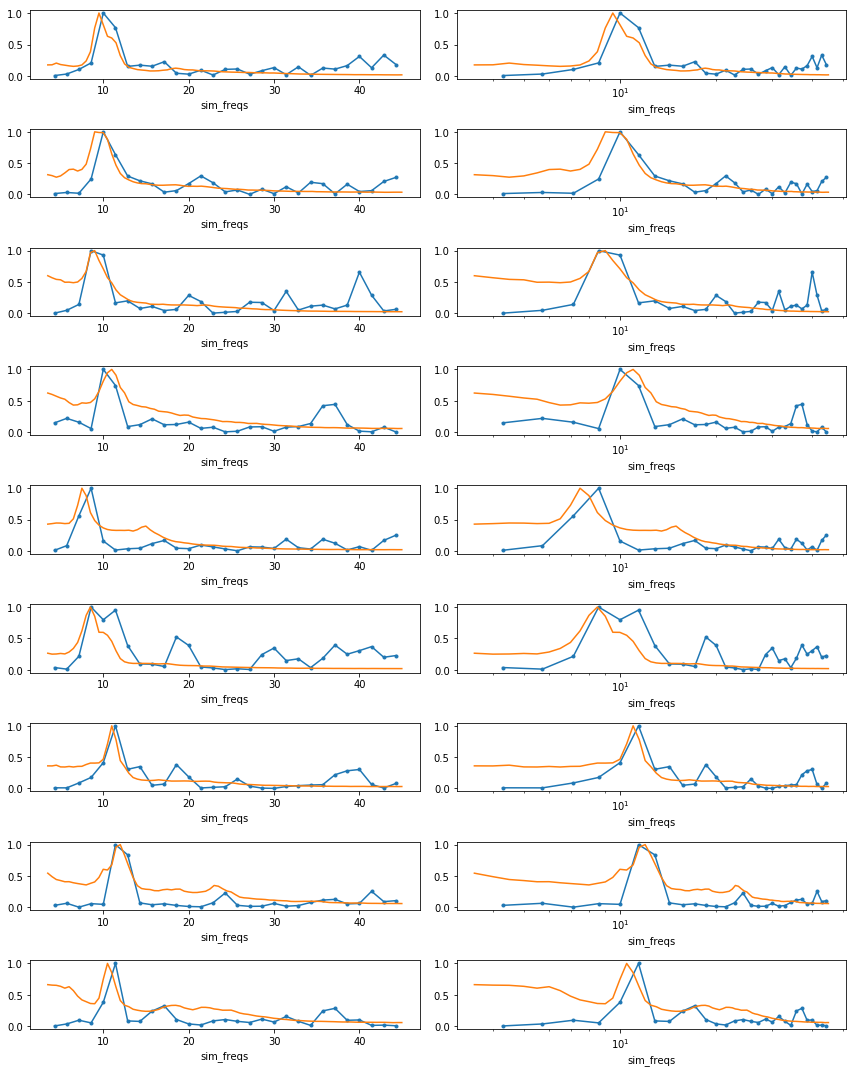

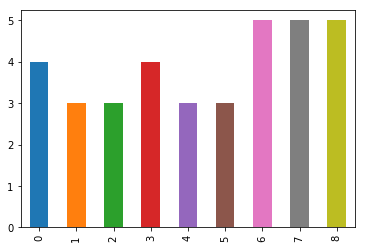

In [921]:
#%%time
#_a_eis = [0.7,0.8,0.9,1.0,1.1]
a_thrtns = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
all_sims = {}
all_corrs = {}
all_sims_norm = {}
all_corrs_norm = {}
max_corrs = {}
max_corrs_norm = {}
noise_level = 0.01
T=1024*1

#### meg_dat = hcp_ps_norm.loc[3:45].mean(axis=1).values
#meg_freqs = hcp_ps_norm.loc[3:45].index.values


meanps = df_all_ps.mean(axis=1).unstack().T
substodo = meanps.columns


all_fitcorrs = {}
all_fitdats = {}


for sub in substodo:
    
    meg_dat = meanps.loc[2:46][sub].values
    meg_freqs = meanps.loc[2:46].index.values
    #meg_dat = hcp_ps_norm.loc[2:46].mean(axis=1).values
    #meg_freqs = hcp_ps_norm.loc[2:46].index.values

    for c_it,c in enumerate(combsdicts):
        ssX_params = dict(I_o=0., # None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e=noise_level,D_i=noise_level,D_th=noise_level,D_rtn=noise_level,#D_e = .001,D_i= .001,D_th = 0.001,D_rtn = 0.001,
            T=T,#1024*1,#T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9,
            a_i = 0.9, 
            a_th=0.25, 
            a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False,
            welch_nperseg=700)#True) #False)

        for k,v in c.items(): ssX_params[k] = v
        #sim_res = run_net_sim(**ssX_params)
        #sim_dat = sim_res[2]['e'].loc[3:45].mean(axis=1).values
        #sim_freqs = sim_res[2]['e'].loc[3:45].index.values
        #thing = interp1d(meg_freqs,meg_dat)
        #meg_interp2sim = thing(sim_freqs)#df.index)
        #all_sims[_a] = pd.DataFrame([meg_dat,meg_interp2sim,sim_dat,sim_freqs],index=['meg_dat', 'interp_sim_dat', 'freqs']).T
    
        sim_res = run_net_sim(**ssX_params)
        sim_dat = sim_res[1]['e'].loc[4:45].mean(axis=1).values
        sim_freqs = sim_res[1]['e'].loc[4:45].index.values
        thing = interp1d(meg_freqs,meg_dat)
        meg_interp2sim = thing(sim_freqs)#df.index)
        all_sims[c_it] = pd.DataFrame([meg_interp2sim,sim_dat,sim_freqs],index=['meg_interp2sim', 
                                                                      'sim_dat', 'sim_freqs']).T
        all_sims[c_it].set_index('sim_freqs', inplace=True)
    
    
        #sim_dat_norm = sim_dat/sim_dat.sum()
        #meg_interp2sim_norm = meg_interp2sim/meg_interp2sim.sum()
        sim_dat_norm = sim_dat/sim_dat.max()
        meg_interp2sim_norm = meg_interp2sim/meg_interp2sim.max()
    
        cc = np.corrcoef(sim_dat,meg_interp2sim)[0,1]
        all_corrs[c_it] = cc    
        df_all_corrs = pd.DataFrame(all_corrs.values(),index=all_corrs.keys())[0]
        max_corrs[c_it] = df_all_corrs.loc[df_all_corrs.idxmax()]
    
        cc_norm = np.corrcoef(sim_dat_norm,meg_interp2sim_norm)[0,1]
        all_corrs_norm[c_it] = cc_norm    
        df_all_corrs_norm = pd.DataFrame(all_corrs_norm.values(),index=all_corrs_norm.keys())[0]
        max_corrs_norm[c_it] = df_all_corrs_norm.loc[df_all_corrs_norm.idxmax()]    
 
    
    

    df_meg_interp2sim = pd.DataFrame(meg_interp2sim,index=sim_freqs)[0]
    #df_meg_interp2sim_norm = df_meg_interp2sim = df_meg_interp2sim.sum()
    df_meg_interp2sim_norm = df_meg_interp2sim = df_meg_interp2sim.max()

    df_all_sim_dats = pd.concat(all_sims)['sim_dat'].unstack().T
    df_all_sim_dats['meg_interp2sim'] = meg_interp2sim

    #df_all_sim_dats_norm = df_all_sim_dats / df_all_sim_dats.sum()
    df_all_sim_dats_norm = df_all_sim_dats / df_all_sim_dats.max()
    df_all_sim_dats_norm['meg_interp2sim'] = meg_interp2sim_norm 

    df_max_corrs = pd.DataFrame(max_corrs.values(),index=max_corrs.keys())[0]


    maxcorridx = df_all_sim_dats_norm.corr().loc['meg_interp2sim'].drop('meg_interp2sim').idxmax()


    #fig, ax = plt.subplots(ncols=2, figsize=(12,3))

    #df_all_sim_dats_norm[[maxcorridx,'meg_interp2sim']].plot(logy=True,marker='.',ax=ax[0])
    #df_all_sim_dats_norm.corr().loc['meg_interp2sim'].drop('meg_interp2sim').plot(kind='bar',ax=ax[1])
    
    all_fitcorrs[sub] = df_max_corrs
    all_fitdats[sub] = df_all_sim_dats_norm

df_all_fitdats = pd.concat(all_fitdats)

bestfitcorrs = {s: df_all_fitdats.loc[s].corr().loc['meg_interp2sim'].drop('meg_interp2sim').idxmax() for s in substodo}
bestfitcorrvals = {s: df_all_fitdats.loc[s].corr().loc['meg_interp2sim'].drop('meg_interp2sim').max() for s in substodo}

meanps_norm = meanps/meanps.max()

fig, ax = plt.subplots(nrows=len(bestfitcorrs),ncols=2,figsize=(12,15))

for kv_it,(k,v) in enumerate(bestfitcorrs.items()):
    a = ax[kv_it,0]
    df_all_fitdats.loc[k][v].plot(ax=a,marker='.')
    meanps_norm[k].plot(ax=a)    
    
    a = ax[kv_it,1]
    df_all_fitdats.loc[k][v].plot(ax=a,marker='.',logx=True,logy=False)#True)
    meanps_norm[k].plot(ax=a,logx=True,logy=False)#True)
   
plt.tight_layout()


fig, ax  =plt.subplots()
pd.DataFrame(bestfitcorrs.values())[0].plot(kind='bar',ax=ax)

bestparam_vals = [combs[c] for c in bestfitcorrs.values()]
bestparam_vals

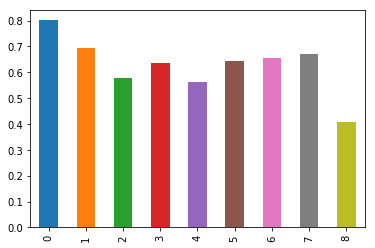

In [923]:
fig, ax = plt.subplots()
pd.DataFrame(bestfitcorrvals.values())[0].plot(kind='bar',ax=ax)

CPU times: user 57.1 s, sys: 1.08 s, total: 58.2 s
Wall time: 57 s


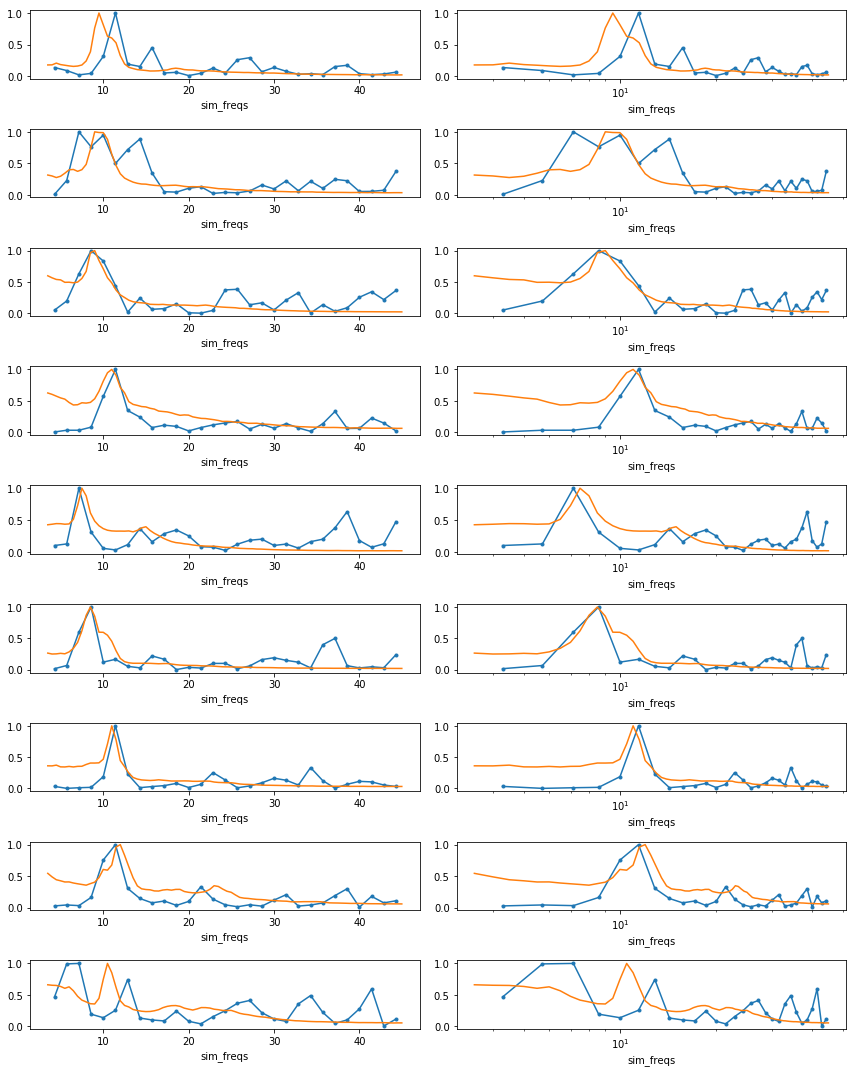

In [864]:
fig, ax = plt.subplots(nrows=len(bestfitcorrs),ncols=2,figsize=(12,15))

for kv_it,(k,v) in enumerate(bestfitcorrs.items()):
    a = ax[kv_it,0]
    df_all_fitdats.loc[k][v].plot(ax=a,marker='.')
    meanps_norm[k].plot(ax=a)    
    
    a = ax[kv_it,1]
    df_all_fitdats.loc[k][v].plot(ax=a,marker='.',logx=True,logy=False)#True)
    meanps_norm[k].plot(ax=a,logx=True,logy=False)#True)
   
plt.tight_layout()

In [ ]:
pd.DataFrame(bestfitcorrs.values())[0].plot(kind='bar')

pd.DataFrame(bestfitcorrvals.values())[0].plot(kind='bar')

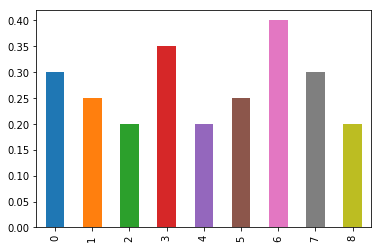

In [868]:
pd.DataFrame(bestfitcorrs.values())[0].plot(kind='bar')

In [ ]:
df_

In [893]:
bestfitcorrvals = {s: df_all_fitdats.loc[s].corr().loc['meg_interp2sim'].drop('meg_interp2sim').max() for s in substodo}


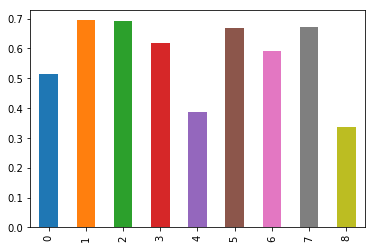

In [898]:
pd.DataFrame(bestfitcorrvals.values())[0].plot(kind='bar')

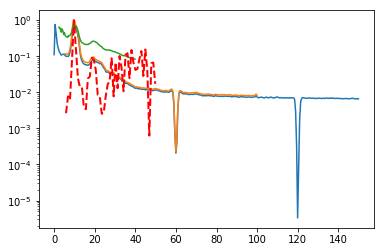

In [162]:
#dfa = (hcp_ps / hcp_ps.sum(axis=0)).mean(axis=1)
dfa = (hcp_ps / hcp_ps.max(axis=0)).mean(axis=1)
dfb = df2['meg_interp']


#psd_stuff[-4].T.loc[2:].plot(legend=False, alpha=0.5,logy=True,c='k', ax=ax,logx=False)
#dfc = psd_stuff[-4].T.loc[2:40] / psd_stuff[-4].T.loc[2:40].sum(axis=0)
dfc = psd_stuff[-4].T.loc[2:40] / psd_stuff[-4].T.loc[2:40].max(axis=0)
dfc = dfc.mean(axis=1)

fig, ax = plt.subplots()

dfa.plot(ax=ax,logy=True)
dfb.plot(ax=ax,logy=True)
dfc.plot(ax=ax,logy=True)


df2['sim2'].dropna().loc[:50].plot(ax=ax,c='r',linewidth=2.0,linestyle='--')#,logy=True)


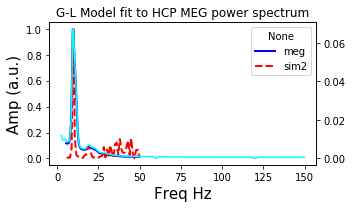

In [75]:
fig, ax = plt.subplots(figsize=(5,3))

df2 = df.copy()
df2['meg'] = df2['meg_interp']
#df2[[]'meg', 'sim'].dropna().plot(ax=ax,c='b',linewidth=2.0)#,logy=True)
df2['meg'].dropna().loc[:50].plot(ax=ax,c='b',linewidth=2.0)#,logy=True)
#df2['sim'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--',logy=True)
#df2['sim2'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--',logy=True)
df2['sim2'].dropna().loc[:50].plot(ax=ax,c='r',linewidth=2.0,linestyle='--')#,logy=True)

plt.legend()

ax.set_xlabel('Freq Hz', fontsize=15)
ax.set_ylabel('Amp (a.u.)',fontsize=15)
ax.set_title('G-L Model fit to HCP MEG power spectrum')



hcp_ps_norm.loc[2:].mean(axis=1).plot(ax=ax,c='cyan',secondary_y=True)


plt.tight_layout()

#plt.savefig('/home/jgriffiths/Downloads/gl_model_fit_to_HCP_MEG_power_spectrum_notrans.png', bbox_inches='tight',
#            dpi=600, transparent=False)

Manually and HCP computed power spectra overlap exactly...

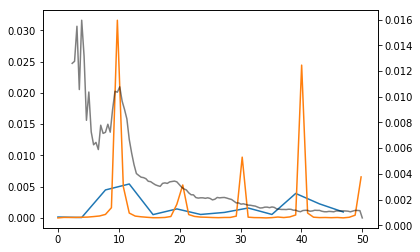

In [227]:
fig, ax = plt.subplots()

phaseplane_stuff[1]['e'][0].loc[:50].plot(ax=ax)
phaseplane_stuff[2]['e'][0].loc[:50].plot(ax=ax)

psd_stuff[-4].T.loc[2:].mean(axis=1).plot(legend=False, alpha=0.5,logy=False,c='k', ax=ax,logx=False,secondary_y=True)


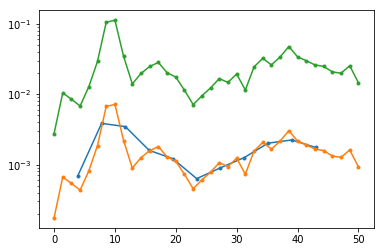

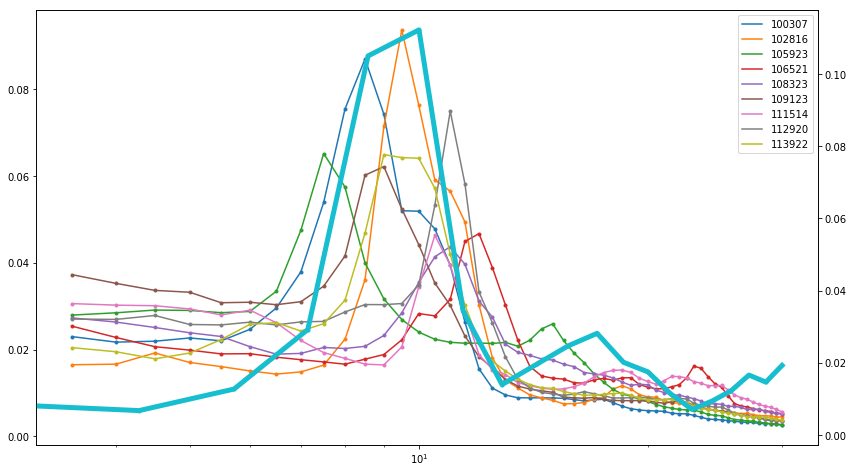

In [401]:
theseparams = deepcopy(orig_ssX_params)
theseparams['D_e'] = 0.01
theseparams['D_i'] = 0.01
theseparams['D_rtn'] = 0.01
theseparams['D_th'] = 0.01
theseparams['I_o'] = 0.
#theseparams['Dt'] = 0.001
theseparams['T'] = 1024*5
sim_res = run_net_sim(**theseparams)
srps_norm = sim_res[1]['e'][0].loc[3:45].copy()
srps_norm.plot(marker='.')
fs= 1./0.001
freqs,amps = welch(sim_res[0]['e'][0],fs=fs,nperseg=700)
df_af = pd.DataFrame(amps,index=freqs)[0]
df_af.loc[:50].plot(marker='.')
df_af_norm = df_af/df_af.sum()
df_af_norm.loc[:50].plot(marker='.',logy=True)


fig, ax = plt.subplots(figsize=(14,8))
df_all_ps.mean(axis=1).unstack().T.loc[:30].plot(ax=ax,logx=True,marker='.')
df_af_norm.loc[:30].plot(ax=ax,secondary_y=True,logx=True,marker='.',linewidth=5)

In [402]:
df_af_norm

0.000000      0.002734
1.428571      0.010408
2.857143      0.008473
4.285714      0.006785
5.714286      0.012756
7.142857      0.029241
8.571429      0.105017
10.000000     0.112228
11.428571     0.034407
12.857143     0.013991
14.285714     0.019651
15.714286     0.024740
17.142857     0.028180
18.571429     0.020152
20.000000     0.017494
21.428571     0.011379
22.857143     0.007106
24.285714     0.009454
25.714286     0.012264
27.142857     0.016626
28.571429     0.014674
30.000000     0.019298
31.428571     0.011444
32.857143     0.024397
34.285714     0.032297
35.714286     0.026022
37.142857     0.033786
38.571429     0.047477
40.000000     0.033950
41.428571     0.029888
                ...   
458.571429    0.000006
460.000000    0.000004
461.428571    0.000003
462.857143    0.000006
464.285714    0.000008
465.714286    0.000006
467.142857    0.000005
468.571429    0.000005
470.000000    0.000003
471.428571    0.000004
472.857143    0.000005
474.285714    0.000006
475.714286 

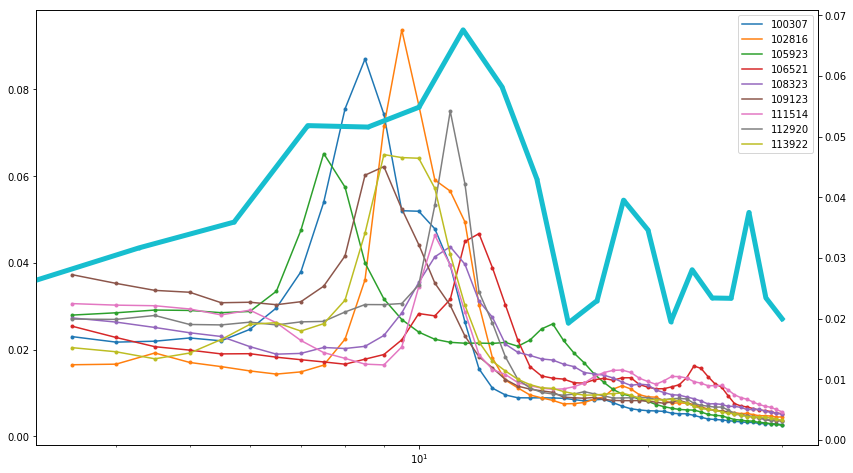

In [399]:
fig, ax = plt.subplots(figsize=(14,8))
df_all_ps.mean(axis=1).unstack().T.loc[:30].plot(ax=ax,logx=True,marker='.')
df_af_norm.loc[:30].plot(ax=ax,secondary_y=True,logx=True,marker='.',linewidth=5)

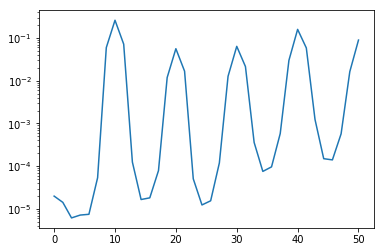

In [382]:
df_af_norm.loc[:50].plot(logy=True)

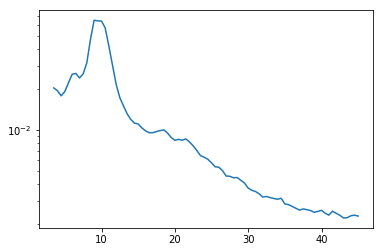

In [260]:
hcp_ps_norm.mean(axis=1).plot(logy=True)

In [242]:
hcp_ps_norm = hcp_ps / hcp_ps.mean(axis=0)

In [243]:
hcp_ps_norm

A22       A104       A241       A138       A214        A71  \
0.000000     5.165424   2.465011   6.935188   3.171817   4.904047   3.021158   
0.499634    27.102995  16.109164  42.063287  17.427494  25.698707  19.484673   
0.999268    14.679373  10.197740  20.664740  11.078420  14.713234  13.336885   
1.498902     8.290799   6.114286   8.509524   7.553500   7.635775   6.642555   
1.998536     6.088007   4.475783   5.397325   5.038836   5.269955   3.796199   
2.498171     4.918773   3.490800   3.490493   4.175107   4.328161   3.306165   
2.997805     4.774538   3.184727   2.773896   3.370868   3.544507   3.144127   
3.497439     4.944005   2.727235   2.742772   3.186004   2.840461   2.910801   
3.997073     4.256171   2.489263   2.598767   3.227802   2.636100   3.003585   
4.496707     4.109839   2.234153   2.826672   3.066883   2.642015   2.637210   
4.996341     4.296917   2.402344   3.117027   3.193083   2.700772   2.805007   
5.495975     5.389710   2.517482   3.748284   3.513552   2.985926   3.018067   
5.995609     6.749082   3.017009   4.102684   4.617524   3.350900   3.640797   
6.495243     4.856465   4.266389   4.952988   5.566437   3.243922   4.206456   
6.994878     4.917117   4.537566   3.911607   5.530591   3.331387   4.248576   
7.494512     4.982809   5.178119   3.925617   6.208531   4.778959   5.212976   
7.994146     4.939041   7.892272   4.800935   9.731663   5.328756   6.610245   
8.493780     5.103223  13.992661   7.439325  15.828884   6.696774  12.469872   
8.993414     5.133639  21.900334   9.553771  19.040369   9.549950  20.072905   
9.493048     4.422615  24.299386   8.519493  17.756308  12.297756  20.002269   
9.992682     4.900101  27.532933   9.054954  16.023268  12.227387  25.087220   
10.492316    4.758983  21.701439   7.002233  12.844761   8.743729  23.272073   
10.991950    4.684749  12.514282   5.136944  10.008716   6.175128  13.424450   
11.491585    4.062487   9.212087   3.747262   7.221301   4.162974   7.385051   
11.991219    2.903822   6.162582   3.463716   5.441246   3.165754   4.775931   
12.490853    2.231295   4.193318   2.554318   4.328334   2.846011   3.137154   
12.990487    2.126220   3.599981   1.935400   3.448279   2.304786   2.570698   
13.490121    2.123296   3.217873   1.806196   3.243683   1.917705   2.525812   
13.989755    2.472934   2.429551   1.608349   2.719010   1.934101   2.013313   
14.489389    2.178583   2.120085   1.469552   2.572841   1.873137   1.873430   
...               ...        ...        ...        ...        ...        ...   
135.400844   0.279906   0.076031   0.303407   0.117996   0.377134   0.133043   
135.900478   0.300276   0.080170   0.293216   0.110423   0.381808   0.141036   
136.400112   0.307342   0.083354   0.305660   0.112846   0.373468   0.115624   
136.899746   0.300224   0.073765   0.291559   0.117917   0.401946   0.123805   
137.399380   0.240931   0.084268   0.284311   0.139365   0.370013   0.143735   
137.899015   0.252659   0.085720   0.321366   0.140398   0.416524   0.147880   
138.398649   0.266307   0.079802   0.319493   0.127306   0.423981   0.135804   
138.898283   0.292660   0.080734   0.345914   0.103174   0.418004   0.118807   
139.397917   0.293424   0.076314   0.333744   0.111003   0.395852   0.107602   
139.897551   0.258388   0.073510   0.318273   0.117808   0.362416   0.118524   
140.397185   0.258025   0.082342   0.331505   0.119661   0.374021   0.128031   
140.896819   0.279648   0.097008   0.382596   0.134787   0.395181   0.125918   
141.396453   0.252570   0.098579   0.326138   0.134219   0.385361   0.114562   
141.896087   0.214464   0.096831   0.313730   0.140747   0.431097   0.105660   
142.395722   0.233724   0.087563   0.339313   0.134303   0.369537   0.117184   
142.895356   0.264564   0.083017   0.406217   0.129624   0.361620   0.127541   
143.394990   0.261301   0.081401   0.361851   0.137178   0.400597   0.129087   
143.894624   0.234231   0.086800   0.331966   0.124358   0.408418   0.121607   
144.394258   0.213

In [235]:
all_ps.values()[0]

A22          A104          A241          A138  \
0.000000    3.496739e-28  4.898813e-28  8.699078e-28  7.248567e-28   
0.499634    2.484595e-27  2.640978e-27  4.101714e-27  3.651947e-27   
0.999268    1.351612e-27  1.254073e-27  1.614357e-27  1.595106e-27   
1.498902    7.430224e-28  6.013695e-28  6.392792e-28  7.159145e-28   
1.998536    4.851685e-28  4.239011e-28  4.297653e-28  4.941401e-28   
2.498171    4.258083e-28  3.424498e-28  2.945660e-28  3.713924e-28   
2.997805    3.773117e-28  2.648698e-28  2.015056e-28  2.947198e-28   
3.497439    3.375115e-28  2.274591e-28  1.655985e-28  2.612439e-28   
3.997073    3.768684e-28  2.715759e-28  1.726634e-28  2.890931e-28   
4.496707    3.903359e-28  2.681932e-28  1.917462e-28  2.699885e-28   
4.996341    4.157797e-28  2.731163e-28  1.590803e-28  2.670192e-28   
5.495975    4.381469e-28  2.623660e-28  1.494139e-28  2.570773e-28   
5.995609    4.930360e-28  2.619167e-28  1.342555e-28  2.678513e-28   
6.495243    4.287642e-28  2.660957e-28  1.279686e-28  2.457068e-28   
6.994878    4.008095e-28  2.741459e-28  1.452197e-28  2.658532e-28   
7.494512    3.925699e-28  3.409713e-28  1.784188e-28  3.145915e-28   
7.994146    4.675285e-28  5.599703e-28  2.463446e-28  5.063769e-28   
8.493780    6.004988e-28  9.210525e-28  3.532669e-28  8.914313e-28   
8.993414    1.104153e-27  2.007961e-27  7.746990e-28  1.705125e-27   
9.493048    1.561840e-27  2.462111e-27  1.128215e-27  1.969780e-27   
9.992682    1.337841e-27  1.724044e-27  9.796640e-28  1.829778e-27   
10.492316   9.348879e-28  1.320859e-27  7.430312e-28  1.480509e-27   
10.991950   8.581929e-28  1.276968e-27  6.190237e-28  1.230898e-27   
11.491585   7.437768e-28  1.084008e-27  4.971923e-28  1.150424e-27   
11.991219   3.983147e-28  8.217928e-28  3.531020e-28  8.691939e-28   
12.490853   2.753070e-28  4.826209e-28  2.132145e-28  4.800402e-28   
12.990487   1.870602e-28  2.842725e-28  1.545273e-28  3.198288e-28   
13.490121   1.587403e-28  2.570069e-28  1.344310e-28  2.636718e-28   
13.989755   1.511486e-28  2.441865e-28  1.196021e-28  2.498908e-28   
14.489389   1.639899e-28  2.531767e-28  1.128231e-28  2.380691e-28   
...                  ...           ...           ...           ...   
135.400844  2.834677e-29  1.265926e-29  2.338029e-29  1.765515e-29   
135.900478  2.670292e-29  1.211223e-29  2.230946e-29  2.105981e-29   
136.400112  2.471699e-29  1.419576e-29  2.352489e-29  1.935039e-29   
136.899746  2.759418e-29  1.530832e-29  2.463147e-29  1.752243e-29   
137.399380  2.609881e-29  1.438306e-29  2.425204e-29  1.842658e-29   
137.899015  3.138606e-29  1.339992e-29  2.293793e-29  1.918901e-29   
138.398649  3.103820e-29  1.334772e-29  2.492497e-29  1.840152e-29   
138.898283  3.166717e-29  1.327074e-29  2.907614e-29  1.826121e-29   
139.397917  3.126624e-29  1.357463e-29  2.577883e-29  1.737385e-29   
139.897551  3.054685e-29  1.335719e-29  2.287047e-29  1.900754e-29   
140.397185  3.066795e-29  1.274368e-29  2.536911e-29  2.110159e-29   
140.896819  2.997662e-29  1.081244e-29  2.356133e-29  1.945511e-29   
141.396453  2.788837e-29  1.314954e-29  2.335142e-29  1.839587e-29   
141.896087  2.577524e-29  1.476918e-29  2.522132e-29  1.967098e-29   
142.395722  2.926675e-29  1.367987e-29  2.546786e-29  1.788508e-29   
142.895356  2.575526e-29  1.517932e-29  2.555028e-29  1.771609e-29   
143.394990  2.640005e-29  1.616980e-29  2.375033e-29  1.953469e-29   
143.894624  2.849641e-29  1.469937e-29  2.434059e-29  1.884853e-29   
144.394258  3.278146e-29  1.214449e-29  2.641541e-29  2.051369e-29   
144.893892  2.852937e-29  1.138611e-29  2.600943e-29  1.880827e-29   
145.393526  3.255076e-29  1.289546e-29  2.444841e-29  2.222314e-29   
145.893160  3.049692e-29  1.400362e-29  2.408157e-29  2.344177e-29   
146.392794  3.085424e-29  1.315145e-29  2.516675e-29  2.007113e-29   
146.892429  3.015723e-29  1.299706e-29  2.252240e-29  2.011967e-29   
147.392063  2.707577e-29  1.198947e-29  2.537773e-29  2.032324e-29   
147.891697  2.900224e-29  1.218

In [ ]:
for mat = loadmat('../680957_MEG_3-Restin_powavg.mat',struct_as_record=False,squeeze_me=True)['freq']
hcp_ps = pd.DataFrame(mat.powspctrm,columns=mat.freq,index=mat.label).T


## Graveyard

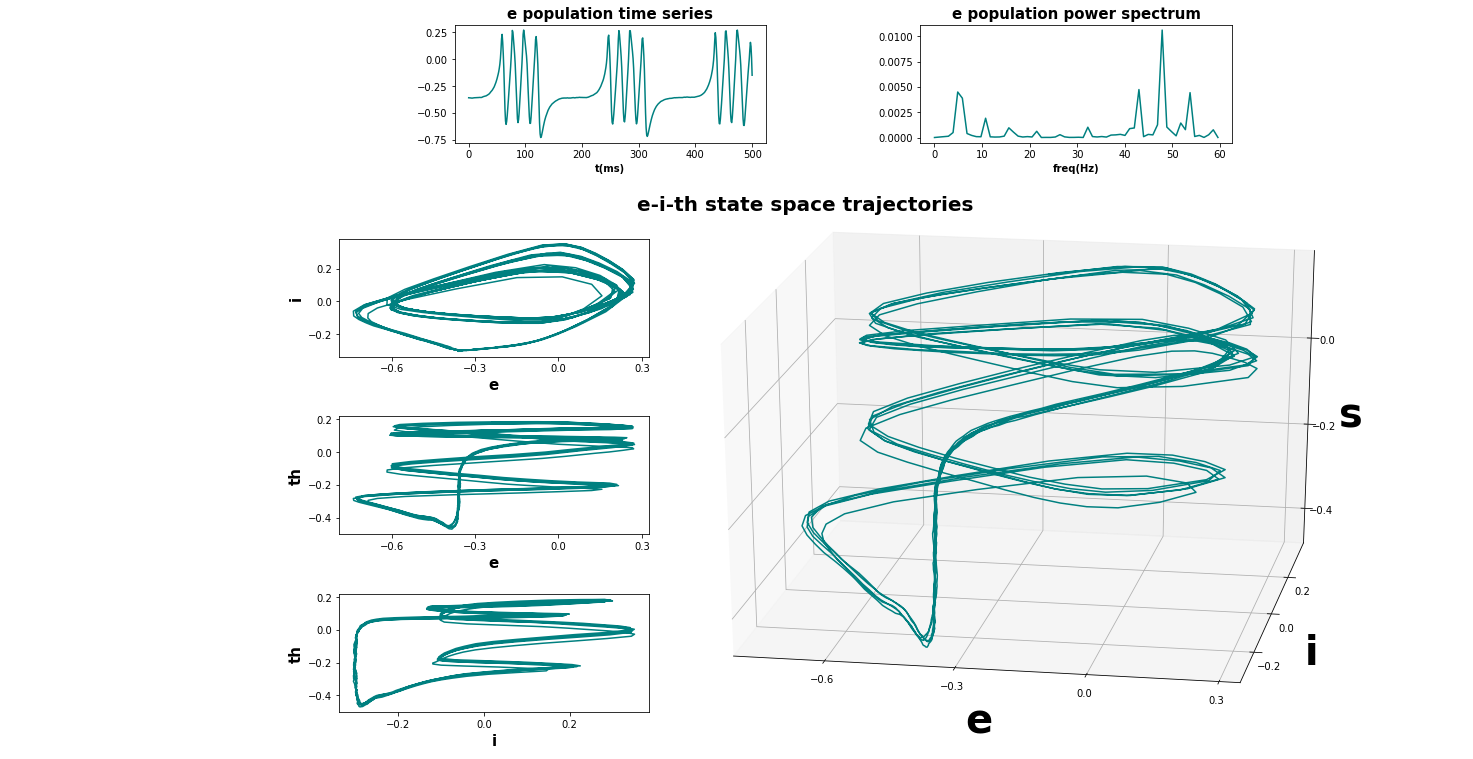

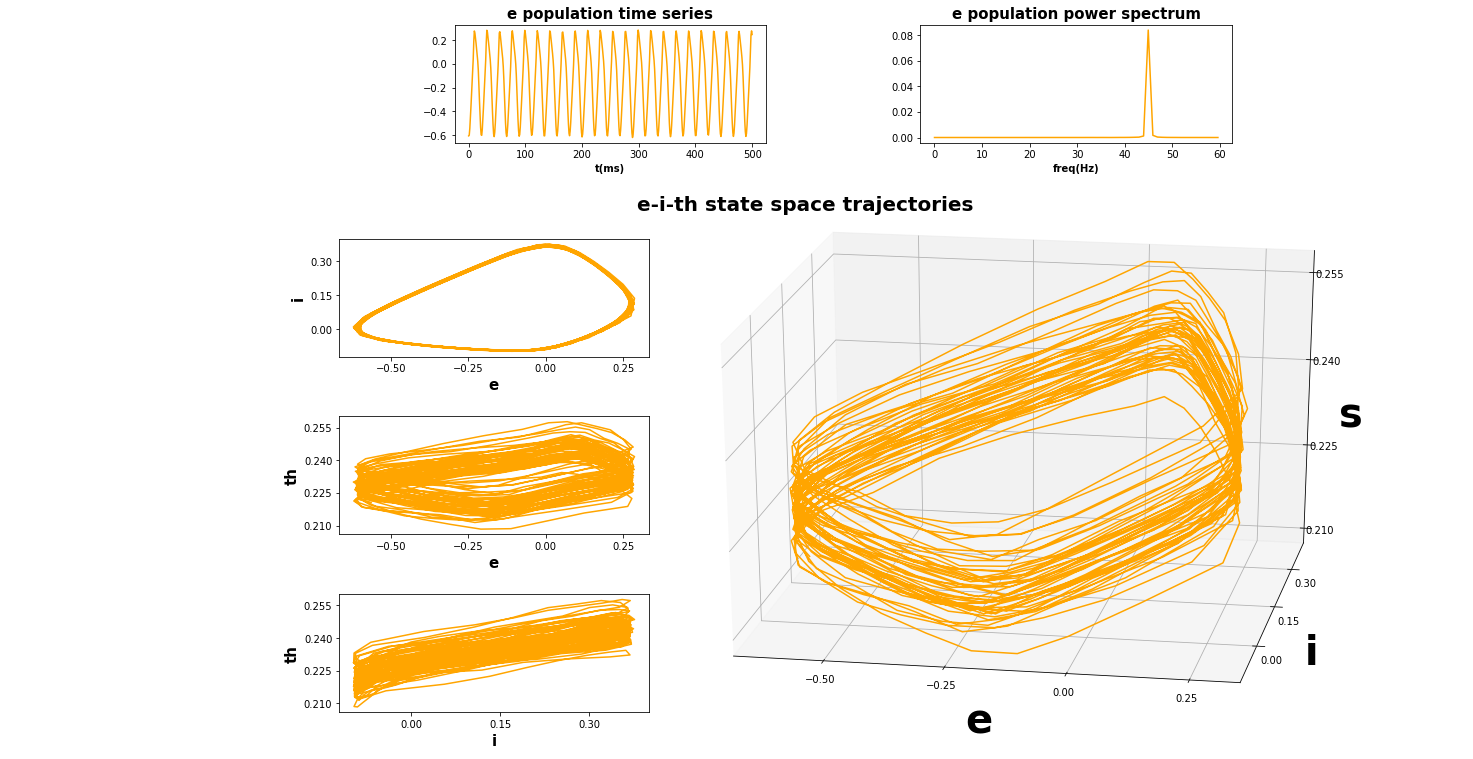

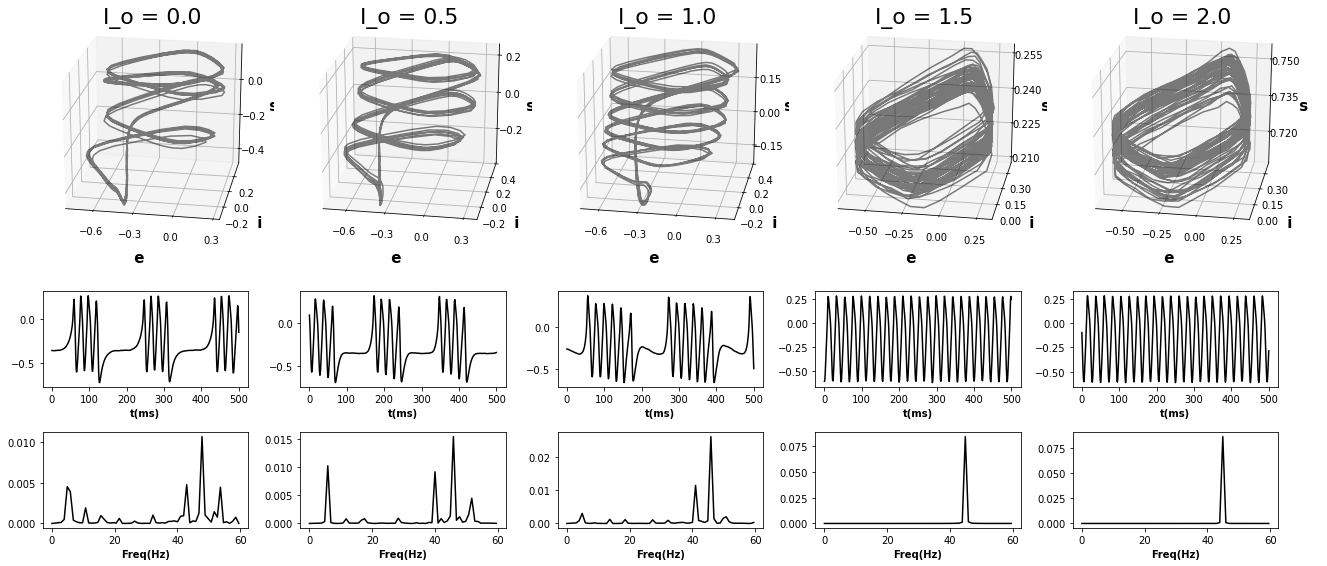

In [529]:
_a = 0.1
T = 1024
ssX_params = dict(I_o=None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th = _a, a_rtn= _a, # a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

run_and_make_figs(ssX_params)

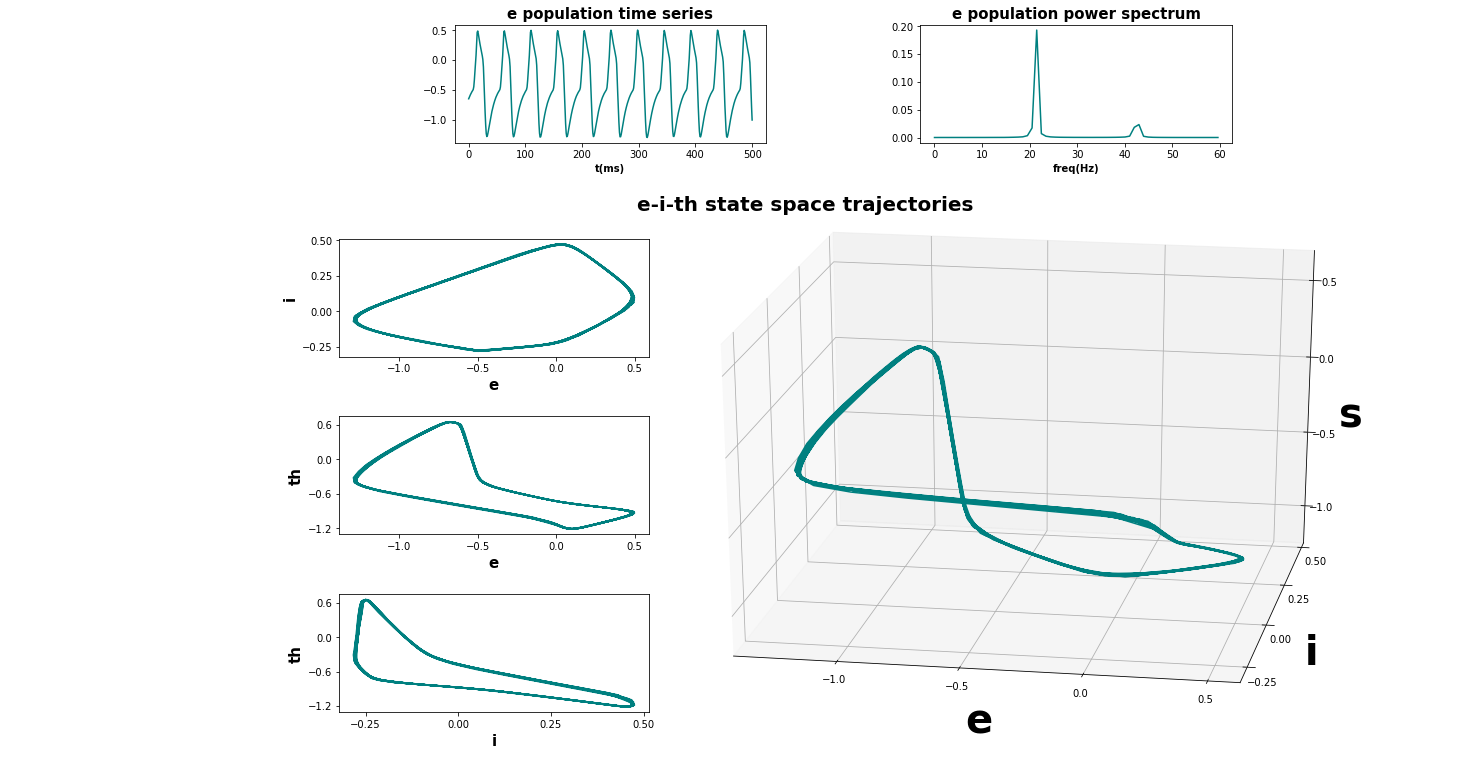

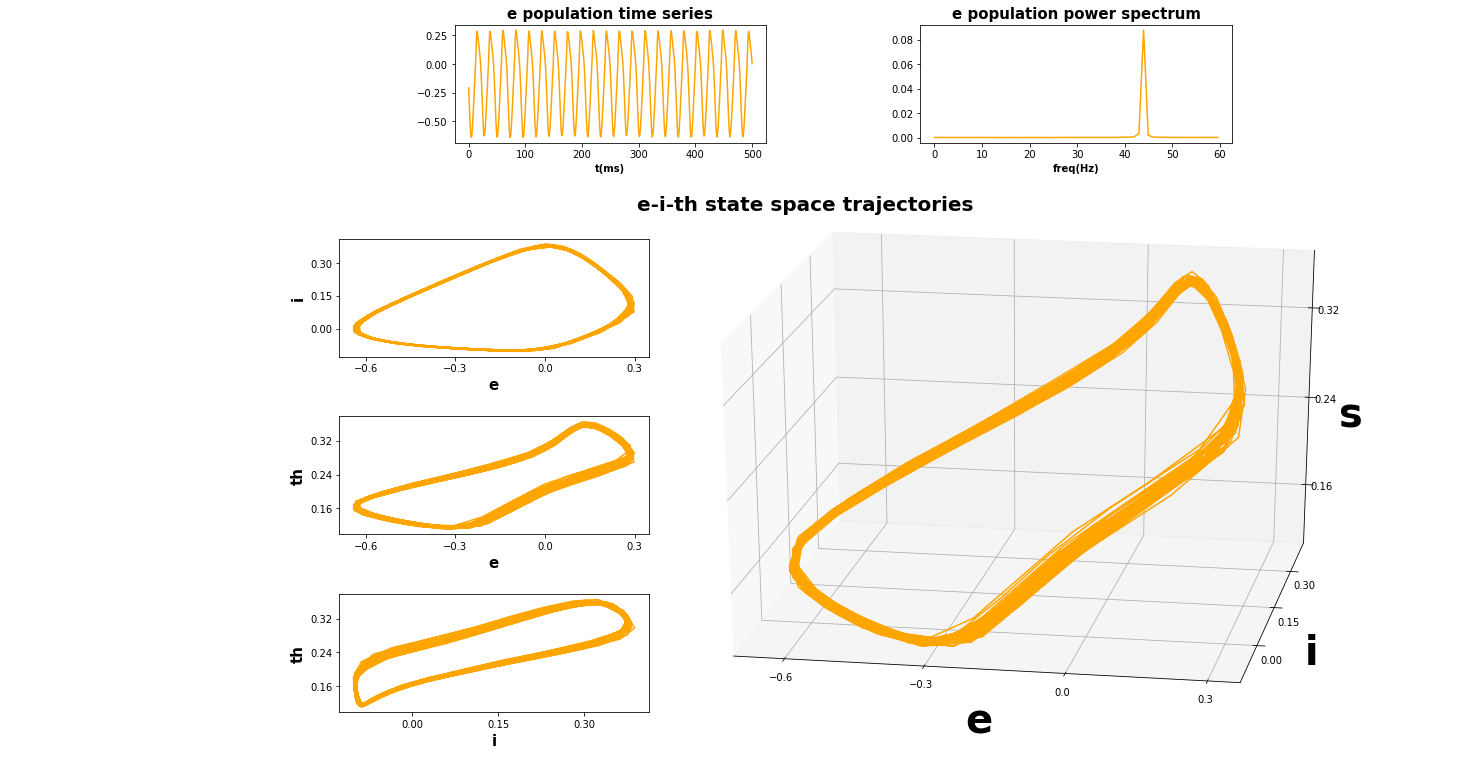

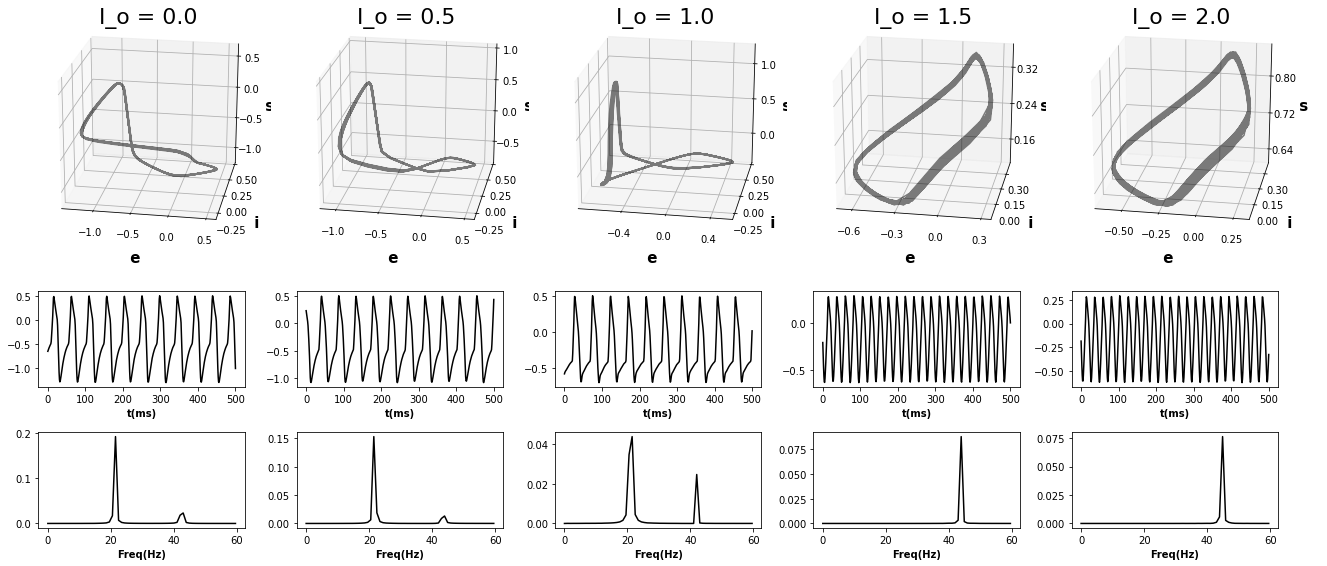

In [530]:
_a = 0.9
T = 1024
ssX_params = dict(I_o=None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th = _a, a_rtn= _a, # a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

run_and_make_figs(ssX_params)

Better phase planes figure?

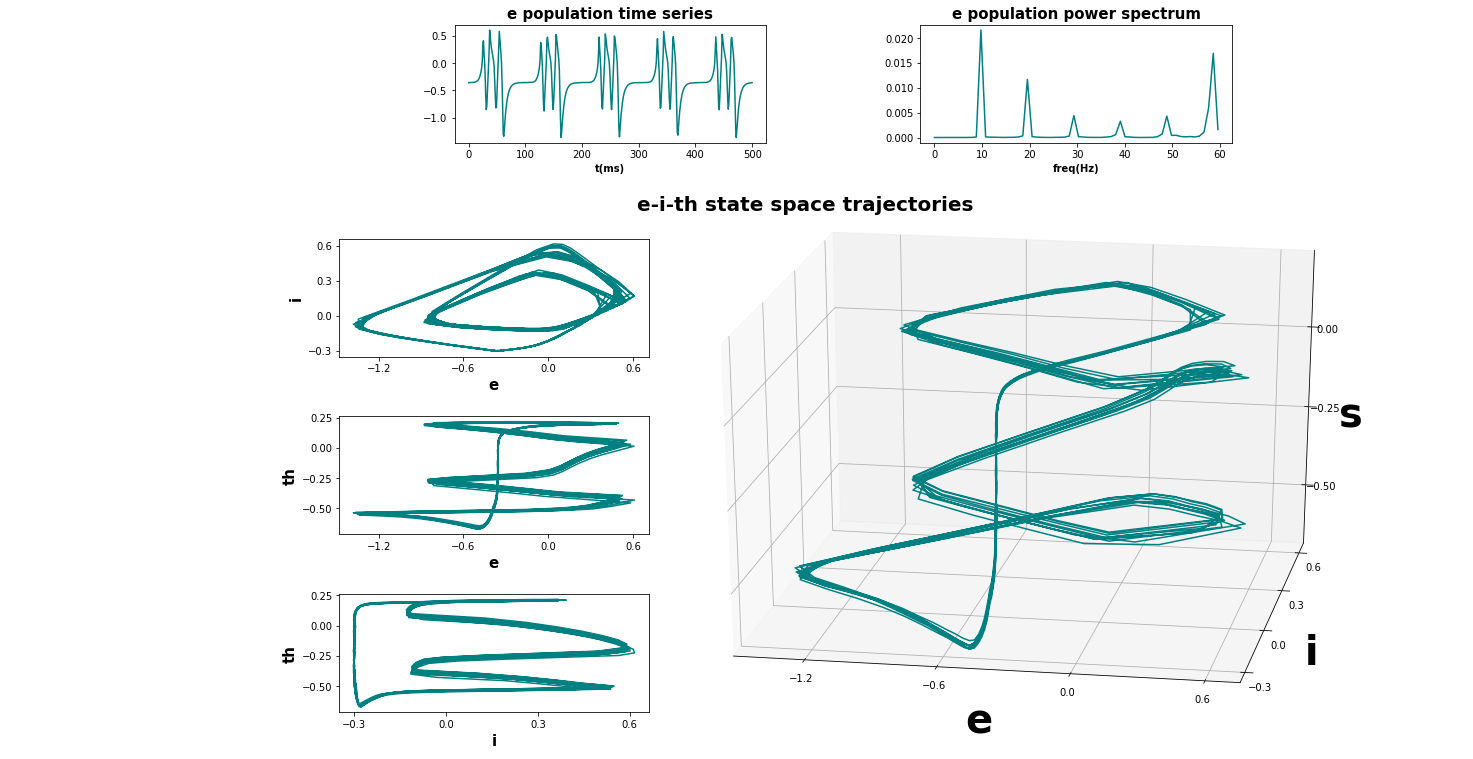

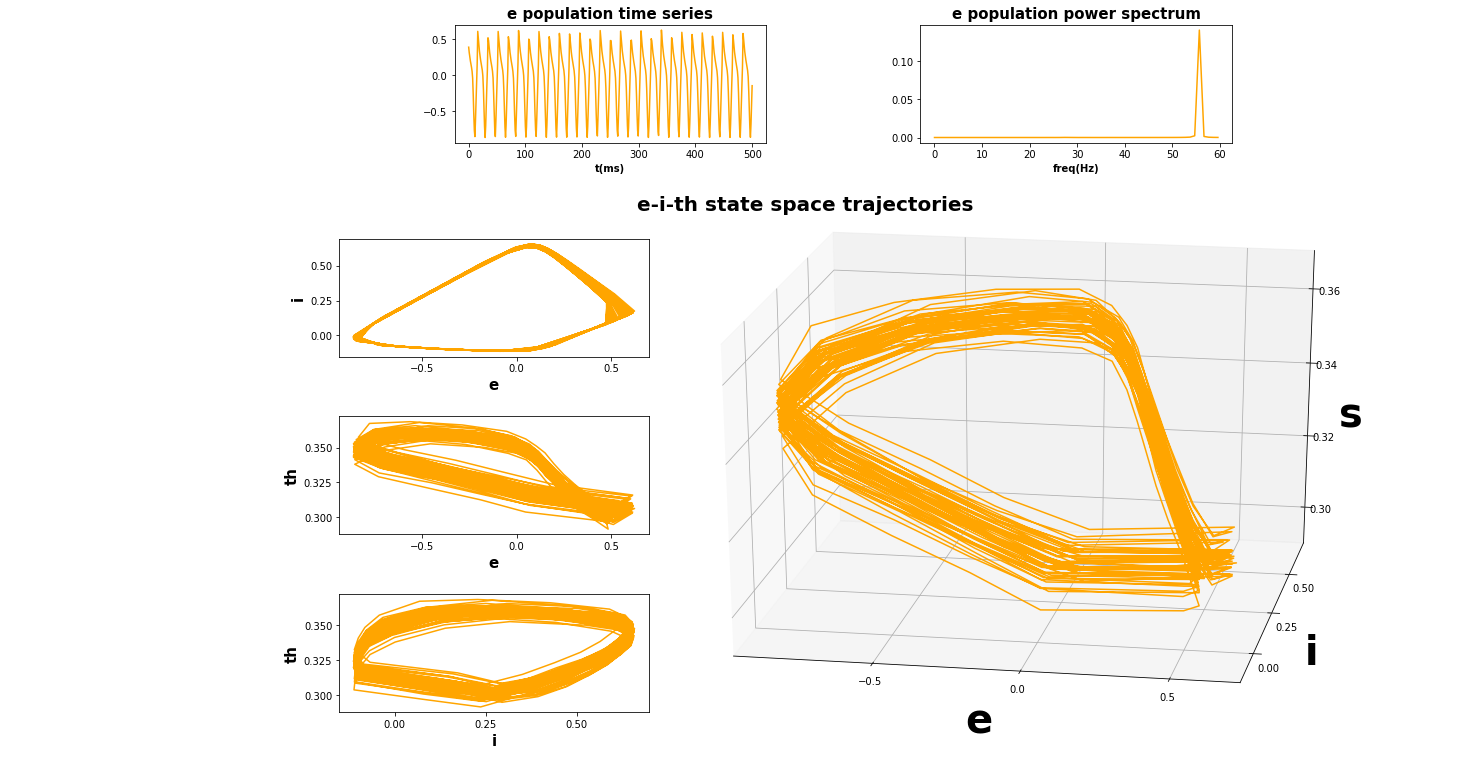

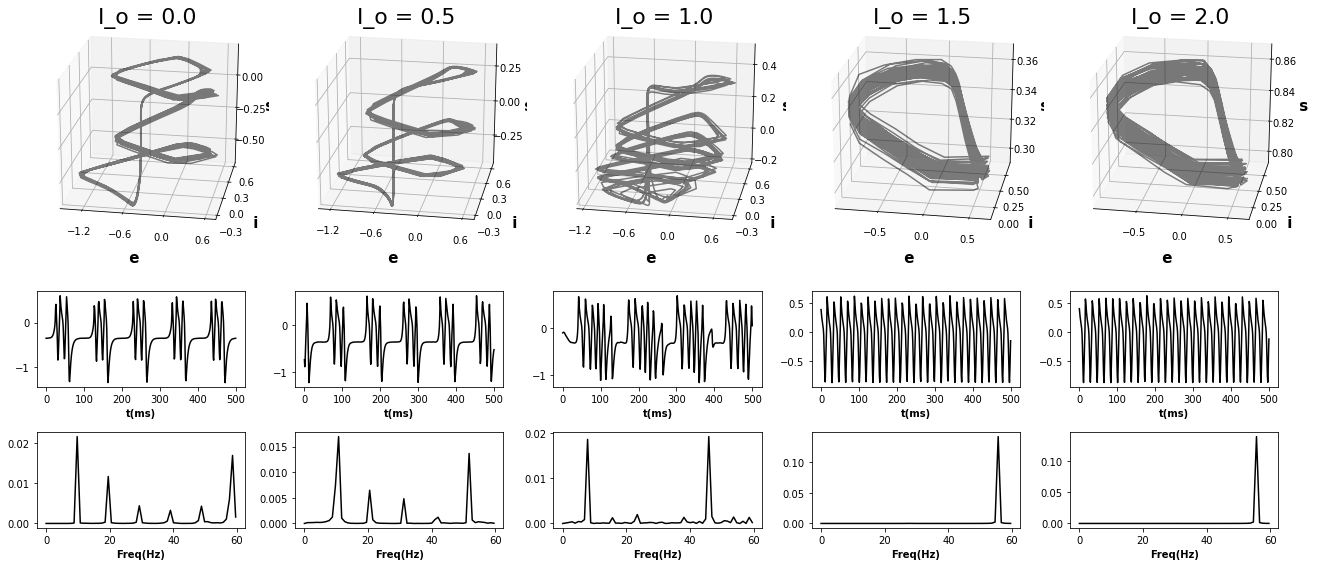

In [204]:
ssX_params = dict(I_o=None,
             wee = 1.7,#1.4,#1.4,
                  wei = 1.4,
                  wie = -3.,# -3., # 2.,#-3., 
                  wii = -0.5, # -1.5,#-0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e=1.95,#0.9,#a_e = 0.9,
            a_i=1.95,#0.9,# = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

run_and_make_figs(ssX_params)

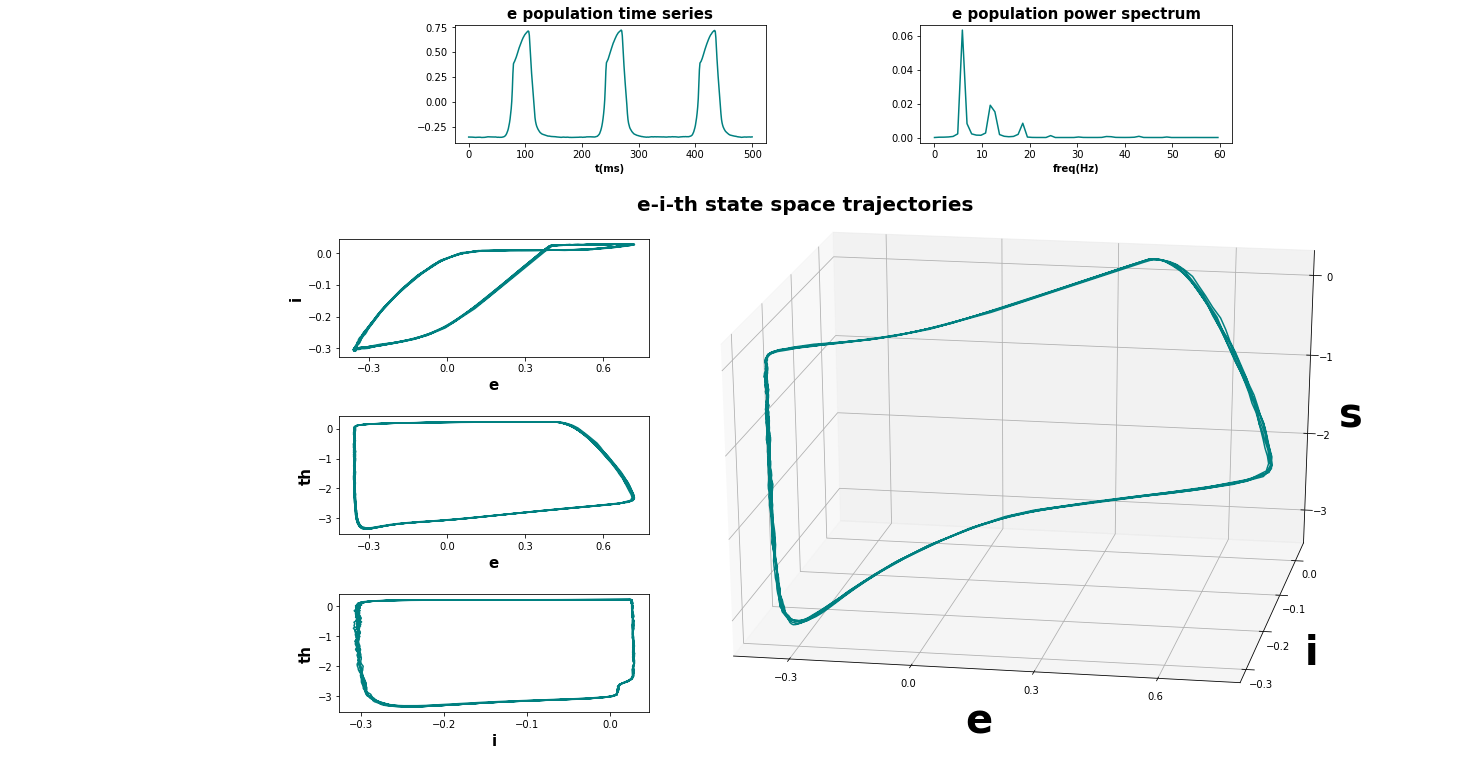

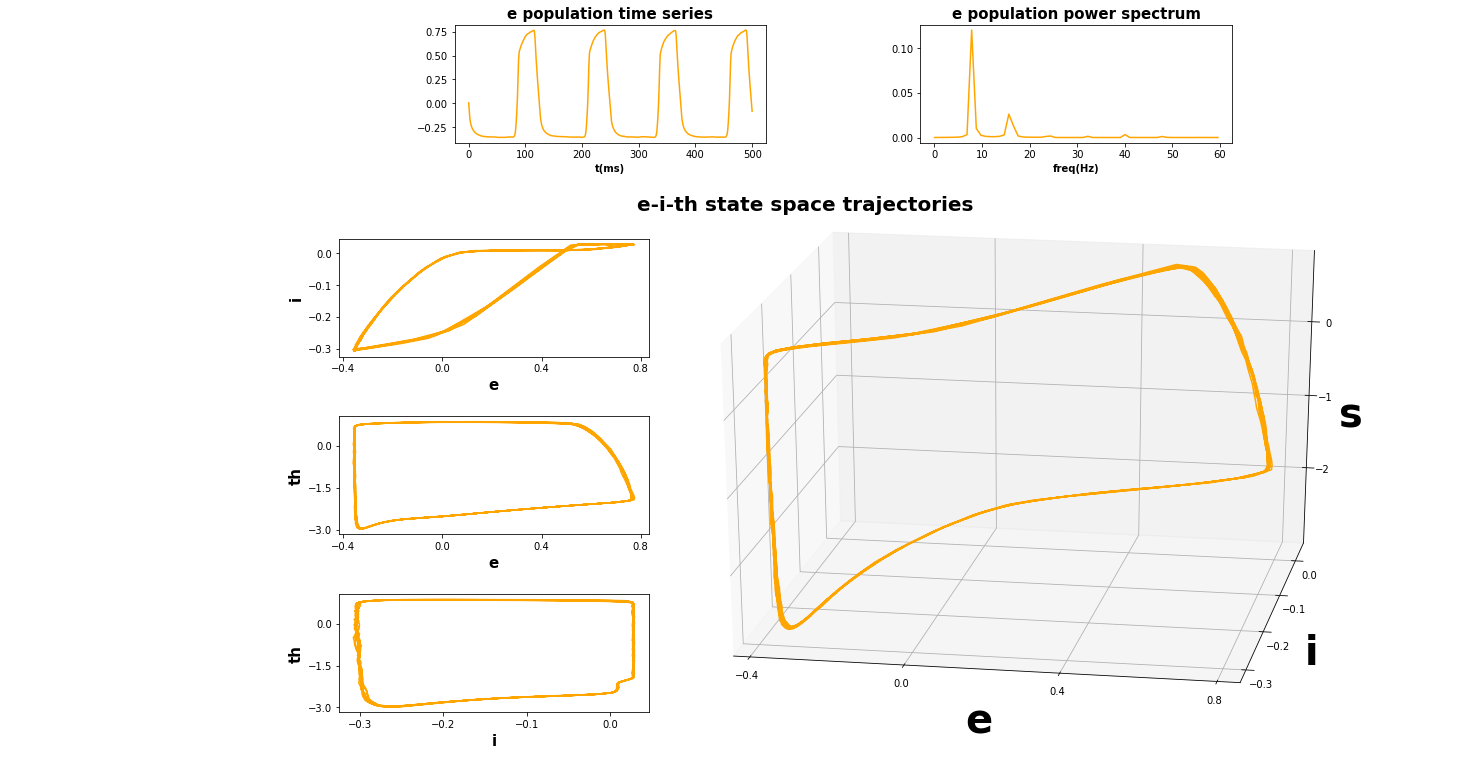

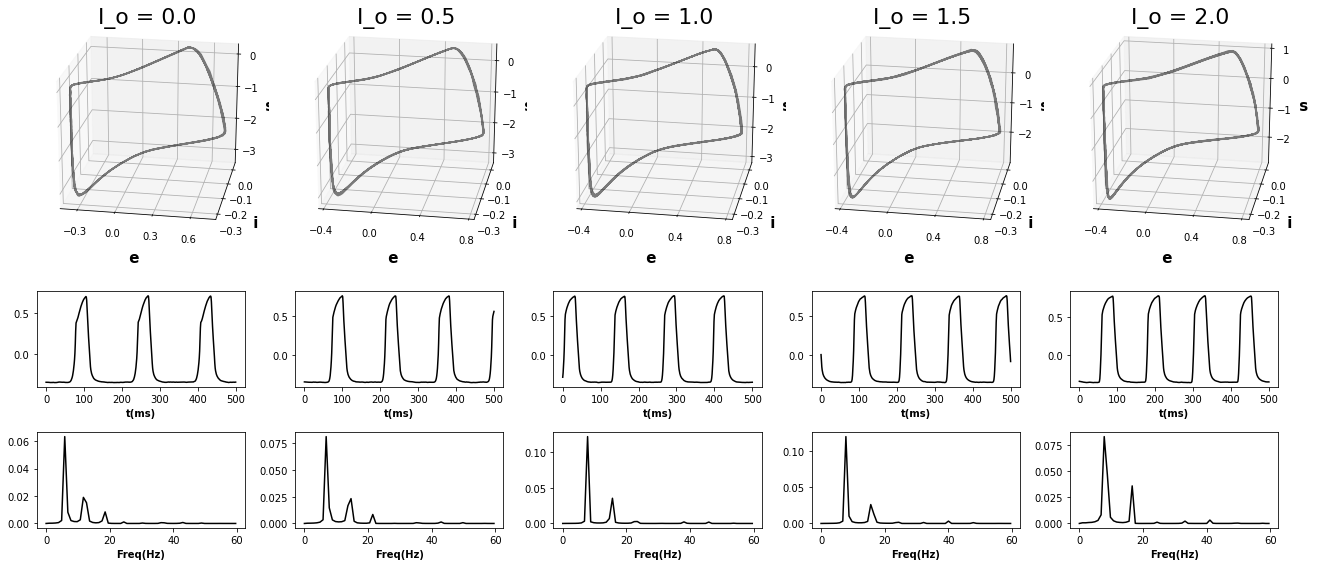

In [178]:
ssX_params = dict(I_o=None,
            wee=1.4, # 1.4, # 3.0, #  wee = 1.4,
            wei =1.4, #  1.4,
            wie = -3., 
            wii = -2., # wie = -2.,wii = -0.5,
            wertn = 0.6,# 0.3,#0.6,
            weth = 0.1,#.1, # .6,
            wthi = 0.2, # 0.2,
            wthe = 1.65,
            wrtnth = -7.,#-3.,#  -2.,
            wthrtn = 2., # 2., #  2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

run_and_make_figs(ssX_params)

In [35]:
# %load /hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/test2/rest.py
"""
========================================
Compute inverse solution for rest data
========================================

John Griffiths

Based on 

[ link] 

by Denis A. Engemann, Luke Bloy, Eric Larson 
"""


"""
Setup
"""

# Importage
# ---------

# Generic stuff
import os,sys,glob,numpy as np,pandas as pd
import os.path as op

# Neuroimaging stuff
import nibabel as nib
from nilearn.plotting import plot_surf_stat_map
import mne
from mne.filter import next_fast_len
from mne.connectivity import spectral_connectivity
import hcp
from hcp import preprocessing as preproc

from mne.time_frequency import psd_welch
from scipy.signal import welch
from mne.time_frequency import psd_multitaper,psd_welch


# Viz stuff
#from matplotlib import pyplot as plt
#import seaborn as sns


# Define some variables
# ---------------------

storage_dir = '/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Data/connectomeDB/downloaded_HCP900';
hcp_path = '/mnt/rotmangrid-scratch/mcintosh_lab/jgriffiths/Data/connectomeDB/downloaded_HCP900';

# NOTE: ADDED A SYMLINK TO FSAVERAGE WITHIN THIS FOLDER 
subjects_dir = '/rri_disks/hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/hcp-subjects'
recordings_path = '/rri_disks/hecuba/mcintosh_lab/john/VM_Code/libraries_of_mine/github/workdocs/masters/meeg/hcp/hcp-meg'

#subject = '990366' #'105923'  # our test subject
data_type = 'rest'
run_index = 0




freq_bands = dict(delta=(2, 4), theta=(5, 7), alpha=(8, 12), beta=(15, 29), gamma=(30, 45))
freqs = freq_bands

orig_to_abey_idx = np.array([46, 32, 50, 58, 16,  6, 22, 42, 26, 20, 12, 34, 16,  8, 64, 18, 60,
       66, 30,  0, 62, 44, 48,  4, 56,  2, 54, 36, 40, 38, 24, 28, 52, 10,
       47, 33, 51, 59, 15,  7, 23, 43, 27, 21, 13, 35, 17,  9, 65, 19, 61,
       67, 31,  1, 63, 45, 49,  5, 57,  3, 55, 37, 41, 39, 25, 29, 53, 11])


from matplotlib import pyplot as plt

import seaborn as sns

from IPython.display import clear_output

from mne.time_frequency import psd_multitaper,psd_welch

from scipy.signal import welch

from hung_symm_ortho import symmetric_ortho,closest_ortho_matrix

def run_it(subject):


  lhi_file = '%s/%s/surf/lh.inflated' %(subjects_dir,subject)
  rhi_file = '%s/%s/surf/rh.inflated' %(subjects_dir,subject)

  hcp.make_mne_anatomy(subject, subjects_dir=subjects_dir,
                       hcp_path=hcp_path,recordings_path=hcp_path)


  """
  Load surface data
  """

  # Surface vertices
  lhi_vtx,lhi_tri = nib.freesurfer.read_geometry(lhi_file)
  rhi_vtx,rhi_tri = nib.freesurfer.read_geometry(rhi_file)

  # Freesurfer aparc labels
  labels = mne.read_labels_from_annot(subject, parc='aparc', subjects_dir=subjects_dir)
  label_colors = [label.color for label in labels]
  labnames = [l.name for l in labels]
  labels_fsav = mne.read_labels_from_annot('fsaverage',parc='aparc',subjects_dir=subjects_dir)

  # ordering for left/right + y axis
  lhrh_surf = {'lh': [lhi_vtx,lhi_tri],
               'rh': [rhi_vtx,rhi_tri]}
  
  # Get ROI xyz centroids
  lab_centroids = []
  for lab in labels:
    hemi = lab.hemi
    if hemi == 'lh': 
        hemi_code = 0
    elif hemi =='rh':
        hemi_code = 1
    com = lhrh_surf[hemi][0][lab.vertices,:].mean(axis=0)
    lab_centroids.append([hemi_code, com[0], com[1], com[2]])    
  lab_centroids = np.array(lab_centroids)
  df_lab_centroids = pd.DataFrame(lab_centroids,columns=['hemi', 'x', 'y', 'z'])
  df_lab_centroids = df_lab_centroids.sort_values(['hemi', 'y'])
  sorted_idx = df_lab_centroids.index.values # reset_index()['index'].values
  sorted_labnames = [labels[i].name for i in sorted_idx]


  """
  Read raw rest data
  """

  # Load data
  raw = hcp.read_raw(subject=subject,
                     data_type=data_type, hcp_path=hcp_path,
                     run_index=run_index)
  raw.load_data()
  raw.crop(0, 250)
  raw.resample(100.)
  raw.info['bads'] = ['A147']  # we know this one is bad here.
  preproc.set_eog_ecg_channels(raw)
  preproc.apply_ref_correction(raw)
  info = raw.info.copy()
  raw.info['projs'] = []
  ecg_ave = mne.preprocessing.create_ecg_epochs(raw).average()
  eog_ave = mne.preprocessing.create_eog_epochs(raw).average()
  ssp_eog, _ = mne.preprocessing.compute_proj_eog(
    raw, n_grad=1, n_mag=1, average=True, reject=dict(mag=5e-12))
  raw.add_proj(ssp_eog, remove_existing=True)
  n_fft = next_fast_len(int(round(4 * raw.info['sfreq'])))


  """
  Source model
  """

  src_outputs = hcp.anatomy.compute_forward_stack(subject=subject, subjects_dir=subjects_dir,
                    hcp_path=hcp_path, recordings_path=hcp_path,src_params=dict(add_dist=False),
                    info_from=dict(data_type=data_type, run_index=run_index))

  fwd = src_outputs['fwd']
  raw_noise = hcp.read_raw(subject=subject, hcp_path=hcp_path,
                         data_type='noise_empty_room')
  raw_noise.load_data()
  preproc.apply_ref_correction(raw_noise)
  raw_noise.add_proj(ssp_eog)
  noise_cov = mne.compute_raw_covariance(raw_noise, method='oas')



  """
  Compute source activity and connectivity
  """

  # Inverse operator

  raw.info = info

  rs_inverse_operator = mne.minimum_norm.make_inverse_operator(
    raw.info, forward=fwd, noise_cov=noise_cov, verbose=True)

  mne.minimum_norm.write_inverse_operator('s%s_rest-inv.fif.gz' %subject, 
                                         rs_inverse_operator,verbose=True)
  
  
  
  #stc_psd, ch_psd = mne.minimum_norm.compute_source_psd(
  # raw, rs_inverse_operator, lambda2=1. / 9.,
  #  n_fft=n_fft, dB=False, return_sensor=True, verbose=True,
  #  fmax=50)


  # Compute raw source time series 

  wins = [[0,5000]]
  for i in range(4):
    new_wins = [wins[0][0]+(5000*(i+1)),
                wins[0][1]+(5000*(i+1))]
    wins.append(new_wins)

  raw_srcs = []
  for win in wins:
    res = mne.minimum_norm.apply_inverse_raw(raw,rs_inverse_operator, lambda2=1. / 9., 
                                             method='dSPM', label=None, start=win[0],stop=win[1],
                                             nave=1,time_func=None,pick_ori=None, 
                                             buffer_size=None,prepared=False,
                                             method_params=None, verbose=None)
    raw_srcs.append(res)


  # Compute label-averaged time series

  src = rs_inverse_operator['src']
  rs_label_ts = mne.extract_label_time_course(raw_srcs, labels, src, mode='mean_flip',
                                           return_generator=False)

  #all_df_rs_label_ts = [pd.DataFrame(l.T,columns=labnames).iloc[:,sorted_idx] for l in rs_label_ts]


  """
  # Compute source connectivity

  freq_bands = dict(delta=(2, 4), theta=(5, 7), alpha=(8, 12), beta=(15, 29), gamma=(30, 45))
  sfreq = raw.info['sfreq']

  rs_sp_coh_labs = {}
  for fb, (fb_low,fb_high) in freq_bands.items():

      rs_label_ts = mne.extract_label_time_course(raw_srcs, labels, src, mode='mean_flip',
                                           return_generator=True)

      coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rs_label_ts,
       method='coh', mode='multitaper', #indices = (idxs_from,idxs_to), # #indices=indices,
      sfreq=sfreq, fmin=fb_low, fmax=fb_high, faverage=True, n_jobs=1)    
      rs_sp_coh_labs[fb] = np.squeeze(coh)
    
  rs_sp_imcoh_labs = {}

  for fb, (fb_low,fb_high) in freq_bands.items():

      rs_label_ts = mne.extract_label_time_course(raw_srcs, labels, src, mode='mean_flip',
                                           return_generator=False)

      coh, freqs, times, n_epochs, n_tapers = spectral_connectivity(rs_label_ts,
       method='imcoh', mode='multitaper', #indices = (idxs_from,idxs_to), # #indices=indices,
      sfreq=sfreq, fmin=fb_low, fmax=fb_high, faverage=True, n_jobs=1)    
      rs_sp_imcoh_labs[fb] = np.squeeze(coh)
   
  # Write to file

  df_rs_sp_coh_labs = pd.concat({k: pd.DataFrame(v) for k,v in rs_sp_coh_labs.items()})
  #df_rs_sp_coh_labs.to_pickle('%s_test_df_rs_sp_coh_labs.pkl' %subject)

  df_rs_sp_imcoh_labs = pd.concat({k: pd.DataFrame(v) for k,v in rs_sp_imcoh_labs.items()})
  #df_rs_sp_imcoh_labs.to_pickle('%s_test_df_rs_sp_imcoh_labs.pkl' %subject)
  
  """

  #rs_label_ts = mne.extract_label_time_course(raw_srcs, labels, src, mode='mean_flip',
  #                                         return_generator=True)

  return rs_label_ts,info

def aec(data,sfreq,freq_bands):
    
    # data is  ROI x TIME
    # freq bands is a dict of (lower,upper) freq tuples

    # modified from 
    # https://martinos.org/mne/dev/auto_tutorials/plot_modifying_data_inplace.html
    
    nr = data.shape[0]

    ch_names = [str(s) for s in range(0,nr)]
    ch_types = ['eeg' for _ in ch_names]
    info = mne.create_info(ch_names, sfreq, ch_types=ch_types)
    raw = mne.io.RawArray(data.copy(),info)
    
    AEs = {}

    for freq_band,(lfreq,hfreq) in freq_bands.items():
        raw_band = raw.copy()
        raw_band.filter(lfreq, hfreq, l_trans_bandwidth=2., h_trans_bandwidth=2.,
                        fir_design='firwin')
        
        
        
        raw_hilb = raw_band.copy()
        hilb_picks = mne.pick_types(raw_band.info, meg=False, eeg=True)
        raw_hilb.apply_hilbert(hilb_picks)

        print(raw_hilb[0][0].dtype)

        # Take the amplitude and phase
        raw_amp = raw_hilb.copy()
        raw_amp.apply_function(np.abs, hilb_picks)
        raw_phase = raw_hilb.copy()
        raw_phase.apply_function(np.angle, hilb_picks)

        AEC = raw_amp.to_data_frame().corr()


        
        
        # leakage correction version
        raw_band_lc = raw_band.copy()
        raw_band_lc._data = closest_ortho_matrix(raw_band_lc.get_data().copy())
        
        raw_hilb_lc = raw_band_lc.copy()
        hilb_picks = mne.pick_types(raw_band_lc.info, meg=False, eeg=True)
        raw_hilb_lc.apply_hilbert(hilb_picks)

        print(raw_hilb[0][0].dtype)

        # Take the amplitude and phase
        raw_amp_lc = raw_hilb_lc.copy()
        raw_amp_lc.apply_function(np.abs, hilb_picks)
        raw_phase_lc = raw_hilb_lc.copy()
        raw_phase_lc.apply_function(np.angle, hilb_picks)

        AEC_lc = raw_amp_lc.to_data_frame().corr()
        
        
        AEs[freq_band] = {'raw_filtered': raw_band, 
                          'ae': raw_amp, 
                          'phase': raw_phase,
                          'aec': AEC,
                          'raw_filtered_lc': raw_band_lc, 
                          'ae_lc': raw_amp_lc,
                          'phase_lc': raw_phase_lc,
                          'aec_lc': AEC_lc}

        
    return AEs,raw



"""
def aec(data,sfreq,freq_bands):
    
    # data is  ROI x TIME
    # freq bands is a dict of (lower,upper) freq tuples

    # modified from 
    # https://martinos.org/mne/dev/auto_tutorials/plot_modifying_data_inplace.html
    
    nr = data.shape[0]

    ch_names = [str(s) for s in range(0,nr)]
    ch_types = ['eeg' for _ in ch_names]
    info = mne.create_info(ch_names, sfreq, ch_types=ch_types)
    raw = mne.io.RawArray(data.copy(),info)
    
    AEs = {}

    for freq_band,(lfreq,hfreq) in freq_bands.items():
        raw_band = raw.copy()
        raw_band.filter(lfreq, hfreq, l_trans_bandwidth=2., h_trans_bandwidth=2.,
                        fir_design='firwin')
        raw_hilb = raw_band.copy()
        hilb_picks = mne.pick_types(raw_band.info, meg=False, eeg=True)
        raw_hilb.apply_hilbert(hilb_picks)

        print(raw_hilb[0][0].dtype)

        # Take the amplitude and phase
        raw_amp = raw_hilb.copy()
        raw_amp.apply_function(np.abs, hilb_picks)
        raw_phase = raw_hilb.copy()
        raw_phase.apply_function(np.angle, hilb_picks)

        AEC = raw_amp.to_data_frame().corr()
        
        AEs[freq_band] = {'raw_filtered': raw_band, 'ae': raw_amp, 'phase': raw_phase, 'aec': AEC}
        
    return AEs,raw
""";

"""
def run_ana(sub):
    
    rslts,info = run_it(sub)
    ares = [aec(r,info['sfreq'],freq_bands) for r in rslts]
    rslts_aec = [a[0] for a in ares]
    rslts_raw = [a[1] for a in ares]

    aec_mean = {f: np.zeros([68,68]) for f in freqs}
    aec_abs_mean = {f: np.zeros([68,68]) for f in freqs}
    N = len(rslts_aec)
    for freq in freqs:
        for r in rslts_aec:
            mat = r[freq]['aec'].values
            aec_mean[freq] += mat
            aec_abs_mean[freq] += np.abs(mat)
    for freq in freqs:
        aec_mean[freq] /= N
        aec_abs_mean[freq] /= N
        
    return rslts,rslts_aec,aec_mean,rslts_raw
""";


def run_ana(sub):
    
    rslts,info = run_it(sub)
    ares = [aec(r,info['sfreq'],freq_bands) for r in rslts]
    rslts_aec = [a[0] for a in ares]
    rslts_raw = [a[1] for a in ares]

    aec_mean = {f: np.zeros([68,68]) for f in freqs}
    aec_abs_mean = {f: np.zeros([68,68]) for f in freqs}
    
    aec_lc_mean = {f: np.zeros([68,68]) for f in freqs}
    aec_lc_abs_mean = {f: np.zeros([68,68]) for f in freqs}
    
    N = len(rslts_aec)
    for freq in freqs:
        for r in rslts_aec:
            mat = r[freq]['aec'].values
            aec_mean[freq] += mat
            aec_abs_mean[freq] += np.abs(mat)
            
    for freq in freqs:
        for r in rslts_aec:
            mat = r[freq]['aec_lc'].values
            aec_lc_mean[freq] += mat
            aec_lc_abs_mean[freq] += np.abs(mat)
            
    for freq in freqs:
        aec_mean[freq] /= N
        aec_abs_mean[freq] /= N
        aec_lc_mean[freq] /= N
        aec_lc_abs_mean[freq] /= N

        
    return rslts,rslts_aec,aec_mean,aec_lc_mean,rslts_raw

def get_psds(rs):
    
    psds_mne_mt = [psd_multitaper(r) for r in rs]
    df_psds_mne_mt = pd.concat({p_it: pd.DataFrame(p[0].T,index=p[1]) \
                      for p_it,p in enumerate(psds_mne_mt)})

    psds_mne_wel = [psd_welch(r) for r in rs]
    df_psds_mne_wel = pd.concat({p_it: pd.DataFrame(p[0].T,index=p[1]) #
                                 for p_it,p in enumerate(psds_mne_wel)})
    
    psds_wel = [welch(r.get_data(),fs=100.) for r in rs]
    df_psds_wel = pd.concat({p_it: pd.DataFrame(p[1].T,index=p[0]) for p_it,p in enumerate(psds_wel)})

    #df_psds_wel[0].loc[3:60].plot(legend=False,logy=True,c='k')
    
    
    #_df = pd.concat({k_it: pd.DataFrame(k) for k_it,k in enumerate(rslts_psds[0])}).unstack().mean().unstack()    
    
    
    df_psds_mne_mt_mn = df_psds_mne_mt.unstack().mean().unstack()
    df_psds_mne_wel_mn = df_psds_mne_wel.unstack().mean().unstack()
    df_psds_wel_mn = df_psds_wel.unstack().mean().unstack()
    
    df_psds_mne_mt_mn_sensavg = df_psds_mne_mt_mn.T.mean(axis=1)    
    df_psds_mne_wel_mn_sensavg = df_psds_mne_wel_mn.T.mean(axis=1)    
    df_psds_wel_mn_sensavg = df_psds_wel_mn.T.mean(axis=1)    
    
    clear_output()
    
    return (df_psds_mne_mt,df_psds_mne_wel,df_psds_wel,
            df_psds_mne_mt_mn,df_psds_mne_wel_mn,df_psds_wel_mn,
            df_psds_mne_mt_mn_sensavg,
            df_psds_mne_wel_mn_sensavg,
            df_psds_wel_mn_sensavg )

"""
def plot_stuff(aec_mean):        
        
    fig, ax = plt.subplots(ncols=5, figsize=(12,2))
    for freq_it,freq in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
        mat1 = aec_mean[freq]
        mat1 = mat1[orig_to_abey_idx,:][:,orig_to_abey_idx]
        a = ax[freq_it]
        sns.heatmap(mat1,xticklabels='',yticklabels='',ax=a,
            vmin=0,vmax=0.2,cmap='viridis',mask=np.eye(68))#,mask=mat<0.1)
        a.set_title(freq)        
""";      

def plot_stuff(aec_mean,vmin=0.,vmax=0.2,cmap='viridis',
              order=orig_to_abey_idx,mask=np.eye(68)):
        
    fig, ax = plt.subplots(ncols=5, figsize=(12,2))
    for freq_it,freq in enumerate(['delta', 'theta', 'alpha', 'beta', 'gamma']):
        mat1 = aec_mean[freq]
        mat1 = mat1[order,:][:,order]
        a = ax[freq_it]
        sns.heatmap(mat1,xticklabels='',yticklabels='',ax=a,
            vmin=vmin,vmax=vmax,cmap=cmap,mask=mask)
        a.set_title(freq)        
        

In [13]:
from scipy.io import loadmat

In [22]:
from scipy.interpolate import interp1d

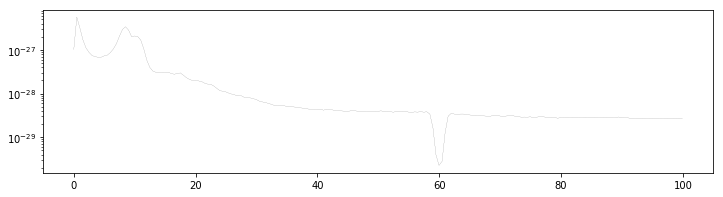

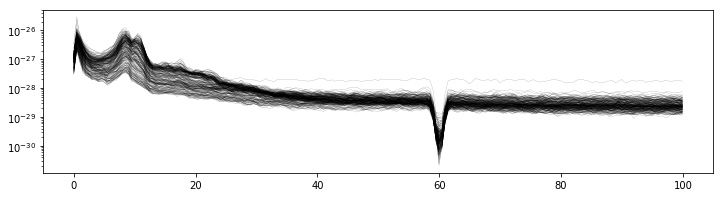

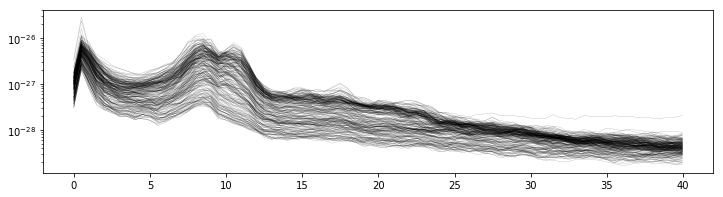

In [14]:
mat = loadmat('../100307_MEG_3-Restin_powavg.mat',struct_as_record=False,squeeze_me=True)['freq']
hcp_ps = pd.DataFrame(mat.powspctrm,columns=mat.freq,index=mat.label).T

fig,ax = plt.subplots(figsize=(12,3))
hcp_ps.loc[:100].mean(axis=1).plot(legend=False,c='k', linewidth=0.1,
                                   logy=True,ax=ax)

fig, ax = plt.subplots(figsize=(12,3))
hcp_ps.loc[:100].plot(legend=False,c='k', linewidth=0.1, logy=True,
                      ax=ax)


fig, ax = plt.subplots(figsize=(12,3))
hcp_ps.loc[:40].plot(legend=False,c='k', linewidth=0.1, logy=True,
                      ax=ax)

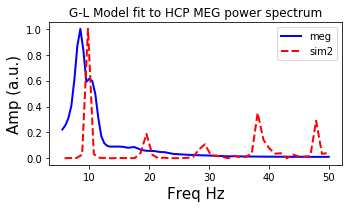

In [34]:
ssX_params = dict(I_o=0., # None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .001,D_i= .001,D_th = 0.001,D_rtn = 0.001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

sim_res = run_net_sim(**ssX_params)

#run_and_make_figs(ssX_params)

meg_dat = hcp_ps.loc[5:100].mean(axis=1)
#sim1_dat = simX1[2]['e'].loc[5:100].mean(axis=1)
#sim2_dat = simX2[2]['e'].loc[5:100].mean(axis=1)
sim1_dat = sim_res[2]['e'].loc[5:100].mean(axis=1)
sim2_dat = sim_res[2]['e'].loc[5:100].mean(axis=1)

meg_dat_log = np.log1p(meg_dat)
sim1_dat_log = np.log1p(sim1_dat)
sim2_dat_log = np.log1p(sim2_dat)

meg_dat_log_norm = meg_dat_log / meg_dat_log.max()
sim1_dat_log_norm = sim1_dat_log / sim1_dat_log.max()
sim2_dat_log_norm = sim2_dat_log / sim2_dat_log.max()

df = pd.concat({'meg': meg_dat_log_norm,
               'sim1': sim1_dat_log_norm,
               'sim2': sim2_dat_log_norm},axis=1)

thing = interp1d(df.meg.dropna().index,df.meg.dropna().values)
newsig = thing(df.index)
df['meg_interp'] = newsig

fig, ax = plt.subplots(figsize=(5,3))

df2 = df.copy()
df2['meg'] = df2['meg_interp']
#df2[[]'meg', 'sim'].dropna().plot(ax=ax,c='b',linewidth=2.0)#,logy=True)
df2['meg'].dropna().loc[:50].plot(ax=ax,c='b',linewidth=2.0)#,logy=True)
#df2['sim'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--',logy=True)
#df2['sim2'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--',logy=True)
df2['sim2'].dropna().loc[:50].plot(ax=ax,c='r',linewidth=2.0,linestyle='--')#,logy=True)

plt.legend()

ax.set_xlabel('Freq Hz', fontsize=15)
ax.set_ylabel('Amp (a.u.)',fontsize=15)
ax.set_title('G-L Model fit to HCP MEG power spectrum')

plt.tight_layout()

#plt.savefig('/home/jgriffiths/Downloads/gl_model_fit_to_HCP_MEG_power_spectrum_notrans.png', bbox_inches='tight',
#            dpi=600, transparent=False)

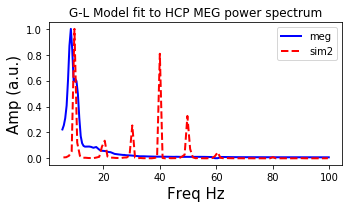

In [32]:
ssX_params = dict(I_o=0., # None,
             wee = 1.4,wei = 1.4,wie = -3., wii = -0.5, # wie = -2.,wii = -0.5,
            wertn = 0.6,weth = .6,wthi = 0.2,wthe = 1.65,wrtnth = -2.,wthrtn = 2.,
            D_e = .00001,D_i= .00001,D_th = 0.00001,D_rtn = 0.00001,
            T=T,#T = 1024*4,# 20,
            P=1,Q = 1,Dt = 0.001,
            dt = 0.1,gain = 20.,threshold = 0.,Pi = 3.14159,
            g = 5., # 10., # 1., #-0.9,
            a_e = 0.9, a_i = 0.9, 
            a_th=0.25, a_rtn=0.25, # a_e = 0.3,a_i = 0.5,a_th = 0.2,a_rtn = 0.2,
            i_e = -0.35,i_i = -0.3,i_th = 0.5,i_rtn = -0.8,
            tau1  = 20.,tau2 = 5.,T_transient=1000,
            stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'],
            weights=weights_1N*0.,
            delays=delays_1N,
            K=1, #stim_freq=35.,stim_amp=0.,stim_type='sinewave',stim_pops=['e'], #weights=_df_w.values,delays=_df_d.values,K=83,
            return_ts=True,compute_connectivity=False)#True) #False)

sim_res = run_net_sim(**ssX_params)

#run_and_make_figs(ssX_params)

meg_dat = hcp_ps.loc[5:100].mean(axis=1)
#sim1_dat = simX1[2]['e'].loc[5:100].mean(axis=1)
#sim2_dat = simX2[2]['e'].loc[5:100].mean(axis=1)
sim1_dat = sim_res[2]['e'].loc[5:100].mean(axis=1)
sim2_dat = sim_res[2]['e'].loc[5:100].mean(axis=1)

meg_dat_log = np.log1p(meg_dat)
sim1_dat_log = np.log1p(sim1_dat)
sim2_dat_log = np.log1p(sim2_dat)

meg_dat_log_norm = meg_dat_log / meg_dat_log.max()
sim1_dat_log_norm = sim1_dat_log / sim1_dat_log.max()
sim2_dat_log_norm = sim2_dat_log / sim2_dat_log.max()

df = pd.concat({'meg': meg_dat_log_norm,
               'sim1': sim1_dat_log_norm,
               'sim2': sim2_dat_log_norm},axis=1)

thing = interp1d(df.meg.dropna().index,df.meg.dropna().values)
newsig = thing(df.index)
df['meg_interp'] = newsig

fig, ax = plt.subplots(figsize=(5,3))

df2 = df.copy()
df2['meg'] = df2['meg_interp']
#df2[[]'meg', 'sim'].dropna().plot(ax=ax,c='b',linewidth=2.0)#,logy=True)
df2['meg'].dropna().plot(ax=ax,c='b',linewidth=2.0)#,logy=True)
#df2['sim'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--',logy=True)
#df2['sim2'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--',logy=True)
df2['sim2'].dropna().plot(ax=ax,c='r',linewidth=2.0,linestyle='--')#,logy=True)

plt.legend()

ax.set_xlabel('Freq Hz', fontsize=15)
ax.set_ylabel('Amp (a.u.)',fontsize=15)
ax.set_title('G-L Model fit to HCP MEG power spectrum')

plt.tight_layout()

#plt.savefig('/home/jgriffiths/Downloads/gl_model_fit_to_HCP_MEG_power_spectrum_notrans.png', bbox_inches='tight',
#            dpi=600, transparent=False)